# **Connect ke Google Drive**

In [170]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Python Libraries**

In [171]:
# Data Manipulation
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation and analysis

# Visualization Libraries
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Data visualization library based on matplotlib
import missingno  # Visualize missing data

# Date and Time Utilities
from datetime import datetime  # Module for manipulating dates and times

# Preprocessing Libraries
from sklearn.preprocessing import StandardScaler  # Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import LabelEncoder  # Encode target labels with value between 0 and n_classes-1

# Clustering Libraries
from sklearn.cluster import KMeans  # K-means clustering algorithm
from sklearn.cluster import AgglomerativeClustering  # Agglomerative clustering algorithm
from sklearn.mixture import GaussianMixture  # Gaussian Mixture Model for clustering

# Evaluation Metrics
from sklearn.metrics import silhouette_score  # Evaluate clustering using silhouette score
from sklearn.metrics import davies_bouldin_score  # Evaluate clustering using Davies Bouldin score

# Hierarchical Clustering Utilities
from scipy.cluster.hierarchy import dendrogram  # Function for creating dendrograms
from scipy.cluster.hierarchy import linkage  # Function for hierarchical clustering

# Dimensionality Reduction
from sklearn.decomposition import PCA  # Principal Component Analysis

# Statistical Analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Calculate variance inflation factors

# **Dataset Preparation**

In [172]:
lokasi_path = '/content/drive/MyDrive/Tim 26A Final Project Drive/[SC6] Tim 26A Dataset/lokasi.parquet'
produk_path = '/content/drive/MyDrive/Tim 26A Final Project Drive/[SC6] Tim 26A Dataset/produk.parquet'
prov_32_path = '/content/drive/MyDrive/Tim 26A Final Project Drive/[SC6] Tim 26A Dataset/prov_32.parquet'
prov_51_path = '/content/drive/MyDrive/Tim 26A Final Project Drive/[SC6] Tim 26A Dataset/prov_51.parquet'
prov_52_path = '/content/drive/MyDrive/Tim 26A Final Project Drive/[SC6] Tim 26A Dataset/prov_52.parquet'
prov_82_path = '/content/drive/MyDrive/Tim 26A Final Project Drive/[SC6] Tim 26A Dataset/prov_82.parquet'
user_path = '/content/drive/MyDrive/Tim 26A Final Project Drive/[SC6] Tim 26A Dataset/user.parquet'

# Membaca dataset
lokasi_df = pd.read_parquet(lokasi_path)
produk_df = pd.read_parquet(produk_path)
prov_32_df = pd.read_parquet(prov_32_path)
prov_51_df = pd.read_parquet(prov_51_path)
prov_52_df = pd.read_parquet(prov_52_path)
prov_82_df = pd.read_parquet(prov_82_path)
user_df = pd.read_parquet(user_path)

In [173]:
# Mengganti spasi dengan garis bawah untuk semua nama kolom
lokasi_df.columns = [col.replace(' ', '_') for col in lokasi_df.columns]
produk_df.columns = [col.replace(' ', '_') for col in produk_df.columns]
prov_32_df.columns = [col.replace(' ', '_') for col in prov_32_df.columns]
prov_51_df.columns = [col.replace(' ', '_') for col in prov_51_df.columns]
prov_52_df.columns = [col.replace(' ', '_') for col in prov_52_df.columns]
prov_82_df.columns = [col.replace(' ', '_') for col in prov_82_df.columns]
user_df.columns = [col.replace(' ', '_') for col in user_df.columns]

# **Dataset Lokasi**

## **Filter Dataframe Lokasi**

In [174]:
# Kode provinsi yang ingin dipertahankan
kode_provinsi = [32, 51, 52, 82]

# Filter baris yang memiliki kode provinsi yang diinginkan
lokasi_df = lokasi_df[lokasi_df['kode_provinsi'].isin(kode_provinsi)]

lokasi_df

,nama_provinsi,kode_provinsi,nama_kabupaten,kode_kabupaten,nama_kecamatan,kode_kecamatan
155,BALI,51,BADUNG,5103,ABIANSEMAL,510303
156,BALI,51,BADUNG,5103,KUTA,510301
157,BALI,51,BADUNG,5103,KUTA SELATAN,510305
158,BALI,51,BADUNG,5103,KUTA UTARA,510306
159,BALI,51,BADUNG,5103,MENGWI,510302
...,...,...,...,...,...,...
5464,JAWA BARAT,32,TASIKMALAYA,3206,SUKARAME,320626
5465,JAWA BARAT,32,TASIKMALAYA,3206,SUKARATU,320631
5466,JAWA BARAT,32,TASIKMALAYA,3206,SUKARESIK,320639
5467,JAWA BARAT,32,TASIKMALAYA,3206,TANJUNGJAYA,320616


## **Data Preprocessing**

### **Checking Data Type**

In [175]:
# Memeriksa tipe data dari setiap kolom
lokasi_df.dtypes

nama_provinsi     object
kode_provinsi      int64
nama_kabupaten    object
kode_kabupaten    object
nama_kecamatan    object
kode_kecamatan    object
dtype: object

### **Formatting Data**

In [176]:
# Ubah tipe data kolom 'kode_kabupaten' menjadi integer
lokasi_df['kode_kabupaten'] = lokasi_df['kode_kabupaten'].astype(int)

# Ubah tipe data kolom 'kode_kecamatan' menjadi integer
lokasi_df['kode_kecamatan'] = lokasi_df['kode_kecamatan'].astype(int)

<ipython-input-176-490086d58baf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lokasi_df['kode_kabupaten'] = lokasi_df['kode_kabupaten'].astype(int)
<ipython-input-176-490086d58baf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lokasi_df['kode_kecamatan'] = lokasi_df['kode_kecamatan'].astype(int)


### **Checking Dataframe Info**

In [177]:
print("Informasi DataFrame:")
print(lokasi_df.info())

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 155 to 5468
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nama_provinsi   919 non-null    object
 1   kode_provinsi   919 non-null    int64 
 2   nama_kabupaten  919 non-null    object
 3   kode_kabupaten  919 non-null    int64 
 4   nama_kecamatan  919 non-null    object
 5   kode_kecamatan  919 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 50.3+ KB
None


### **Checking Missing Values**

In [178]:
lokasi_df.isnull().sum()

nama_provinsi     0
kode_provinsi     0
nama_kabupaten    0
kode_kabupaten    0
nama_kecamatan    0
kode_kecamatan    0
dtype: int64

### **Checking Duplicate Data**

In [179]:
# Memeriksa duplikat dalam dataframe
duplicate_rows = lokasi_df.duplicated().sum()

# Menampilkan hasil
if duplicate_rows == 0:
    print("Tidak ada nilai duplikat dalam dataset.")
else:
    print("Nilai duplikat dalam dataset ditemukan sebanyak :", duplicate_rows)

Tidak ada nilai duplikat dalam dataset.


### **Checking Unique Value**

In [180]:
for column in lokasi_df.columns:
    print(column, ":", lokasi_df[column].unique())

nama_provinsi : ['BALI' 'MALUKU UTARA' 'NUSA TENGGARA BARAT' 'JAWA BARAT']
kode_provinsi : [51 82 52 32]
nama_kabupaten : ['BADUNG' 'BANGLI' 'BULELENG' 'GIANYAR' 'JEMBRANA' 'KARANGASEM'
 'KLUNGKUNG' 'KOTA DENPASAR' 'TABANAN' 'HALMAHERA BARAT'
 'HALMAHERA SELATAN' 'HALMAHERA TENGAH' 'HALMAHERA TIMUR'
 'HALMAHERA UTARA' 'KEPULAUAN SULA' 'KOTA TERNATE' 'KOTA TIDORE KEPULAUAN'
 'PULAU MOROTAI' 'PULAU TALIABU' 'BIMA' 'DOMPU' 'KOTA BIMA' 'KOTA MATARAM'
 'LOMBOK BARAT' 'LOMBOK TENGAH' 'LOMBOK TIMUR' 'LOMBOK UTARA' 'SUMBAWA'
 'SUMBAWA BARAT' 'BANDUNG' 'BANDUNG BARAT' 'BEKASI' 'BOGOR' 'CIAMIS'
 'CIANJUR' 'CIREBON' 'GARUT' 'INDRAMAYU' 'KARAWANG' 'KOTA BANDUNG'
 'KOTA BANJAR' 'KOTA BEKASI' 'KOTA BOGOR' 'KOTA CIMAHI' 'KOTA CIREBON'
 'KOTA DEPOK' 'KOTA SUKABUMI' 'KOTA TASIKMALAYA' 'KUNINGAN' 'MAJALENGKA'
 'PANGANDARAN' 'PURWAKARTA' 'SUBANG' 'SUKABUMI' 'SUMEDANG' 'TASIKMALAYA']
kode_kabupaten : [5103 5106 5108 5104 5101 5107 5105 5171 5102 8201 8204 8202 8206 8203
 8205 8271 8272 8207 8208 5206 5205

# **Dataset Produk**

In [181]:
produk_df

,id,product_name
0,1,Man Fashion
1,2,Woman Fashion
2,3,Food & Drink
3,4,Ride Hailing
4,5,Keperluan Rumah Tangga
5,6,Travel
6,7,Keperluan Anak
7,8,Elektronik
8,9,Other
9,10,"Transportasi (Kereta, Pesawat, Kapal)"


## **Data Preprocessing**

### **Checking Data Type**

In [182]:
# Memeriksa tipe data dari setiap kolom
produk_df.dtypes

id               int64
product_name    object
dtype: object

### **Checking Dataframe Info**

In [183]:
print("Informasi DataFrame:")
print(produk_df.info())

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            18 non-null     int64 
 1   product_name  18 non-null     object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes
None


### **Checking Missing Values**

In [184]:
produk_df.isnull().sum()

id              0
product_name    0
dtype: int64

### **Checking Duplicate Data**

In [185]:
# Memeriksa duplikat dalam dataframe
duplicate_rows = produk_df.duplicated().sum()

# Menampilkan hasil
if duplicate_rows == 0:
    print("Tidak ada nilai duplikat dalam dataset.")
else:
    print("Nilai duplikat dalam dataset ditemukan sebanyak :", duplicate_rows)

Tidak ada nilai duplikat dalam dataset.


### **Checking Unique Value**

In [186]:
for column in produk_df.columns:
    print(column, ":", produk_df[column].unique())

id : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
product_name : ['Man Fashion' 'Woman Fashion' 'Food & Drink' 'Ride Hailing'
 'Keperluan Rumah Tangga' 'Travel' 'Keperluan Anak' 'Elektronik' 'Other'
 'Transportasi (Kereta, Pesawat, Kapal)' 'Top Up Game' 'Otomotif' 'Pulsa'
 'Kesehatan' 'Investasi' 'Sewa Motor/Mobil' 'Hotel' 'Tagihan (WIFI, PLN)']


# **Dataset Provinsi Jawa Barat**

In [187]:
prov_32_df

,id,user_id,product_id,gross_amount,discounts,transaction_date
0,TRX539728,SC3204162004003,1,NaN,NaN,2024-06-08
1,TRX539729,SC3204162004003,1,NaN,NaN,2024-10-21
2,TRX539730,SC3204162004003,2,55400.0,NaN,2024-08-11
3,TRX539731,SC3204162004003,2,1600.0,NaN,2024-01-19
4,TRX539732,SC3204162004003,2,4100.0,4100.0,2024-08-24
...,...,...,...,...,...,...
1919160,TRX2458888,SC3206132001010,8,17700.0,NaN,2024-12-13
1919161,TRX2458889,SC3206132001010,8,2300.0,NaN,2024-03-24
1919162,TRX2458890,SC3206132001010,17,11000.0,NaN,2024-05-25
1919163,TRX2458891,SC3206132001010,17,95700.0,NaN,2024-05-04


## **Data Preprocessing**

### **Checking Data Type**

In [188]:
prov_32_df.dtypes

id                   object
user_id              object
product_id            int64
gross_amount        float64
discounts           float64
transaction_date     object
dtype: object

### **Formatting Data**

In [189]:
# Ubah tipe data kolom 'transaction_date' menjadi tanggal
prov_32_df['transaction_date'] = pd.to_datetime(prov_32_df['transaction_date'])

### **Checking and Handling Missing Values**

In [190]:
prov_32_df.isnull().sum()

id                        0
user_id                   0
product_id                0
gross_amount          11906
discounts           1267586
transaction_date          0
dtype: int64

In [191]:
# Menghapus baris yang memiliki missing value dalam kolom 'gross_amount'
prov_32_df.dropna(subset=['gross_amount'], inplace=True)

# Lakukan imputasi nilai 0 untuk missing value dalam kolom 'discounts'
prov_32_df['discounts'].fillna(0, inplace=True)

Untuk menangani missing value pada fitur `gross_amount` dan `discounts`, kami akan menerapkan pendekatan berikut:

1.   `gross_amount`: Baris data yang memiliki missing value pada fitur ini akan dihapus. Langkah ini dilakukan karena jumlah baris dengan missing value pada `gross_amount` cenderung sedikit, sehingga penghapusan baris ini tidak akan menyebabkan bias yang signifikan dalam analisis data.
2.   `discounts`: Missing value pada fitur ini akan diisi dengan nilai 0. Hal ini diasumsikan bahwa transaksi yang memiliki missing value pada `discounts` memang tidak memiliki diskon.






### **Checking Dataframe Info**

In [192]:
print("Informasi DataFrame:")
print(prov_32_df.info())

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 1907259 entries, 2 to 1919164
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                object        
 1   user_id           object        
 2   product_id        int64         
 3   gross_amount      float64       
 4   discounts         float64       
 5   transaction_date  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 101.9+ MB
None


### **Checking and Handling Noisy Data**

In [193]:
# Memilih baris dengan nilai 'gross_amount' dan 'discounts' kurang dari 0
negative_values_df = prov_32_df.loc[(prov_32_df['gross_amount'] < 0) | (prov_32_df['discounts'] < 0)]

# Menghitung jumlah baris dengan nilai 'gross_amount' dan 'discounts' kurang dari 0
count_negative_values = len(negative_values_df)

print("Jumlah baris dengan nilai 'gross_amount' atau 'discounts' lebih kecil dari 0:", count_negative_values)

Jumlah baris dengan nilai 'gross_amount' atau 'discounts' lebih kecil dari 0: 134


In [194]:
# Menghapus baris dengan nilai 'gross_amount' dan 'discounts' kurang dari 0
prov_32_df = prov_32_df.loc[(prov_32_df['gross_amount'] >= 0) & (prov_32_df['discounts'] >= 0)]

Transaksi dengan nilai negatif untuk `gross_amount` dan `discounts` perlu dihapus karena untuk memastikan bahwa data yang digunakan untuk analisis adalah valid, akurat, dan dapat diandalkan sehingga tidak menyebabkan kesalahan dalam laporan keuangan

In [195]:
prov_32_df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
product_id,1907125.0,8.369469,1.0,3.0,8.0,14.0,18.0,5.459867
gross_amount,1907125.0,54504.655804,0.0,7300.0,23900.0,66400.0,3423100.0,83817.57339
discounts,1907125.0,11443.86519,0.0,0.0,0.0,10000.0,1560000.0,27821.71864
transaction_date,1907125,2024-07-01 03:36:35.756019968,2024-01-01 00:00:00,2024-04-01 00:00:00,2024-07-01 00:00:00,2024-10-01 00:00:00,2024-12-31 00:00:00,NaN


### **Checking Duplicate Data**

In [196]:
# Memeriksa duplikat dalam dataframe
duplicate_rows = prov_32_df.duplicated().sum()

# Menampilkan hasil
if duplicate_rows == 0:
    print("Tidak ada nilai duplikat dalam dataset.")
else:
    print("Nilai duplikat dalam dataset ditemukan sebanyak :", duplicate_rows)

Tidak ada nilai duplikat dalam dataset.


# **Dataset Provinsi Bali**

In [197]:
prov_51_df

,id,user_id,product_id,gross_amount,discounts,transaction_date
0,TRX569018,SC5103032008002,2,119200.0,NaN,2024-09-23
1,TRX569019,SC5103032008002,2,235700.0,NaN,2024-01-19
2,TRX569020,SC5103032008002,2,25100.0,25100.0,2024-07-20
3,TRX569021,SC5103032008002,3,1566000.0,NaN,2024-09-08
4,TRX569022,SC5103032008002,3,94000.0,94000.0,2024-03-31
...,...,...,...,...,...,...
80846,TRX649864,SC5102052010015,5,700.0,NaN,2024-04-11
80847,TRX649865,SC5102052010015,14,5200.0,NaN,2024-04-22
80848,TRX649866,SC5102052010015,14,100.0,NaN,2024-09-27
80849,TRX649867,SC5102052010015,14,3600.0,NaN,2024-05-19


## **Data Preprocessing**

### **Checking Data Type**

In [198]:
prov_51_df.dtypes

id                   object
user_id              object
product_id            int64
gross_amount        float64
discounts           float64
transaction_date     object
dtype: object

### **Formatting Data**

In [199]:
# Ubah tipe data kolom 'transaction_date' menjadi tanggal
prov_51_df['transaction_date'] = pd.to_datetime(prov_51_df['transaction_date'])

### **Checking and Handling Missing Values**

In [200]:
prov_51_df.isnull().sum()

id                      0
user_id                 0
product_id              0
gross_amount          633
discounts           58458
transaction_date        0
dtype: int64

In [201]:
# Menghapus baris yang memiliki missing value dalam kolom 'gross_amount'
prov_51_df.dropna(subset=['gross_amount'], inplace=True)

# Lakukan imputasi nilai 0 untuk missing value dalam kolom 'discounts'
prov_51_df['discounts'].fillna(0, inplace=True)

### **Checking Dataframe Info**

In [202]:
print("Informasi DataFrame:")
print(prov_51_df.info())

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 80218 entries, 0 to 80850
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                80218 non-null  object        
 1   user_id           80218 non-null  object        
 2   product_id        80218 non-null  int64         
 3   gross_amount      80218 non-null  float64       
 4   discounts         80218 non-null  float64       
 5   transaction_date  80218 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 4.3+ MB
None


### **Checking and Handling Noisy Data**

In [203]:
# Memilih baris dengan nilai 'gross_amount' dan 'discounts' kurang dari 0
negative_values_df = prov_51_df.loc[(prov_51_df['gross_amount'] < 0) | (prov_51_df['discounts'] < 0)]

# Menghitung jumlah baris dengan nilai 'gross_amount' dan 'discounts' kurang dari 0
count_negative_values = len(negative_values_df)

print("Jumlah baris dengan nilai 'gross_amount' atau 'discounts' lebih kecil dari 0:", count_negative_values)

Jumlah baris dengan nilai 'gross_amount' atau 'discounts' lebih kecil dari 0: 10


In [204]:
# Menghapus baris dengan nilai 'gross_amount' dan 'discounts' kurang dari 0
prov_51_df = prov_51_df.loc[(prov_51_df['gross_amount'] >= 0) & (prov_51_df['discounts'] >= 0)]

In [205]:
prov_51_df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
product_id,80208.0,7.19149,1.0,3.0,5.0,12.0,18.0,4.964441
gross_amount,80208.0,85006.484391,0.0,5100.0,16600.0,69700.0,2591400.0,182760.170705
discounts,80208.0,11418.43457,0.0,0.0,0.0,4200.0,714200.0,36454.252107
transaction_date,80208,2024-06-30 06:59:25.529622784,2024-01-01 00:00:00,2024-03-31 00:00:00,2024-06-29 00:00:00,2024-09-30 00:00:00,2024-12-31 00:00:00,NaN


### **Checking Duplicate Data**

In [206]:
# Memeriksa duplikat dalam dataframe
duplicate_rows = prov_51_df.duplicated().sum()

# Menampilkan hasil
if duplicate_rows == 0:
    print("Tidak ada nilai duplikat dalam dataset.")
else:
    print("Nilai duplikat dalam dataset ditemukan sebanyak :", duplicate_rows)

Tidak ada nilai duplikat dalam dataset.


# **Dataset Provinsi Nusa Tenggara Barat**

In [207]:
prov_52_df

,id,user_id,product_id,gross_amount,discounts,transaction_date
0,TRX625368,SC5206102006003,1,92100.0,NaN,2024-10-29
1,TRX625369,SC5206102006003,1,10800.0,NaN,2024-06-04
2,TRX625370,SC5206102006003,1,47000.0,14700.0,2024-04-29
3,TRX625371,SC5206102006003,1,30100.0,15300.0,2024-04-23
4,TRX625372,SC5206102006003,2,46600.0,NaN,2024-12-15
...,...,...,...,...,...,...
356689,TRX982057,SC5207021012018,12,213200.0,NaN,2024-10-18
356690,TRX982058,SC5207021012018,12,146800.0,20000.0,2024-05-13
356691,TRX982059,SC5207021012018,17,34500.0,NaN,2024-05-08
356692,TRX982060,SC5207021012018,17,24200.0,NaN,2024-12-09


## **Data Preprocessing**

### **Checking Data Type**

In [208]:
prov_52_df.dtypes

id                   object
user_id              object
product_id            int64
gross_amount        float64
discounts           float64
transaction_date     object
dtype: object

### **Formatting Data**

In [209]:
# Ubah tipe data kolom 'transaction_date' menjadi tanggal
prov_52_df['transaction_date'] = pd.to_datetime(prov_52_df['transaction_date'])

### **Checking and Handling Missing Values**

In [210]:
prov_52_df.isnull().sum()

id                       0
user_id                  0
product_id               0
gross_amount          1766
discounts           256788
transaction_date         0
dtype: int64

In [211]:
# Menghapus baris yang memiliki missing value dalam kolom 'gross_amount'
prov_52_df.dropna(subset=['gross_amount'], inplace=True)

# Lakukan imputasi nilai 0 untuk missing value dalam kolom 'discounts'
prov_52_df['discounts'].fillna(0, inplace=True)

### **Checking Dataframe Info**

In [212]:
print("Informasi DataFrame:")
print(prov_52_df.info())

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 354928 entries, 0 to 356693
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                354928 non-null  object        
 1   user_id           354928 non-null  object        
 2   product_id        354928 non-null  int64         
 3   gross_amount      354928 non-null  float64       
 4   discounts         354928 non-null  float64       
 5   transaction_date  354928 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 19.0+ MB
None


### **Checking and Handling Noisy Data**

In [213]:
# Memilih baris dengan nilai 'gross_amount' dan 'discounts' kurang dari 0
negative_values_df = prov_52_df.loc[(prov_52_df['gross_amount'] < 0) | (prov_52_df['discounts'] < 0)]

# Menghitung jumlah baris dengan nilai 'gross_amount' dan 'discounts' kurang dari 0
count_negative_values = len(negative_values_df)

print("Jumlah baris dengan nilai 'gross_amount' atau 'discounts' lebih kecil dari 0:", count_negative_values)

Jumlah baris dengan nilai 'gross_amount' atau 'discounts' lebih kecil dari 0: 16


In [214]:
# Menghapus baris dengan nilai 'gross_amount' dan 'discounts' kurang dari 0
prov_52_df = prov_52_df.loc[(prov_52_df['gross_amount'] >= 0) & (prov_52_df['discounts'] >= 0)]

In [215]:
prov_52_df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
product_id,354912.0,8.662175,1.0,4.0,8.0,14.0,18.0,5.256278
gross_amount,354912.0,46521.138761,0.0,6200.0,18000.0,51200.0,2007900.0,80781.836605
discounts,354912.0,5924.013277,0.0,0.0,0.0,3800.0,571900.0,16522.771036
transaction_date,354912,2024-06-30 19:23:53.378414848,2024-01-01 00:00:00,2024-03-31 00:00:00,2024-06-30 00:00:00,2024-09-30 00:00:00,2024-12-31 00:00:00,NaN


### **Checking Duplicate Data**

In [216]:
# Memeriksa duplikat dalam dataframe
duplicate_rows = prov_52_df.duplicated().sum()

# Menampilkan hasil
if duplicate_rows == 0:
    print("Tidak ada nilai duplikat dalam dataset.")
else:
    print("Nilai duplikat dalam dataset ditemukan sebanyak :", duplicate_rows)

Tidak ada nilai duplikat dalam dataset.


# **Dataset Provinsi Maluku Utara**

In [217]:
prov_82_df

,id,user_id,product_id,gross_amount,discounts,transaction_date
0,TRX821217,SC8201032020001,1,46600.0,NaN,2024-10-13
1,TRX821218,SC8201032020001,1,16400.0,NaN,2024-04-12
2,TRX821219,SC8201032020001,1,23900.0,3400.0,2024-10-14
3,TRX821220,SC8201032020001,1,33100.0,16600.0,2024-10-17
4,TRX821221,SC8201032020001,2,7800.0,NaN,2024-05-22
...,...,...,...,...,...,...
55861,TRX877078,SC8208042019001,14,16100.0,10000.0,2024-11-19
55862,TRX877079,SC8208042019001,17,500.0,NaN,2024-09-11
55863,TRX877080,SC8208042019001,17,900.0,NaN,2024-04-05
55864,TRX877081,SC8208042019001,17,4200.0,NaN,2024-08-23


## **Data Preprocessing**

### **Checking Data Type**

In [218]:
prov_82_df.dtypes

id                   object
user_id              object
product_id            int64
gross_amount        float64
discounts           float64
transaction_date     object
dtype: object

### **Formatting Data**

In [219]:
# Ubah tipe data kolom 'transaction_date' menjadi tanggal
prov_82_df['transaction_date'] = pd.to_datetime(prov_82_df['transaction_date'])

### **Checking and Handling Missing Values**

In [220]:
prov_82_df.isnull().sum()

id                      0
user_id                 0
product_id              0
gross_amount          259
discounts           43598
transaction_date        0
dtype: int64

In [221]:
# Menghapus baris yang memiliki missing value dalam kolom 'gross_amount'
prov_82_df.dropna(subset=['gross_amount'], inplace=True)

# Lakukan imputasi nilai 0 untuk missing value dalam kolom 'discounts'
prov_82_df['discounts'].fillna(0, inplace=True)

### **Checking Dataframe Info**

In [222]:
print("Informasi DataFrame:")
print(prov_82_df.info())

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 55607 entries, 0 to 55865
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                55607 non-null  object        
 1   user_id           55607 non-null  object        
 2   product_id        55607 non-null  int64         
 3   gross_amount      55607 non-null  float64       
 4   discounts         55607 non-null  float64       
 5   transaction_date  55607 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 3.0+ MB
None


### **Checking and Handling Noisy Data**

In [223]:
# Memilih baris dengan nilai 'gross_amount' dan 'discounts' kurang dari 0
negative_values_df = prov_82_df.loc[(prov_82_df['gross_amount'] < 0) | (prov_82_df['discounts'] < 0)]

# Menghitung jumlah baris dengan nilai 'gross_amount' dan 'discounts' kurang dari 0
count_negative_values = len(negative_values_df)

print("Jumlah baris dengan nilai 'gross_amount' atau 'discounts' lebih kecil dari 0:", count_negative_values)

Jumlah baris dengan nilai 'gross_amount' atau 'discounts' lebih kecil dari 0: 6


In [224]:
# Menghapus baris dengan nilai 'gross_amount' dan 'discounts' kurang dari 0
prov_82_df = prov_82_df.loc[(prov_82_df['gross_amount'] >= 0) & (prov_82_df['discounts'] >= 0)]

In [225]:
prov_82_df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
product_id,55601.0,8.393104,1.0,4.0,8.0,13.0,18.0,5.191067
gross_amount,55601.0,51364.543803,0.0,5200.0,15800.0,53900.0,2018800.0,94862.443769
discounts,55601.0,4012.638262,0.0,0.0,0.0,0.0,709200.0,14229.76044
transaction_date,55601,2024-07-01 06:47:46.610312960,2024-01-01 00:00:00,2024-04-01 00:00:00,2024-07-01 00:00:00,2024-09-30 00:00:00,2024-12-31 00:00:00,NaN


### **Checking Duplicate Data**

In [226]:
# Memeriksa duplikat dalam dataframe
duplicate_rows = prov_82_df.duplicated().sum()

# Menampilkan hasil
if duplicate_rows == 0:
    print("Tidak ada nilai duplikat dalam dataset.")
else:
    print("Nilai duplikat dalam dataset ditemukan sebanyak :", duplicate_rows)

Tidak ada nilai duplikat dalam dataset.


# **Dataset User**

## **Filter Dataframe User**

In [227]:
# Membuat kondisi untuk menyaring data berdasarkan karakter ketiga dan keempat 'id'
condition = user_df['id'].str[2:4].isin(['32', '51', '52', '82'])

# Menyaring DataFrame user_df berdasarkan kondisi
user_df = user_df[condition]

# Mengubah nilai pada kolom 'gender'
user_df['gender'] = user_df['gender'].replace({'perempuan': 'Perempuan', 'laki-laki': 'Laki-laki'})

user_df

,id,full_name,gender,money_spent,refund,wallet_balance,join_date,birth
9253,SC5103032008002,"ISTIQOMAH NI S.E., M.E.",Perempuan,2370000.0,210000.0,310000.0,2023-10-30,2004-12-06
9254,SC5103032008005,E GAH,Perempuan,2340000.0,220000.0,390000.0,2023-12-12,1987-12-17
9255,SC5103032008007,JUMARTIN SANTIKA,Perempuan,2380000.0,120000.0,260000.0,2023-11-01,1994-09-08
9256,SC5103032008016,SIAGIAN Drs.,Laki-laki,2540000.0,30000.0,170000.0,2023-10-24,1998-04-21
9257,SC5103032008017,Dr. ESTI RAHABAV S.Sos.,Perempuan,1940000.0,190000.0,470000.0,2023-10-17,2001-04-26
...,...,...,...,...,...,...,...,...
248394,SC3206132001006,DIAH,Perempuan,1920000.0,130000.0,740000.0,2023-12-07,2007-11-07
248395,SC3206132001007,ARIYANTI KENNY,Perempuan,2480000.0,90000.0,480000.0,2023-11-14,2002-04-19
248396,SC3206132001008,H.,Laki-laki,2460000.0,30000.0,460000.0,2023-11-09,1977-08-28
248397,SC3206132001009,ARMANDO,Laki-laki,2310000.0,60000.0,650000.0,2023-10-15,1974-09-13


## **Data Preprocessing**

### **Checking Data Type**

In [228]:
user_df.dtypes

id                 object
full_name          object
gender             object
money_spent       float64
refund            float64
wallet_balance    float64
join_date          object
birth              object
dtype: object

### **Formatting Data**

In [229]:
# Ubah kolom 'join_date' menjadi tipe data tanggal
user_df['join_date'] = pd.to_datetime(user_df['join_date'])

# Ubah kolom 'birth' menjadi tipe data tanggal
user_df['birth'] = pd.to_datetime(user_df['birth'])

### **Checking Missing Values**

In [230]:
user_df.isnull().sum()

id                0
full_name         0
gender            0
money_spent       0
refund            0
wallet_balance    0
join_date         0
birth             0
dtype: int64

### **Checking Dataframe Info**

In [231]:
print("Informasi DataFrame:")
print(user_df.info())

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 77926 entries, 9253 to 248398
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              77926 non-null  object        
 1   full_name       77926 non-null  object        
 2   gender          77926 non-null  object        
 3   money_spent     77926 non-null  float64       
 4   refund          77926 non-null  float64       
 5   wallet_balance  77926 non-null  float64       
 6   join_date       77926 non-null  datetime64[ns]
 7   birth           77926 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 7.4+ MB
None


### **Checking and Handling Noisy Data**

In [232]:
# Memilih baris dengan nilai 'refund' dan 'wallet_balance' kurang dari 0
negative_refund = user_df.loc[user_df['refund'] < 0]
negative_wallet_balance = user_df.loc[user_df['wallet_balance'] < 0]

# Menghitung jumlah baris dengan nilai 'refund' dan 'wallet_balance' kurang dari 0
count_negative_refund = len(negative_refund)
count_negative_wallet_balance = len(negative_wallet_balance)

# Menampilkan jumlah refund dan wallet balance yang nilainya negatif
print("Jumlah refund dengan nilai negatif:", count_negative_refund)
print("Jumlah wallet balance dengan nilai negatif:", count_negative_wallet_balance)

Jumlah refund dengan nilai negatif: 219
Jumlah wallet balance dengan nilai negatif: 897


In [233]:
# Menghapus baris yang memiliki nilai 'refund' dan 'wallet_balance' kurang dari 0
user_df = user_df.loc[(user_df['refund'] >= 0) & (user_df['wallet_balance'] >= 0)]

Menghapus nilai negatif pada kolom `wallet_balance` dan `refund` dilakukan untuk menjaga integritas data dan memastikan data yang akurat.

In [234]:
user_df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
money_spent,76885.0,1855091.370228,0.0,1680000.0,1910000.0,2120000.0,5000000.0,425351.458212
refund,76885.0,184549.652078,0.0,90000.0,160000.0,250000.0,23610000.0,197241.463803
wallet_balance,76885.0,626283.540352,0.0,450000.0,600000.0,770000.0,23250000.0,370823.401422
join_date,76885,2023-11-21 06:25:04.428692480,2023-10-01 00:00:00,2023-10-25 00:00:00,2023-11-18 00:00:00,2023-12-11 00:00:00,2024-12-28 00:00:00,NaN
birth,76885,1989-04-25 12:55:06.652793088,1959-01-01 00:00:00,1982-01-18 00:00:00,1989-07-12 00:00:00,1997-02-05 00:00:00,2007-12-28 00:00:00,NaN


### **Checking Duplicate Data**

In [235]:
# Memeriksa duplikat dalam dataframe
duplicate_rows = user_df.duplicated().sum()

# Menampilkan hasil
if duplicate_rows == 0:
    print("Tidak ada nilai duplikat dalam dataset.")
else:
    print("Nilai duplikat dalam dataset ditemukan sebanyak :", duplicate_rows)

Tidak ada nilai duplikat dalam dataset.


## **Feature Engineering**

### **Age**

In [236]:
# Hitung usia untuk setiap pengguna
current_year = datetime.now().year
user_df['age'] = current_year - user_df['birth'].dt.year

# Tampilkan DataFrame setelah penambahan fitur usia
user_df

<ipython-input-236-467f3e153ee5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['age'] = current_year - user_df['birth'].dt.year


,id,full_name,gender,money_spent,refund,wallet_balance,join_date,birth,age
9253,SC5103032008002,"ISTIQOMAH NI S.E., M.E.",Perempuan,2370000.0,210000.0,310000.0,2023-10-30,2004-12-06,20
9254,SC5103032008005,E GAH,Perempuan,2340000.0,220000.0,390000.0,2023-12-12,1987-12-17,37
9255,SC5103032008007,JUMARTIN SANTIKA,Perempuan,2380000.0,120000.0,260000.0,2023-11-01,1994-09-08,30
9256,SC5103032008016,SIAGIAN Drs.,Laki-laki,2540000.0,30000.0,170000.0,2023-10-24,1998-04-21,26
9257,SC5103032008017,Dr. ESTI RAHABAV S.Sos.,Perempuan,1940000.0,190000.0,470000.0,2023-10-17,2001-04-26,23
...,...,...,...,...,...,...,...,...,...
248394,SC3206132001006,DIAH,Perempuan,1920000.0,130000.0,740000.0,2023-12-07,2007-11-07,17
248395,SC3206132001007,ARIYANTI KENNY,Perempuan,2480000.0,90000.0,480000.0,2023-11-14,2002-04-19,22
248396,SC3206132001008,H.,Laki-laki,2460000.0,30000.0,460000.0,2023-11-09,1977-08-28,47
248397,SC3206132001009,ARMANDO,Laki-laki,2310000.0,60000.0,650000.0,2023-10-15,1974-09-13,50


### **Age Status**

In [237]:
# Mendefinisikan fungsi untuk menentukan status berdasarkan quantile
def determine_status(column):
    return pd.qcut(column, q=4, labels=['Young', 'Adult', 'Middle-Aged', 'Senior'])

# Membuat kolom baru untuk status berdasarkan quantile
user_df['age_status'] = determine_status(user_df['age'])

user_df[['age', 'age_status']]

<ipython-input-237-b2c463fb46b5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['age_status'] = determine_status(user_df['age'])


,age,age_status
9253,20,Young
9254,37,Middle-Aged
9255,30,Adult
9256,26,Young
9257,23,Young
...,...,...
248394,17,Young
248395,22,Young
248396,47,Senior
248397,50,Senior


### **Money Spent Status**

In [238]:
# Mendefinisikan fungsi untuk menentukan status berdasarkan quantile
def determine_status(column):
    return pd.qcut(column, q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Membuat kolom baru untuk status berdasarkan quantile
user_df['money_spent_status'] = determine_status(user_df['money_spent'])

user_df[['money_spent', 'money_spent_status']]

<ipython-input-238-63713dd6686b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['money_spent_status'] = determine_status(user_df['money_spent'])


,money_spent,money_spent_status
9253,2370000.0,Very High
9254,2340000.0,Very High
9255,2380000.0,Very High
9256,2540000.0,Very High
9257,1940000.0,High
...,...,...
248394,1920000.0,High
248395,2480000.0,Very High
248396,2460000.0,Very High
248397,2310000.0,Very High


### **Refund Status**

In [239]:
# Mendefinisikan fungsi untuk menentukan status berdasarkan quantile
def determine_status(column):
    return pd.qcut(column, q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Membuat kolom baru untuk status berdasarkan quantile
user_df['refund_status'] = determine_status(user_df['refund'])

user_df[['refund', 'refund_status']]

<ipython-input-239-d7310233e7c7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['refund_status'] = determine_status(user_df['refund'])


,refund,refund_status
9253,210000.0,High
9254,220000.0,High
9255,120000.0,Medium
9256,30000.0,Low
9257,190000.0,High
...,...,...
248394,130000.0,Medium
248395,90000.0,Low
248396,30000.0,Low
248397,60000.0,Low


### **Wallet Balance Status**

In [240]:
# Mendefinisikan fungsi untuk menentukan status berdasarkan quantile
def determine_status(column):
    return pd.qcut(column, q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Membuat kolom baru untuk status berdasarkan quantile
user_df['wallet_balance_status'] = determine_status(user_df['wallet_balance'])

user_df[['wallet_balance', 'wallet_balance_status']]

<ipython-input-240-4169913d9224>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['wallet_balance_status'] = determine_status(user_df['wallet_balance'])


,wallet_balance,wallet_balance_status
9253,310000.0,Low
9254,390000.0,Low
9255,260000.0,Low
9256,170000.0,Low
9257,470000.0,Medium
...,...,...
248394,740000.0,High
248395,480000.0,Medium
248396,460000.0,Medium
248397,650000.0,High


# **Dataframe Merging**

In [241]:
# Gabungkan DataFrame secara baris
df = pd.concat([prov_32_df, prov_51_df, prov_52_df, prov_82_df])

df

,id,user_id,product_id,gross_amount,discounts,transaction_date
2,TRX539730,SC3204162004003,2,55400.0,0.0,2024-08-11
3,TRX539731,SC3204162004003,2,1600.0,0.0,2024-01-19
4,TRX539732,SC3204162004003,2,4100.0,4100.0,2024-08-24
5,TRX539733,SC3204162004003,2,8900.0,5900.0,2024-03-12
6,TRX539734,SC3204162004003,3,2300.0,0.0,2024-04-21
...,...,...,...,...,...,...
55861,TRX877078,SC8208042019001,14,16100.0,10000.0,2024-11-19
55862,TRX877079,SC8208042019001,17,500.0,0.0,2024-09-11
55863,TRX877080,SC8208042019001,17,900.0,0.0,2024-04-05
55864,TRX877081,SC8208042019001,17,4200.0,0.0,2024-08-23


In [242]:
# Gabungkan df dengan produk_df berdasarkan 'product_id' dan 'id' menggunakan left join
df = pd.merge(df, produk_df[['id', 'product_name']], left_on='product_id', right_on='id', how='left', suffixes=('_transaksi', '_produk'))

# Hapus kolom 'id' yang tidak diperlukan setelah penggabungan
df.drop(columns=['id_produk'], inplace=True)

# Pindahkan posisi kolom 'product_name' ke sebelah kanan 'product_id'
product_name_col = df.pop('product_name')  # Ambil kolom 'product_name'
df.insert(df.columns.get_loc('product_id') + 1, 'product_name', product_name_col)  # Masukkan kolom 'product_name' ke posisi yang diinginkan

df

,id_transaksi,user_id,product_id,product_name,gross_amount,discounts,transaction_date
0,TRX539730,SC3204162004003,2,Woman Fashion,55400.0,0.0,2024-08-11
1,TRX539731,SC3204162004003,2,Woman Fashion,1600.0,0.0,2024-01-19
2,TRX539732,SC3204162004003,2,Woman Fashion,4100.0,4100.0,2024-08-24
3,TRX539733,SC3204162004003,2,Woman Fashion,8900.0,5900.0,2024-03-12
4,TRX539734,SC3204162004003,3,Food & Drink,2300.0,0.0,2024-04-21
...,...,...,...,...,...,...,...
2397841,TRX877078,SC8208042019001,14,Kesehatan,16100.0,10000.0,2024-11-19
2397842,TRX877079,SC8208042019001,17,Hotel,500.0,0.0,2024-09-11
2397843,TRX877080,SC8208042019001,17,Hotel,900.0,0.0,2024-04-05
2397844,TRX877081,SC8208042019001,17,Hotel,4200.0,0.0,2024-08-23


In [243]:
# Ekstrak karakter ketiga sampai kedelapan dari user_id menjadi kode_kecamatan
user_df['kode_kecamatan'] = user_df['id'].str[2:8].astype(int)

# Lakukan join antara user_df dan lokasi_df berdasarkan kode_provinsi
user_df = pd.merge(user_df, lokasi_df, on='kode_kecamatan', how='left')

# Menghapus kolom 'nama_kabupaten', 'kode_kabupaten', dan 'nama_kecamatan'
user_df = user_df.drop(columns=['nama_kabupaten', 'kode_kabupaten', 'nama_kecamatan', 'kode_kecamatan'])

user_df

<ipython-input-243-acd4f2d32b40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['kode_kecamatan'] = user_df['id'].str[2:8].astype(int)


,id,full_name,gender,money_spent,refund,wallet_balance,join_date,birth,age,age_status,money_spent_status,refund_status,wallet_balance_status,nama_provinsi,kode_provinsi
0,SC5103032008002,"ISTIQOMAH NI S.E., M.E.",Perempuan,2370000.0,210000.0,310000.0,2023-10-30,2004-12-06,20,Young,Very High,High,Low,BALI,51
1,SC5103032008005,E GAH,Perempuan,2340000.0,220000.0,390000.0,2023-12-12,1987-12-17,37,Middle-Aged,Very High,High,Low,BALI,51
2,SC5103032008007,JUMARTIN SANTIKA,Perempuan,2380000.0,120000.0,260000.0,2023-11-01,1994-09-08,30,Adult,Very High,Medium,Low,BALI,51
3,SC5103032008016,SIAGIAN Drs.,Laki-laki,2540000.0,30000.0,170000.0,2023-10-24,1998-04-21,26,Young,Very High,Low,Low,BALI,51
4,SC5103032008017,Dr. ESTI RAHABAV S.Sos.,Perempuan,1940000.0,190000.0,470000.0,2023-10-17,2001-04-26,23,Young,High,High,Medium,BALI,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76880,SC3206132001006,DIAH,Perempuan,1920000.0,130000.0,740000.0,2023-12-07,2007-11-07,17,Young,High,Medium,High,JAWA BARAT,32
76881,SC3206132001007,ARIYANTI KENNY,Perempuan,2480000.0,90000.0,480000.0,2023-11-14,2002-04-19,22,Young,Very High,Low,Medium,JAWA BARAT,32
76882,SC3206132001008,H.,Laki-laki,2460000.0,30000.0,460000.0,2023-11-09,1977-08-28,47,Senior,Very High,Low,Medium,JAWA BARAT,32
76883,SC3206132001009,ARMANDO,Laki-laki,2310000.0,60000.0,650000.0,2023-10-15,1974-09-13,50,Senior,Very High,Low,High,JAWA BARAT,32


In [244]:
df_2 = pd.merge(df, user_df, left_on='user_id', right_on='id', how='outer')

In [245]:
# Lakukan join antara df dan user_df
df = pd.merge(df, user_df, left_on='user_id', right_on='id', how='inner')

# Hapus kolom 'id' yang tidak diperlukan setelah penggabungan
df.drop(columns=['id'], inplace=True)

# Tampilkan DataFrame hasil join
df

,id_transaksi,user_id,product_id,product_name,gross_amount,discounts,transaction_date,full_name,gender,money_spent,...,wallet_balance,join_date,birth,age,age_status,money_spent_status,refund_status,wallet_balance_status,nama_provinsi,kode_provinsi
0,TRX539730,SC3204162004003,2,Woman Fashion,55400.0,0.0,2024-08-11,Febrianti MITA,Perempuan,1220000.0,...,520000.0,2023-12-06,1984-02-20,40,Middle-Aged,Low,Medium,Medium,JAWA BARAT,32
1,TRX539731,SC3204162004003,2,Woman Fashion,1600.0,0.0,2024-01-19,Febrianti MITA,Perempuan,1220000.0,...,520000.0,2023-12-06,1984-02-20,40,Middle-Aged,Low,Medium,Medium,JAWA BARAT,32
2,TRX539732,SC3204162004003,2,Woman Fashion,4100.0,4100.0,2024-08-24,Febrianti MITA,Perempuan,1220000.0,...,520000.0,2023-12-06,1984-02-20,40,Middle-Aged,Low,Medium,Medium,JAWA BARAT,32
3,TRX539733,SC3204162004003,2,Woman Fashion,8900.0,5900.0,2024-03-12,Febrianti MITA,Perempuan,1220000.0,...,520000.0,2023-12-06,1984-02-20,40,Middle-Aged,Low,Medium,Medium,JAWA BARAT,32
4,TRX539734,SC3204162004003,3,Food & Drink,2300.0,0.0,2024-04-21,Febrianti MITA,Perempuan,1220000.0,...,520000.0,2023-12-06,1984-02-20,40,Middle-Aged,Low,Medium,Medium,JAWA BARAT,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371870,TRX877078,SC8208042019001,14,Kesehatan,16100.0,10000.0,2024-11-19,WAHYU HATTA,Laki-laki,1860000.0,...,340000.0,2023-10-17,2003-06-02,21,Young,Medium,Low,Low,MALUKU UTARA,82
2371871,TRX877079,SC8208042019001,17,Hotel,500.0,0.0,2024-09-11,WAHYU HATTA,Laki-laki,1860000.0,...,340000.0,2023-10-17,2003-06-02,21,Young,Medium,Low,Low,MALUKU UTARA,82
2371872,TRX877080,SC8208042019001,17,Hotel,900.0,0.0,2024-04-05,WAHYU HATTA,Laki-laki,1860000.0,...,340000.0,2023-10-17,2003-06-02,21,Young,Medium,Low,Low,MALUKU UTARA,82
2371873,TRX877081,SC8208042019001,17,Hotel,4200.0,0.0,2024-08-23,WAHYU HATTA,Laki-laki,1860000.0,...,340000.0,2023-10-17,2003-06-02,21,Young,Medium,Low,Low,MALUKU UTARA,82


In [246]:
df.isnull().sum()

id_transaksi             0
user_id                  0
product_id               0
product_name             0
gross_amount             0
discounts                0
transaction_date         0
full_name                0
gender                   0
money_spent              0
refund                   0
wallet_balance           0
join_date                0
birth                    0
age                      0
age_status               0
money_spent_status       0
refund_status            0
wallet_balance_status    0
nama_provinsi            0
kode_provinsi            0
dtype: int64

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371875 entries, 0 to 2371874
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id_transaksi           object        
 1   user_id                object        
 2   product_id             int64         
 3   product_name           object        
 4   gross_amount           float64       
 5   discounts              float64       
 6   transaction_date       datetime64[ns]
 7   full_name              object        
 8   gender                 object        
 9   money_spent            float64       
 10  refund                 float64       
 11  wallet_balance         float64       
 12  join_date              datetime64[ns]
 13  birth                  datetime64[ns]
 14  age                    int32         
 15  age_status             category      
 16  money_spent_status     category      
 17  refund_status          category      
 18  wallet_balance_status 

In [248]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
product_id,2371875.0,8.372606,1.0,3.0,8.0,14.0,18.0,5.413864
gross_amount,2371875.0,54246.556922,0.0,7000.0,22500.0,64000.0,3423100.0,88926.111549
discounts,2371875.0,10457.025391,0.0,0.0,0.0,8500.0,1560000.0,26643.633351
transaction_date,2371875,2024-07-01 01:41:15.201770496,2024-01-01 00:00:00,2024-03-31 00:00:00,2024-06-30 00:00:00,2024-09-30 00:00:00,2024-12-31 00:00:00,NaN
money_spent,2371875.0,1896137.844532,0.0,1710000.0,1930000.0,2120000.0,3000000.0,339444.525216
refund,2371875.0,190781.542029,0.0,100000.0,170000.0,250000.0,23610000.0,188385.842981
wallet_balance,2371875.0,635471.54888,0.0,460000.0,610000.0,770000.0,23250000.0,333323.372904
join_date,2371875,2023-11-17 08:53:24.180996096,2023-10-01 00:00:00,2023-10-24 00:00:00,2023-11-17 00:00:00,2023-12-10 00:00:00,2024-12-28 00:00:00,NaN
birth,2371875,1989-05-06 14:07:53.922782720,1959-01-01 00:00:00,1982-02-07 00:00:00,1989-07-23 00:00:00,1997-02-12 00:00:00,2007-12-28 00:00:00,NaN
age,2371875.0,35.147675,17.0,27.0,35.0,42.0,65.0,10.590102


# **Feature Engineering Lanjutan**

## **Transaction Date Detail**

In [249]:
# Ekstrak fitur day, day_name, date, month, month_name dan year dari transaction_date
df['day'] = df['transaction_date'].dt.dayofweek
df['day_name'] = df['transaction_date'].dt.day_name()
df['date'] = df['transaction_date'].dt.day
df['month'] = df['transaction_date'].dt.month
df['month_name'] = df['transaction_date'].dt.strftime('%B')
df['year'] = df['transaction_date'].dt.year

In [250]:
# Menampilkan DataFrame dengan fitur-fitur yang telah diekstrak dari tanggal transaksi
df[['day', 'day_name', 'date', 'month', 'month_name', 'year']]

,day,day_name,date,month,month_name,year
0,6,Sunday,11,8,August,2024
1,4,Friday,19,1,January,2024
2,5,Saturday,24,8,August,2024
3,1,Tuesday,12,3,March,2024
4,6,Sunday,21,4,April,2024
...,...,...,...,...,...,...
2371870,1,Tuesday,19,11,November,2024
2371871,2,Wednesday,11,9,September,2024
2371872,4,Friday,5,4,April,2024
2371873,4,Friday,23,8,August,2024


## **Discount Flag**

In [251]:
# Membuat kolom flag_discount: 0 jika tidak ada diskon, 1 jika ada diskon
df['flag_discount'] = df['discounts'].apply(lambda x: 1 if x > 0 else 0)

In [252]:
# Menambahkan kolom baru 'flag_discount_status' berdasarkan kolom 'discounts'
# Jika nilai dalam kolom 'discounts' lebih besar dari 0, maka akan diberi label 'Has Discount'
# Jika tidak, maka akan diberi label 'No Discount'
df['flag_discount_status'] = df['discounts'].apply(lambda x: 1 if x > 0 else 0)
df['flag_discount_status'] = df['flag_discount_status'].map({0: 'No Discount', 1: 'Has Discount'})

Fitur ini dibuat untuk menandai suatu transaksi memiliki diskon atau tidak di dalamnya.

## **Discount Burn Rate Percentage**

In [253]:
# Hitung burn rate percentage
df['burn_rate_percentage'] = (df['discounts'] / df['gross_amount']) * 100

Burn rate percentage persentase diskon dari jumlah bruto transaksi. Fitur ini memberikan insight tentang seberapa besar diskon yang diberikan relatif terhadap nilai transaksi total.

## **Burn Rate Z-Score**

In [254]:
# Hitung mean dan standar deviasi dari burn rate
mean_burn_rate = df['burn_rate_percentage'].mean()
std_dev_burn_rate = df['burn_rate_percentage'].std()

# Hitung z-score dari burn rate
df['z_score_burn_rate'] = (df['burn_rate_percentage'] - mean_burn_rate) / std_dev_burn_rate

 Z-Score dari burn rate percentage merupakan ukuran statistik yang menunjukkan seberapa jauh nilai burn rate dari rata-rata (mean) dalam satuan standar deviasi. Menghitung z-score penting karena memberikan perspektif tentang seberapa ekstrem atau tidak biasa nilai burn rate dibandingkan dengan keseluruhan distribusi burn rate.

Secara umum, z-score mendekati 0 menunjukkan bahwa nilai tersebut dekat dengan rata-rata dataset. Nilai z-score antara -2 dan +2 dianggap normal, sedangkan nilai di luar kisaran ini bisa dianggap sebagai outlier atau nilai yang tidak biasa. Dalam konteks bisnis, z-score yang rendah (negatif) untuk burn rate bisa dianggap baik karena menunjukkan diskon yang lebih kecil dari rata-rata, yang mungkin mengindikasikan pengelolaan keuangan yang lebih efisien.

# **Exploratory Data Analysis 1**

## **Overview**

### **Total Jumlah User yang Melakukan Transaksi**

In [255]:
# Menghitung jumlah user unik yang pernah melakukan transaksi
jumlah_user = df['user_id'].nunique()

print(f'Jumlah user yang pernah melakukan transaksi: {jumlah_user}')

Jumlah user yang pernah melakukan transaksi: 69152


### **Total Jumlah Transaksi**

In [256]:
# Menghitung jumlah transaksi yang terjadi
jumlah_transaksi = df['id_transaksi'].count()

print(f'Jumlah transaksi yang terjadi: {jumlah_transaksi}')

Jumlah transaksi yang terjadi: 2371875


### **Total Gross Amount**

In [257]:
# Menghitung total gross amount
total_gross_amount = df['gross_amount'].sum()

# Format total gross amount dalam Rupiah secara manual
total_gross_amount_rupiah = f"Rp{total_gross_amount:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')

print(f'Total gross amount: {total_gross_amount_rupiah}')

Total gross amount: Rp128.666.052.200,00


### **Total Discount**

In [258]:
# Menghitung total discounts
total_discounts = df['discounts'].sum()

# Format total discounts dalam Rupiah secara manual
total_discounts_rupiah = f"Rp{total_discounts:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')

print(f'Total discounts: {total_discounts_rupiah}')

Total discounts: Rp24.802.757.100,00


## **Key Performance Indicator (KPI)**

### **Average Order Value (AOV)**

In [259]:
# Menghitung total gross amount
total_gross_amount = df['gross_amount'].sum()

# Menghitung jumlah pesanan (setiap baris adalah satu pesanan)
number_of_orders = len(df)

# Menghitung Average Order Value (AOV)
average_order_value = total_gross_amount / number_of_orders

print(f'Average Order Value (AOV): Rp{average_order_value:,.2f}')

Average Order Value (AOV): Rp54,246.56


### **Order Frequency (OF)**

In [260]:
# Menghitung jumlah pesanan
number_of_orders = len(df)

# Menghitung jumlah pelanggan unik
number_of_customers = df['user_id'].nunique()

# Menghitung Order Frequency (OF)
order_frequency = number_of_orders / number_of_customers

print(f'Order Frequency (OF): {order_frequency:.2f}')

Order Frequency (OF): 34.30


### **Customer Lifetime Value (CLV)**

In [261]:
customer_lifespan = 1

# Menghitung CLV (Customer Lifetime Value)
clv = average_order_value * order_frequency * customer_lifespan

print(f'Customer Lifetime Value (CLV): Rp{clv:,.2f}')

Customer Lifetime Value (CLV): Rp1,860,626.62


## **KPI / Flag Discount**

### **Flag Discount Unique**

In [262]:
unique_flag_discount = df['flag_discount'].unique()
unique_flag_discount

array([0, 1])

In [263]:
unique_flag_discount_status = df['flag_discount_status'].unique()
unique_flag_discount_status

array(['No Discount', 'Has Discount'], dtype=object)

### **Budget / Flag Discount**

In [264]:
def format_rupiah(angka):
    return "Rp{:,.2f}".format(angka)

# Mengelompokkan berdasarkan 'flag_discount_status' dan 'discounts'
grouped_promo = df.groupby('flag_discount_status')['discounts'].sum().reset_index()

# Gunakan fungsi format_rupiah untuk mengubah format 'discounts' ke format mata uang Rupiah
grouped_promo['discounts'] = grouped_promo['discounts'].apply(format_rupiah)

# Mengubah nama kolom
grouped_promo.columns = ['Discount Status', 'Total Discounts']

grouped_promo

,Discount Status,Total Discounts
0,Has Discount,"Rp24,802,757,100.00"
1,No Discount,Rp0.00


In [265]:
# Filter data untuk flag_discount bernilai 1
filtered_df = df[df['flag_discount'] == 1]

# Mengelompokkan berdasarkan 'flag_discount_status' dan 'nama_provinsi' dan menghitung total diskon
grouped_promo = filtered_df.groupby(['flag_discount_status', 'nama_provinsi'])['discounts'].sum().reset_index()

# Gunakan fungsi format_rupiah untuk mengubah format 'discounts' ke format mata uang Rupiah
grouped_promo['discounts'] = grouped_promo['discounts'].apply(format_rupiah)

# Mengubah nama kolom
grouped_promo.columns = ['Discount Status', 'Province', 'Total Discounts']

# Menampilkan hasil
grouped_promo

,Discount Status,Province,Total Discounts
0,Has Discount,BALI,"Rp908,003,100.00"
1,Has Discount,JAWA BARAT,"Rp21,600,249,900.00"
2,Has Discount,MALUKU UTARA,"Rp215,815,800.00"
3,Has Discount,NUSA TENGGARA BARAT,"Rp2,078,688,300.00"


### **Jumlah User / Flag Discount**

In [266]:
# Mengelompokkan data berdasarkan 'flag_discount_status' dan menghitung jumlah pengguna unik untuk setiap 'flag_discount_status'
users_per_flag_discount_status = df.groupby('flag_discount_status')['user_id'].nunique().reset_index()

# Mengubah nama kolom
users_per_flag_discount_status.columns = ['Discount Status', 'Total Users']

# Menampilkan hasil pengelompokkan
users_per_flag_discount_status

,Discount Status,Total Users
0,Has Discount,68878
1,No Discount,69152


In [267]:
# Mengelompokkan berdasarkan 'flag_discount_status' dan 'nama_provinsi', lalu menghitung jumlah pengguna unik
users_per_flag_discount_status_provinsi = df.groupby(['flag_discount_status', 'nama_provinsi'])['user_id'].nunique().reset_index()

# Mengubah nama kolom
users_per_flag_discount_status_provinsi.columns = ['Discount Status', 'Province', 'Total Users']

# Menampilkan hasil
users_per_flag_discount_status_provinsi

,Discount Status,Province,Total Users
0,Has Discount,BALI,3423
1,Has Discount,JAWA BARAT,55094
2,Has Discount,MALUKU UTARA,1455
3,Has Discount,NUSA TENGGARA BARAT,8906
4,No Discount,BALI,3516
5,No Discount,JAWA BARAT,55147
6,No Discount,MALUKU UTARA,1475
7,No Discount,NUSA TENGGARA BARAT,9014


### **Jumlah Transaksi / Flag Discount**

In [268]:
# Mengelompokkan berdasarkan 'flag_discount_status', lalu menghitung jumlah transaksi
transactions_per_flag_discount_status = df.groupby('flag_discount_status').size().reset_index()

# Mengubah nama kolom
transactions_per_flag_discount_status.columns = ['Discount Status', 'Total Transactions']

transactions_per_flag_discount_status

,Discount Status,Total Transactions
0,Has Discount,777714
1,No Discount,1594161


In [269]:
# Mengelompokkan berdasarkan 'flag_discount_status' dan 'nama_provinsi', lalu menghitung jumlah transaksi
transactions_per_flag_discount_status_provinsi = df.groupby(['flag_discount_status', 'nama_provinsi']).size().reset_index()

# Mengubah nama kolom
transactions_per_flag_discount_status_provinsi.columns = ['Discount Status', 'Province', 'Total Transactions']

# Menampilkan hasil
transactions_per_flag_discount_status_provinsi

,Discount Status,Province,Total Transactions
0,Has Discount,BALI,22184
1,Has Discount,JAWA BARAT,644849
2,Has Discount,MALUKU UTARA,11874
3,Has Discount,NUSA TENGGARA BARAT,98807
4,No Discount,BALI,57237
5,No Discount,JAWA BARAT,1243064
6,No Discount,MALUKU UTARA,41981
7,No Discount,NUSA TENGGARA BARAT,251879


### **Total Gross Amount / Flag Discount**

In [270]:
# Menghitung total gross_amount per flag_discount_status
total_gross_amount_per_flag_discount_status = df.groupby('flag_discount_status')['gross_amount'].sum()

# Menerapkan format rupiah pada hasil
total_gross_amount_per_flag_discount_status_rupiah = total_gross_amount_per_flag_discount_status.apply(format_rupiah).reset_index()

# Mengubah nama kolom
total_gross_amount_per_flag_discount_status_rupiah.columns = ['Discount Status', 'Total Gross Amount']

total_gross_amount_per_flag_discount_status_rupiah

,Discount Status,Total Gross Amount
0,Has Discount,"Rp53,185,373,900.00"
1,No Discount,"Rp75,480,678,300.00"


In [271]:
# Mengelompokkan berdasarkan 'flag_discount_status' dan 'nama_provinsi', lalu menghitung total 'gross_amount'
total_gross_amount_per_flag_discount_status_provinsi = df.groupby(['flag_discount_status', 'nama_provinsi'])['gross_amount'].sum().reset_index()

# Menerapkan format rupiah pada kolom 'gross_amount'
total_gross_amount_per_flag_discount_status_provinsi['gross_amount'] = total_gross_amount_per_flag_discount_status_provinsi['gross_amount'].apply(format_rupiah)

# Mengubah nama kolom
total_gross_amount_per_flag_discount_status_provinsi.columns = ['Discount Status', 'Province', 'Total Gross Amount']

# Menampilkan hasil
total_gross_amount_per_flag_discount_status_provinsi

,Discount Status,Province,Total Gross Amount
0,Has Discount,BALI,"Rp2,715,949,000.00"
1,Has Discount,JAWA BARAT,"Rp43,544,318,300.00"
2,Has Discount,MALUKU UTARA,"Rp897,638,000.00"
3,Has Discount,NUSA TENGGARA BARAT,"Rp6,027,468,600.00"
4,No Discount,BALI,"Rp4,014,021,100.00"
5,No Discount,JAWA BARAT,"Rp59,366,113,400.00"
6,No Discount,MALUKU UTARA,"Rp1,837,892,000.00"
7,No Discount,NUSA TENGGARA BARAT,"Rp10,262,651,800.00"


### **Average Order Value / Flag Discount**

In [272]:
# Menghitung total gross_amount dan jumlah pesanan untuk setiap flag_discount_status
total_gross_amount_per_flag_discount_status = df.groupby('flag_discount_status')['gross_amount'].sum()
number_of_orders_per_flag_discount_status = df.groupby('flag_discount_status')['id_transaksi'].nunique()

# Menghitung Average Order Value (AOV) per flag_discount_status
aov_per_flag_discount_status = total_gross_amount_per_flag_discount_status / number_of_orders_per_flag_discount_status

# Menerapkan format rupiah pada hasil
aov_per_flag_discount_status_rupiah = aov_per_flag_discount_status.apply(format_rupiah).reset_index()

# Mengubah nama kolom
aov_per_flag_discount_status_rupiah.columns = ['Discount Status', 'Average Order Value']

aov_per_flag_discount_status_rupiah

,Discount Status,Average Order Value
0,Has Discount,"Rp73,002.98"
1,No Discount,"Rp55,755.58"


In [273]:
# Mengelompokkan berdasarkan 'flag_discount_status' dan 'nama_provinsi', lalu menghitung total 'gross_amount' dan jumlah pesanan
total_gross_amount_per_flag_discount_status_provinsi = df.groupby(['flag_discount_status', 'nama_provinsi'])['gross_amount'].sum()
number_of_orders_per_flag_discount_status_provinsi = df.groupby(['flag_discount_status', 'nama_provinsi'])['id_transaksi'].nunique()

# Menghitung Average Order Value (AOV) per kombinasi flag_discount_status dan nama_provinsi
aov_per_flag_discount_status_provinsi = total_gross_amount_per_flag_discount_status_provinsi / number_of_orders_per_flag_discount_status_provinsi

# Menerapkan format rupiah pada hasil
aov_per_flag_discount_status_provinsi_rupiah = aov_per_flag_discount_status_provinsi.apply(format_rupiah).reset_index()

# Mengubah nama kolom
aov_per_flag_discount_status_provinsi_rupiah.columns = ['Discount Status', 'Province', 'Average Order Value']

# Menampilkan hasil
aov_per_flag_discount_status_provinsi_rupiah

,Discount Status,Province,Average Order Value
0,Has Discount,BALI,"Rp122,428.28"
1,Has Discount,JAWA BARAT,"Rp67,526.38"
2,Has Discount,MALUKU UTARA,"Rp75,596.93"
3,Has Discount,NUSA TENGGARA BARAT,"Rp61,002.45"
4,No Discount,BALI,"Rp70,129.83"
5,No Discount,JAWA BARAT,"Rp47,757.89"
6,No Discount,MALUKU UTARA,"Rp43,779.14"
7,No Discount,NUSA TENGGARA BARAT,"Rp40,744.37"


### **Order Frequency / Flag Discount**

In [274]:
# Menghitung jumlah pesanan dan jumlah pelanggan unik untuk setiap flag_discount_status
total_orders_per_flag_discount_status = df.groupby('flag_discount_status')['id_transaksi'].nunique()
total_customers_per_flag_discount_status = df.groupby('flag_discount_status')['user_id'].nunique()

# Menghitung Order Frequency per flag_discount_status
order_frequency_per_flag_discount_status = total_orders_per_flag_discount_status / total_customers_per_flag_discount_status

# Menggabungkan hasil ke dalam DataFrame
order_frequency_per_flag_discount_status = order_frequency_per_flag_discount_status.reset_index()
order_frequency_per_flag_discount_status.columns = ['Discount Status', 'Order Frequency']

order_frequency_per_flag_discount_status

,Discount Status,Order Frequency
0,Has Discount,10.577209
1,No Discount,19.576845


In [275]:
# Menghitung jumlah pesanan dan jumlah pelanggan unik untuk setiap flag_discount_status dan nama_provinsi
total_orders_per_flag_provinsi = df.groupby(['flag_discount_status', 'nama_provinsi'])['id_transaksi'].nunique()
total_customers_per_flag_provinsi = df.groupby(['flag_discount_status', 'nama_provinsi'])['user_id'].nunique()

# Menghitung Order Frequency per flag_discount_status dan nama_provinsi
order_frequency_per_flag_provinsi = total_orders_per_flag_provinsi / total_customers_per_flag_provinsi

# Menggabungkan hasil ke dalam DataFrame
order_frequency_per_flag_provinsi = order_frequency_per_flag_provinsi.reset_index()
order_frequency_per_flag_provinsi.columns = ['Discount Status', 'Province', 'Order Frequency']

order_frequency_per_flag_provinsi

,Discount Status,Province,Order Frequency
0,Has Discount,BALI,6.480865
1,Has Discount,JAWA BARAT,11.704523
2,Has Discount,MALUKU UTARA,8.160825
3,Has Discount,NUSA TENGGARA BARAT,11.094431
4,No Discount,BALI,16.279010
5,No Discount,JAWA BARAT,22.540918
6,No Discount,MALUKU UTARA,28.461695
7,No Discount,NUSA TENGGARA BARAT,27.943089


### **Customer Lifetime Value / Flag Discount**

In [276]:
# Menghitung AOV per flag_discount_status
total_gross_amount_per_flag_discount_status = df.groupby('flag_discount_status')['gross_amount'].sum()
total_orders_per_flag_discount_status = df.groupby('flag_discount_status')['id_transaksi'].nunique()
average_order_value_per_flag_discount_status = total_gross_amount_per_flag_discount_status / total_orders_per_flag_discount_status

# Menghitung Order Frequency per flag_discount_status
total_customers_per_flag_discount_status = df.groupby('flag_discount_status')['user_id'].nunique()
order_frequency_per_flag_discount_status = total_orders_per_flag_discount_status / total_customers_per_flag_discount_status

# Asumsikan customer_lifespan adalah 1 tahun
customer_lifespan = 1

# Menghitung CLV per flag_discount_status
clv_per_flag_discount_status = average_order_value_per_flag_discount_status * order_frequency_per_flag_discount_status * customer_lifespan

# Mengubah format ke dalam rupiah
clv_per_flag_discount_status_rupiah = clv_per_flag_discount_status.apply(lambda x: f"Rp{x:,.2f}")

# Menggabungkan hasil ke dalam DataFrame
clv_per_flag_discount_status_rupiah = clv_per_flag_discount_status_rupiah.reset_index()
clv_per_flag_discount_status_rupiah.columns = ['Discount Status', 'Customer Lifetime Value']

clv_per_flag_discount_status_rupiah

,Discount Status,Customer Lifetime Value
0,Has Discount,"Rp772,167.80"
1,No Discount,"Rp1,091,518.37"


In [277]:
# Menghitung AOV per flag_discount_status
total_gross_amount_per_flag_discount_status = df.groupby(['flag_discount_status', 'nama_provinsi'])['gross_amount'].sum()
total_orders_per_flag_discount_status = df.groupby(['flag_discount_status', 'nama_provinsi'])['id_transaksi'].nunique()
average_order_value_per_flag_discount_status = total_gross_amount_per_flag_discount_status / total_orders_per_flag_discount_status

# Menghitung Order Frequency per flag_discount_status
total_customers_per_flag_discount_status = df.groupby(['flag_discount_status', 'nama_provinsi'])['user_id'].nunique()
order_frequency_per_flag_discount_status = total_orders_per_flag_discount_status / total_customers_per_flag_discount_status

# Asumsikan customer_lifespan adalah 1 tahun
customer_lifespan = 1

# Menghitung CLV per flag_discount_status
clv_per_flag_discount_status = average_order_value_per_flag_discount_status * order_frequency_per_flag_discount_status * customer_lifespan

# Mengubah format ke dalam rupiah
clv_per_flag_discount_status_rupiah = clv_per_flag_discount_status.apply(lambda x: f"Rp{x:,.2f}")

# Menggabungkan hasil ke dalam DataFrame
clv_per_flag_discount_status_rupiah = clv_per_flag_discount_status_rupiah.reset_index()
clv_per_flag_discount_status_rupiah.columns = ['Discount Status', 'Province' ,'Customer Lifetime Value']

clv_per_flag_discount_status_rupiah

,Discount Status,Province,Customer Lifetime Value
0,Has Discount,BALI,"Rp793,441.13"
1,Has Discount,JAWA BARAT,"Rp790,364.07"
2,Has Discount,MALUKU UTARA,"Rp616,933.33"
3,Has Discount,NUSA TENGGARA BARAT,"Rp676,787.40"
4,No Discount,BALI,"Rp1,141,644.23"
5,No Discount,JAWA BARAT,"Rp1,076,506.67"
6,No Discount,MALUKU UTARA,"Rp1,246,028.47"
7,No Discount,NUSA TENGGARA BARAT,"Rp1,138,523.61"


### **Rata-rata Burn Rate Percentage / Flag Discount**

In [278]:
# Hitung rata-rata BRP per flag_discount_status
average_brp_per_flag_discount_status = df.groupby('flag_discount_status')['burn_rate_percentage'].mean()

# Menggabungkan hasil ke dalam DataFrame
average_brp_per_flag_discount_status = average_brp_per_flag_discount_status.reset_index()
average_brp_per_flag_discount_status.columns = ['Discount Status', 'Average BRP']

# Menampilkan hasil
average_brp_per_flag_discount_status

,Discount Status,Average BRP
0,Has Discount,67.229247
1,No Discount,0.000000


In [279]:
# Menghitung rata-rata BRP per flag_discount_status dan nama_provinsi hanya untuk flag_discount = 1
average_brp_per_flag_provinsi = df[df['flag_discount'] == 1].groupby(['flag_discount_status', 'nama_provinsi'])['burn_rate_percentage'].mean()

# Menggabungkan hasil ke dalam DataFrame
average_brp_per_flag_provinsi = average_brp_per_flag_provinsi.reset_index()
average_brp_per_flag_provinsi.columns = ['Discount Status', 'Province', 'Average BRP']

# Menampilkan hasil
average_brp_per_flag_provinsi

,Discount Status,Province,Average BRP
0,Has Discount,BALI,61.676985
1,Has Discount,JAWA BARAT,68.760860
2,Has Discount,MALUKU UTARA,51.380805
3,Has Discount,NUSA TENGGARA BARAT,60.384561


### **Rata-rata Z-Score Burn Rate Percentage / Flag Discount**

In [280]:
# Hitung rata-rata Z-Score BRP per flag_discount_status
average_zscore_brp_per_flag_discount_status = df.groupby('flag_discount_status')['z_score_burn_rate'].mean()

# Menggabungkan hasil ke dalam DataFrame
average_zscore_brp_per_flag_discount_status = average_zscore_brp_per_flag_discount_status.reset_index()
average_zscore_brp_per_flag_discount_status.columns = ['Discount Status', 'Average Z-Score BRP']

# Menampilkan hasil
average_zscore_brp_per_flag_discount_status

,Discount Status,Average Z-Score BRP
0,Has Discount,1.228281
1,No Discount,-0.599219


In [281]:
# Hitung rata-rata Z-Score BRP per flag_discount_status dan nama_provinsi
average_zscore_brp_per_flag_provinsi = df[df['flag_discount'] == 1].groupby(['flag_discount_status', 'nama_provinsi'])['z_score_burn_rate'].mean()

# Menggabungkan hasil ke dalam DataFrame
average_zscore_brp_per_flag_provinsi = average_zscore_brp_per_flag_provinsi.reset_index()
average_zscore_brp_per_flag_provinsi.columns = ['Discount Status', 'Province', 'Average Z-Score BRP']

# Menampilkan hasil
average_zscore_brp_per_flag_provinsi

,Discount Status,Province,Average Z-Score BRP
0,Has Discount,BALI,1.077353
1,Has Discount,JAWA BARAT,1.269915
2,Has Discount,MALUKU UTARA,0.797471
3,Has Discount,NUSA TENGGARA BARAT,1.042221


# **Exploratory Data Analysis 2**

## **Bagaimana Sebaran Pengguna di Setiap Provinsinya?**

### **Provinsi Jawa Barat**

In [282]:
# Filter pengguna dari provinsi dengan kode 32
prov_32_users = user_df[user_df['kode_provinsi'] == 32]

# Hitung jumlah pengguna laki-laki, perempuan, dan keseluruhan
male_count = prov_32_users[prov_32_users['gender'] == 'Laki-laki'].shape[0]
female_count = prov_32_users[prov_32_users['gender'] == 'Perempuan'].shape[0]
total_count = prov_32_users.shape[0]

# Tampilkan hasil
print(f"Jumlah pengguna laki-laki di provinsi dengan kode 32: {male_count}")
print(f"Jumlah pengguna perempuan di provinsi dengan kode 32: {female_count}")
print(f"Jumlah pengguna keseluruhan di provinsi dengan kode 32: {total_count}")

Jumlah pengguna laki-laki di provinsi dengan kode 32: 17932
Jumlah pengguna perempuan di provinsi dengan kode 32: 43273
Jumlah pengguna keseluruhan di provinsi dengan kode 32: 61205


### **Provinsi Bali**

In [283]:
# Filter pengguna dari provinsi dengan kode 51
prov_51_users = user_df[user_df['kode_provinsi'] == 51]

# Hitung jumlah pengguna laki-laki, perempuan, dan keseluruhan
male_count = prov_51_users[prov_51_users['gender'] == 'Laki-laki'].shape[0]
female_count = prov_51_users[prov_51_users['gender'] == 'Perempuan'].shape[0]
total_count = prov_51_users.shape[0]

# Tampilkan hasil
print(f"Jumlah pengguna laki-laki di provinsi dengan kode 51: {male_count}")
print(f"Jumlah pengguna perempuan di provinsi dengan kode 51: {female_count}")
print(f"Jumlah pengguna keseluruhan di provinsi dengan kode 51: {total_count}")

Jumlah pengguna laki-laki di provinsi dengan kode 51: 1691
Jumlah pengguna perempuan di provinsi dengan kode 51: 2157
Jumlah pengguna keseluruhan di provinsi dengan kode 51: 3848


### **Provinsi Nusa Tenggara Barat**

In [284]:
# Filter pengguna dari provinsi dengan kode 52
prov_52_users = user_df[user_df['kode_provinsi'] == 52]

# Hitung jumlah pengguna laki-laki, perempuan, dan keseluruhan
male_count = prov_52_users[prov_52_users['gender'] == 'Laki-laki'].shape[0]
female_count = prov_52_users[prov_52_users['gender'] == 'Perempuan'].shape[0]
total_count = prov_52_users.shape[0]

# Tampilkan hasil
print(f"Jumlah pengguna laki-laki di provinsi dengan kode 52: {male_count}")
print(f"Jumlah pengguna perempuan di provinsi dengan kode 52: {female_count}")
print(f"Jumlah pengguna keseluruhan di provinsi dengan kode 52: {total_count}")

Jumlah pengguna laki-laki di provinsi dengan kode 52: 2084
Jumlah pengguna perempuan di provinsi dengan kode 52: 8165
Jumlah pengguna keseluruhan di provinsi dengan kode 52: 10249


### **Provinsi Maluku Utara**

In [285]:
# Filter pengguna dari provinsi dengan kode 82
prov_82_users = user_df[user_df['kode_provinsi'] == 82]

# Hitung jumlah pengguna laki-laki, perempuan, dan keseluruhan
male_count = prov_82_users[prov_82_users['gender'] == 'Laki-laki'].shape[0]
female_count = prov_82_users[prov_82_users['gender'] == 'Perempuan'].shape[0]
total_count = prov_82_users.shape[0]

# Tampilkan hasil
print(f"Jumlah pengguna laki-laki di provinsi dengan kode 82: {male_count}")
print(f"Jumlah pengguna perempuan di provinsi dengan kode 82: {female_count}")
print(f"Jumlah pengguna keseluruhan di provinsi dengan kode 82: {total_count}")

Jumlah pengguna laki-laki di provinsi dengan kode 82: 498
Jumlah pengguna perempuan di provinsi dengan kode 82: 1085
Jumlah pengguna keseluruhan di provinsi dengan kode 82: 1583


### **Keseluruhan Provinsi**

In [286]:
# Hitung jumlah pengguna laki-laki, perempuan, dan keseluruhan
male_count = user_df[user_df['gender'] == 'Laki-laki'].shape[0]
female_count = user_df[user_df['gender'] == 'Perempuan'].shape[0]
total_count = user_df.shape[0]

# Tampilkan hasil
print(f"Jumlah pengguna laki-laki : {male_count}")
print(f"Jumlah pengguna perempuan : {female_count}")
print(f"Jumlah pengguna keseluruhan : {total_count}")

Jumlah pengguna laki-laki : 22205
Jumlah pengguna perempuan : 54680
Jumlah pengguna keseluruhan : 76885


gender               Laki-laki  Perempuan  Total
nama_provinsi                                   
BALI                      1691       2157   3848
JAWA BARAT               17932      43273  61205
MALUKU UTARA               498       1085   1583
NUSA TENGGARA BARAT       2084       8165  10249


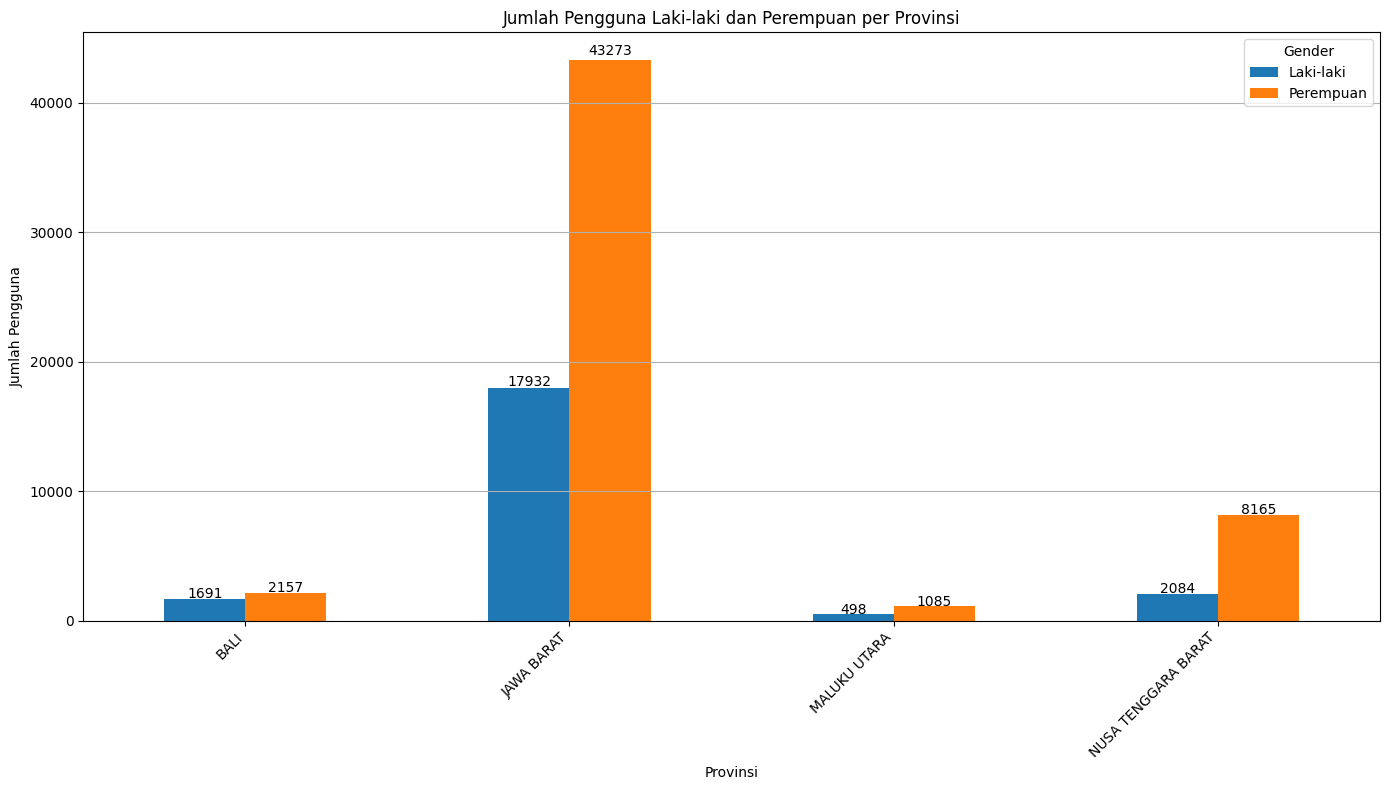

In [287]:
# Menghitung jumlah pengguna laki-laki, perempuan, dan keseluruhan per provinsi
gender_count_per_provinsi = user_df.groupby(['nama_provinsi', 'gender']).size().unstack(fill_value=0)
gender_count_per_provinsi['Total'] = gender_count_per_provinsi.sum(axis=1)

# Tampilkan hasil per provinsi
print(gender_count_per_provinsi)

# Visualisasi data dalam bentuk diagram batang yang saling bersebelahan
ax = gender_count_per_provinsi[['Laki-laki', 'Perempuan']].plot(kind='bar', figsize=(14, 8))
plt.title('Jumlah Pengguna Laki-laki dan Perempuan per Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.grid(axis='y')

# Menambahkan jumlah total di atas batang
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() * 1.01), ha='center')

plt.tight_layout()
plt.show()

## **Bagaimana Sebaran Usia Pengguna di Setiap Provinsinya?**

### **Provinsi Jawa Barat**

In [288]:
# Filter data untuk pengguna di provinsi dengan kode 32
user_age_dist = user_df[user_df['kode_provinsi'] == 32]

user_age_dist.age.describe()

count    61205.000000
mean        35.165754
std         10.599212
min         17.000000
25%         27.000000
50%         35.000000
75%         42.000000
max         65.000000
Name: age, dtype: float64

### **Provinsi Bali**

In [289]:
# Filter data untuk pengguna di provinsi dengan kode 51
user_age_dist = user_df[user_df['kode_provinsi'] == 51]

user_age_dist.age.describe()

count    3848.000000
mean       35.119543
std        10.425307
min        17.000000
25%        28.000000
50%        35.000000
75%        42.000000
max        65.000000
Name: age, dtype: float64

### **Provinsi Nusa Tenggara Barat**

In [290]:
# Filter data untuk pengguna di provinsi dengan kode 52
user_age_dist = user_df[user_df['kode_provinsi'] == 52]

user_age_dist.age.describe()

count    10249.000000
mean        35.208411
std         10.551937
min         17.000000
25%         27.000000
50%         35.000000
75%         42.000000
max         65.000000
Name: age, dtype: float64

### **Provinsi Maluku Utara**

In [291]:
# Filter data untuk pengguna di provinsi dengan kode 82
user_age_dist = user_df[user_df['kode_provinsi'] == 82]

user_age_dist.age.describe()

count    1583.000000
mean       35.593178
std        10.765223
min        17.000000
25%        28.000000
50%        35.000000
75%        43.000000
max        65.000000
Name: age, dtype: float64

### **Keseluruhan Provinsi**

In [292]:
user_df.age.describe()

count    76885.000000
mean        35.177928
std         10.587711
min         17.000000
25%         27.000000
50%         35.000000
75%         42.000000
max         65.000000
Name: age, dtype: float64

age_status           Young  Adult  Middle-Aged  Senior
nama_provinsi                                         
BALI                   956   1061          910     921
JAWA BARAT           15511  16293        14189   15212
MALUKU UTARA           393    399          375     416
NUSA TENGGARA BARAT   2578   2732         2403    2536


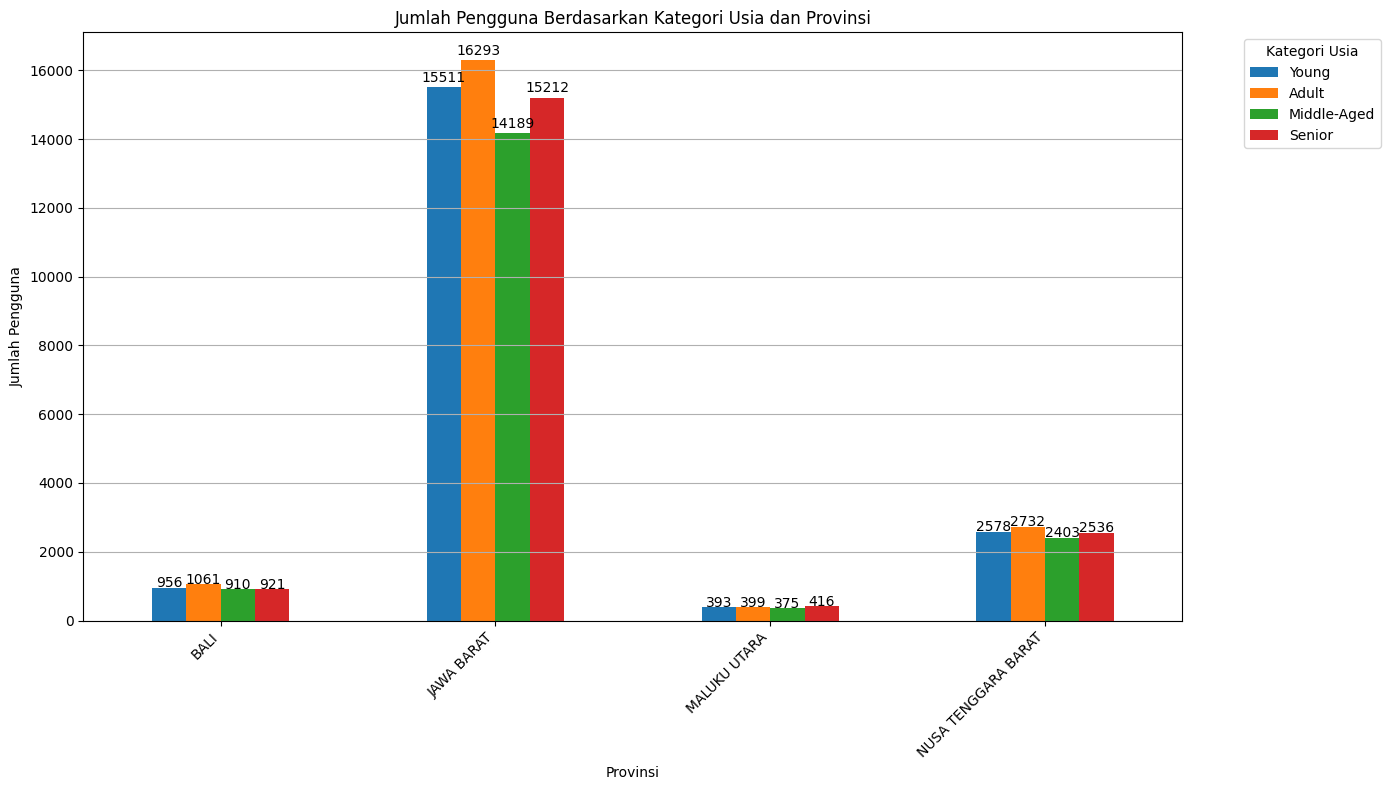

In [293]:
# Menghitung jumlah pengguna berdasarkan kategori usia dan provinsi
age_gender_provinsi = user_df.groupby(['nama_provinsi', 'age_status']).size().unstack(fill_value=0)

# Menampilkan hasil
print(age_gender_provinsi)

# Visualisasi data dalam bentuk diagram batang yang saling bersebelahan
fig, ax = plt.subplots(figsize=(14, 8))

# Menggunakan pivot_table untuk membuat data yang cocok untuk plotting
plot_data = user_df.pivot_table(index='nama_provinsi', columns=['age_status'], aggfunc='size', fill_value=0)

# Plotting
plot_data.plot(kind='bar', stacked=False, ax=ax)

# Menambahkan judul dan label
plt.title('Jumlah Pengguna Berdasarkan Kategori Usia dan Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Kategori Usia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

# Menambahkan jumlah total di atas batang
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() * 1.01), ha='center')

# Menampilkan plot
plt.tight_layout()
plt.show()

## **Bagaimana Minat Pengguna Terhadap Produk di Setiap Provinsinya?**

### **Provinsi Jawa Barat**

In [294]:
# Filter data untuk provinsi dengan kode 32
prov_32_trans = df[df['kode_provinsi'] == 32]

# Hitung jumlah pesanan produk berdasarkan 'product_name'
product_order_counts = prov_32_trans['product_name'].value_counts()

# Tampilkan hasil
product_order_counts

product_name
Ride Hailing                             163833
Woman Fashion                            163734
Man Fashion                              161033
Food & Drink                             160425
Elektronik                               158544
Otomotif                                 156700
Kesehatan                                150783
Keperluan Rumah Tangga                   149553
Hotel                                    132663
Investasi                                110110
Sewa Motor/Mobil                          71206
Travel                                    67856
Keperluan Anak                            60834
Transportasi (Kereta, Pesawat, Kapal)     46356
Tagihan (WIFI, PLN)                       43310
Pulsa                                     38188
Top Up Game                               35383
Other                                     17402
Name: count, dtype: int64

### **Provinsi Bali**

In [295]:
# Filter data untuk provinsi dengan kode 51
prov_51_trans = df[df['kode_provinsi'] == 51]

# Hitung jumlah pesanan produk berdasarkan 'product_name'
product_order_counts = prov_51_trans['product_name'].value_counts()

# Tampilkan hasil
product_order_counts

product_name
Food & Drink                             10476
Ride Hailing                              9857
Woman Fashion                             9842
Kesehatan                                 7965
Keperluan Rumah Tangga                    7903
Investasi                                 6405
Other                                     4753
Man Fashion                               4154
Keperluan Anak                            3509
Travel                                    2591
Transportasi (Kereta, Pesawat, Kapal)     2286
Sewa Motor/Mobil                          2275
Elektronik                                2182
Otomotif                                  1483
Top Up Game                               1483
Hotel                                     1056
Pulsa                                      743
Tagihan (WIFI, PLN)                        458
Name: count, dtype: int64

### **Provinsi Nusa Tenggara Barat**

In [296]:
# Filter data untuk provinsi dengan kode 52
prov_52_trans = df[df['kode_provinsi'] == 52]

# Hitung jumlah pesanan produk berdasarkan 'product_name'
product_order_counts = prov_52_trans['product_name'].value_counts()

# Tampilkan hasil
product_order_counts

product_name
Woman Fashion                            26698
Ride Hailing                             26106
Man Fashion                              25905
Elektronik                               25519
Otomotif                                 25258
Keperluan Rumah Tangga                   24932
Kesehatan                                24664
Food & Drink                             23887
Hotel                                    22122
Sewa Motor/Mobil                         21262
Keperluan Anak                           21171
Travel                                   15093
Transportasi (Kereta, Pesawat, Kapal)    14976
Pulsa                                    13846
Investasi                                13822
Top Up Game                              12808
Tagihan (WIFI, PLN)                       6407
Other                                     6210
Name: count, dtype: int64

### **Provinsi Maluku Utara**

In [297]:
# Filter data untuk provinsi dengan kode 82
prov_82_trans = df[df['kode_provinsi'] == 82]

# Hitung jumlah pesanan produk berdasarkan 'product_name'
product_order_counts = prov_82_trans['product_name'].value_counts()

# Tampilkan hasil
product_order_counts

product_name
Ride Hailing                             4314
Food & Drink                             4307
Woman Fashion                            4194
Man Fashion                              4051
Keperluan Rumah Tangga                   3972
Otomotif                                 3886
Kesehatan                                3810
Elektronik                               3724
Sewa Motor/Mobil                         2826
Transportasi (Kereta, Pesawat, Kapal)    2796
Keperluan Anak                           2400
Hotel                                    2362
Top Up Game                              2190
Travel                                   2153
Investasi                                1993
Pulsa                                    1940
Other                                    1549
Tagihan (WIFI, PLN)                      1388
Name: count, dtype: int64

### **Keseluruhan Provinsi**

In [298]:
# Hitung jumlah pesanan produk berdasarkan 'product_name'
product_order_counts = df['product_name'].value_counts()

# Tampilkan hasil
product_order_counts

product_name
Woman Fashion                            204468
Ride Hailing                             204110
Food & Drink                             199095
Man Fashion                              195143
Elektronik                               189969
Otomotif                                 187327
Kesehatan                                187222
Keperluan Rumah Tangga                   186360
Hotel                                    158203
Investasi                                132330
Sewa Motor/Mobil                          97569
Keperluan Anak                            87914
Travel                                    87693
Transportasi (Kereta, Pesawat, Kapal)     66414
Pulsa                                     54717
Top Up Game                               51864
Tagihan (WIFI, PLN)                       51563
Other                                     29914
Name: count, dtype: int64

## **Berapa Total dan Rata-rata Gross Amount Produk di Setiap Provinsinya?**

### **Provinsi Jawa Barat**

In [299]:
# Filter data untuk provinsi dengan kode 32
prov_32_trans = df[df['kode_provinsi'] == 32]

# Kelompokkan data berdasarkan 'product_name' dan hitung total 'gross_amount' untuk setiap produk
total_gross_amount_per_product = prov_32_trans.groupby('product_name')['gross_amount'].sum().reset_index()
total_gross_amount_per_product.rename(columns={'gross_amount': 'Total Gross Amount', 'product_name': 'Product Name'}, inplace=True)

# Hitung rata-rata 'gross_amount' per produk
average_gross_amount_per_product = prov_32_trans.groupby('product_name')['gross_amount'].mean().reset_index()
average_gross_amount_per_product.rename(columns={'gross_amount': 'Average Gross Amount', 'product_name': 'Product Name'}, inplace=True)

# Gabungkan total dan rata-rata 'gross_amount' ke dalam satu DataFrame
gross_amount_per_product = pd.merge(total_gross_amount_per_product, average_gross_amount_per_product, on='Product Name')

# Gunakan fungsi format_rupiah untuk mengubah format 'Total Gross Amount' dan 'Average Gross Amount' ke format mata uang Rupiah
gross_amount_per_product['Total Gross Amount'] = gross_amount_per_product['Total Gross Amount'].apply(format_rupiah)
gross_amount_per_product['Average Gross Amount'] = gross_amount_per_product['Average Gross Amount'].apply(format_rupiah)

# Tampilkan hasil
gross_amount_per_product

,Product Name,Total Gross Amount,Average Gross Amount
0,Elektronik,"Rp12,361,510,000.00","Rp77,968.95"
1,Food & Drink,"Rp11,523,510,000.00","Rp71,831.14"
2,Hotel,"Rp5,348,030,100.00","Rp40,312.90"
3,Investasi,"Rp2,867,630,100.00","Rp26,043.32"
4,Keperluan Anak,"Rp920,890,200.00","Rp15,137.76"
5,Keperluan Rumah Tangga,"Rp6,655,330,300.00","Rp44,501.48"
6,Kesehatan,"Rp6,800,030,300.00","Rp45,098.12"
7,Man Fashion,"Rp12,340,640,000.00","Rp76,634.23"
8,Other,"Rp120,570,000.00","Rp6,928.51"
9,Otomotif,"Rp7,470,190,100.00","Rp47,671.92"


### **Provinsi Bali**

In [300]:
# Filter data untuk provinsi dengan kode 51
prov_51_trans = df[df['kode_provinsi'] == 51]

# Kelompokkan data berdasarkan 'product_name' dan hitung total 'gross_amount' untuk setiap produk
total_gross_amount_per_product = prov_51_trans.groupby('product_name')['gross_amount'].sum().reset_index()
total_gross_amount_per_product.rename(columns={'gross_amount': 'Total Gross Amount', 'product_name': 'Product Name'}, inplace=True)

# Hitung rata-rata 'gross_amount' per produk
average_gross_amount_per_product = prov_51_trans.groupby('product_name')['gross_amount'].mean().reset_index()
average_gross_amount_per_product.rename(columns={'gross_amount': 'Average Gross Amount', 'product_name': 'Product Name'}, inplace=True)

# Gabungkan total dan rata-rata 'gross_amount' ke dalam satu DataFrame
gross_amount_per_product = pd.merge(total_gross_amount_per_product, average_gross_amount_per_product, on='Product Name')

# Gunakan fungsi format_rupiah untuk mengubah format 'Total Gross Amount' dan 'Average Gross Amount' ke format mata uang Rupiah
gross_amount_per_product['Total Gross Amount'] = gross_amount_per_product['Total Gross Amount'].apply(format_rupiah)
gross_amount_per_product['Average Gross Amount'] = gross_amount_per_product['Average Gross Amount'].apply(format_rupiah)

# Tampilkan hasil
gross_amount_per_product

,Product Name,Total Gross Amount,Average Gross Amount
0,Elektronik,"Rp30,320,000.00","Rp13,895.51"
1,Food & Drink,"Rp3,996,810,000.00","Rp381,520.62"
2,Hotel,"Rp10,220,000.00","Rp9,678.03"
3,Investasi,"Rp146,500,000.00","Rp22,872.76"
4,Keperluan Anak,"Rp60,090,000.00","Rp17,124.54"
5,Keperluan Rumah Tangga,"Rp351,610,000.00","Rp44,490.70"
6,Kesehatan,"Rp367,360,000.00","Rp46,121.78"
7,Man Fashion,"Rp69,570,100.00","Rp16,747.74"
8,Other,"Rp54,540,000.00","Rp11,474.86"
9,Otomotif,"Rp9,130,000.00","Rp6,156.44"


### **Provinsi Nusa Tenggara Barat**

In [301]:
# Filter data untuk provinsi dengan kode 52
prov_52_trans = df[df['kode_provinsi'] == 52]

# Kelompokkan data berdasarkan 'product_name' dan hitung total 'gross_amount' untuk setiap produk
total_gross_amount_per_product = prov_52_trans.groupby('product_name')['gross_amount'].sum().reset_index()
total_gross_amount_per_product.rename(columns={'gross_amount': 'Total Gross Amount', 'product_name': 'Product Name'}, inplace=True)

# Hitung rata-rata 'gross_amount' per produk
average_gross_amount_per_product = prov_52_trans.groupby('product_name')['gross_amount'].mean().reset_index()
average_gross_amount_per_product.rename(columns={'gross_amount': 'Average Gross Amount', 'product_name': 'Product Name'}, inplace=True)

# Gabungkan total dan rata-rata 'gross_amount' ke dalam satu DataFrame
gross_amount_per_product = pd.merge(total_gross_amount_per_product, average_gross_amount_per_product, on='Product Name')

# Gunakan fungsi format_rupiah untuk mengubah format 'Total Gross Amount' dan 'Average Gross Amount' ke format mata uang Rupiah
gross_amount_per_product['Total Gross Amount'] = gross_amount_per_product['Total Gross Amount'].apply(format_rupiah)
gross_amount_per_product['Average Gross Amount'] = gross_amount_per_product['Average Gross Amount'].apply(format_rupiah)

# Tampilkan hasil
gross_amount_per_product

,Product Name,Total Gross Amount,Average Gross Amount
0,Elektronik,"Rp1,697,550,000.00","Rp66,521.02"
1,Food & Drink,"Rp1,055,070,000.00","Rp44,169.21"
2,Hotel,"Rp1,020,040,000.00","Rp46,109.75"
3,Investasi,"Rp312,630,000.00","Rp22,618.29"
4,Keperluan Anak,"Rp700,420,100.00","Rp33,083.94"
5,Keperluan Rumah Tangga,"Rp1,329,800,000.00","Rp53,337.08"
6,Kesehatan,"Rp1,154,390,000.00","Rp46,804.65"
7,Man Fashion,"Rp1,809,750,000.00","Rp69,861.03"
8,Other,"Rp50,850,000.00","Rp8,188.41"
9,Otomotif,"Rp1,393,100,000.00","Rp55,154.80"


### **Provinsi Maluku Utara**

In [302]:
# Filter data untuk provinsi dengan kode 82
prov_82_trans = df[df['kode_provinsi'] == 82]

# Kelompokkan data berdasarkan 'product_name' dan hitung total 'gross_amount' untuk setiap produk
total_gross_amount_per_product = prov_82_trans.groupby('product_name')['gross_amount'].sum().reset_index()
total_gross_amount_per_product.rename(columns={'gross_amount': 'Total Gross Amount', 'product_name': 'Product Name'}, inplace=True)

# Hitung rata-rata 'gross_amount' per produk
average_gross_amount_per_product = prov_82_trans.groupby('product_name')['gross_amount'].mean().reset_index()
average_gross_amount_per_product.rename(columns={'gross_amount': 'Average Gross Amount', 'product_name': 'Product Name'}, inplace=True)

# Gabungkan total dan rata-rata 'gross_amount' ke dalam satu DataFrame
gross_amount_per_product = pd.merge(total_gross_amount_per_product, average_gross_amount_per_product, on='Product Name')

# Gunakan fungsi format_rupiah untuk mengubah format 'Total Gross Amount' dan 'Average Gross Amount' ke format mata uang Rupiah
gross_amount_per_product['Total Gross Amount'] = gross_amount_per_product['Total Gross Amount'].apply(format_rupiah)
gross_amount_per_product['Average Gross Amount'] = gross_amount_per_product['Average Gross Amount'].apply(format_rupiah)

# Tampilkan hasil
gross_amount_per_product

,Product Name,Total Gross Amount,Average Gross Amount
0,Elektronik,"Rp138,270,000.00","Rp37,129.43"
1,Food & Drink,"Rp604,950,000.00","Rp140,457.39"
2,Hotel,"Rp37,250,000.00","Rp15,770.53"
3,Investasi,"Rp46,820,000.00","Rp23,492.22"
4,Keperluan Anak,"Rp44,880,000.00","Rp18,700.00"
5,Keperluan Rumah Tangga,"Rp266,540,000.00","Rp67,104.73"
6,Kesehatan,"Rp131,060,000.00","Rp34,398.95"
7,Man Fashion,"Rp231,930,000.00","Rp57,252.53"
8,Other,"Rp19,750,000.00","Rp12,750.16"
9,Otomotif,"Rp286,860,000.00","Rp73,818.84"


### **Keseluruhan Provinsi**

In [303]:
# Kelompokkan data berdasarkan 'product_name' dan hitung total 'gross_amount' untuk setiap produk
total_gross_amount_per_product = df.groupby('product_name')['gross_amount'].sum().reset_index()
total_gross_amount_per_product.rename(columns={'gross_amount': 'Total Gross Amount', 'product_name': 'Product Name'}, inplace=True)

# Hitung rata-rata 'gross_amount' per produk
average_gross_amount_per_product = df.groupby('product_name')['gross_amount'].mean().reset_index()
average_gross_amount_per_product.rename(columns={'gross_amount': 'Average Gross Amount', 'product_name': 'Product Name'}, inplace=True)

# Gabungkan total dan rata-rata 'gross_amount' ke dalam satu DataFrame
gross_amount_per_product = pd.merge(total_gross_amount_per_product, average_gross_amount_per_product, on='Product Name')

# Ganti nama kolom 'gross_amount' menjadi 'total_gross_amount'
gross_amount_per_product.rename(columns={'gross_amount': 'Total Gross Amount'}, inplace=True)

# Gunakan fungsi format_rupiah untuk mengubah format 'Total Gross Amount' dan 'Average Gross Amount' ke format mata uang Rupiah
gross_amount_per_product['Total Gross Amount'] = gross_amount_per_product['Total Gross Amount'].apply(format_rupiah)
gross_amount_per_product['Average Gross Amount'] = gross_amount_per_product['Average Gross Amount'].apply(format_rupiah)

# Tampilkan hasil
gross_amount_per_product

,Product Name,Total Gross Amount,Average Gross Amount
0,Elektronik,"Rp14,227,650,000.00","Rp74,894.59"
1,Food & Drink,"Rp17,180,340,000.00","Rp86,292.17"
2,Hotel,"Rp6,415,540,100.00","Rp40,552.58"
3,Investasi,"Rp3,373,580,100.00","Rp25,493.69"
4,Keperluan Anak,"Rp1,726,280,300.00","Rp19,636.01"
5,Keperluan Rumah Tangga,"Rp8,603,280,300.00","Rp46,164.84"
6,Kesehatan,"Rp8,452,840,300.00","Rp45,148.76"
7,Man Fashion,"Rp14,451,890,100.00","Rp74,057.95"
8,Other,"Rp245,710,000.00","Rp8,213.88"
9,Otomotif,"Rp9,159,280,100.00","Rp48,894.61"


## **Berapa Total dan Rata-rata Discount Produk di Setiap Provinsinya?**

### **Provinsi Jawa Barat**

In [304]:
# Filter data untuk provinsi dengan kode 32
prov_32_trans = df[df['kode_provinsi'] == 32]

# Kelompokkan data berdasarkan 'product_name' dan hitung total 'discounts' untuk setiap produk
total_discounts_per_product = prov_32_trans.groupby('product_name')['discounts'].sum().reset_index()
total_discounts_per_product.rename(columns={'discounts': 'Total Discounts', 'product_name': 'Product Name'}, inplace=True)

# Hitung rata-rata 'discounts' per produk
average_discounts_per_product = prov_32_trans.groupby('product_name')['discounts'].mean().reset_index()
average_discounts_per_product.rename(columns={'discounts': 'Average Discounts', 'product_name': 'Product Name'}, inplace=True)

# Gabungkan total dan rata-rata 'discounts' ke dalam satu DataFrame
discounts_per_product = pd.merge(total_discounts_per_product, average_discounts_per_product, on='Product Name')

# Ganti nama kolom 'discounts' menjadi 'total_discounts'
discounts_per_product.rename(columns={'discounts': 'Total Discounts'}, inplace=True)

# Gunakan fungsi format_rupiah untuk mengubah format 'Total Discounts' dan 'Average Discounts' ke format mata uang Rupiah
discounts_per_product['Total Discounts'] = discounts_per_product['Total Discounts'].apply(format_rupiah)
discounts_per_product['Average Discounts'] = discounts_per_product['Average Discounts'].apply(format_rupiah)

# Tampilkan hasil
discounts_per_product

,Product Name,Total Discounts,Average Discounts
0,Elektronik,"Rp2,680,043,100.00","Rp16,904.10"
1,Food & Drink,"Rp2,551,503,400.00","Rp15,904.65"
2,Hotel,"Rp879,296,900.00","Rp6,628.05"
3,Investasi,"Rp891,831,900.00","Rp8,099.46"
4,Keperluan Anak,"Rp262,301,000.00","Rp4,311.75"
5,Keperluan Rumah Tangga,"Rp1,107,536,900.00","Rp7,405.65"
6,Kesehatan,"Rp1,284,967,800.00","Rp8,521.97"
7,Man Fashion,"Rp2,688,591,900.00","Rp16,695.91"
8,Other,"Rp15,972,000.00",Rp917.83
9,Otomotif,"Rp1,221,122,200.00","Rp7,792.74"


### **Provinsi Bali**

In [305]:
# Filter data untuk provinsi dengan kode 51
prov_51_trans = df[df['kode_provinsi'] == 51]

# Kelompokkan data berdasarkan 'product_name' dan hitung total 'discounts' untuk setiap produk
total_discounts_per_product = prov_51_trans.groupby('product_name')['discounts'].sum().reset_index()
total_discounts_per_product.rename(columns={'discounts': 'Total Discounts', 'product_name': 'Product Name'}, inplace=True)

# Hitung rata-rata 'discounts' per produk
average_discounts_per_product = prov_51_trans.groupby('product_name')['discounts'].mean().reset_index()
average_discounts_per_product.rename(columns={'discounts': 'Average Discounts', 'product_name': 'Product Name'}, inplace=True)

# Gabungkan total dan rata-rata 'discounts' ke dalam satu DataFrame
discounts_per_product = pd.merge(total_discounts_per_product, average_discounts_per_product, on='Product Name')

# Ganti nama kolom 'discounts' menjadi 'total_discounts'
discounts_per_product.rename(columns={'discounts': 'Total Discounts'}, inplace=True)

# Gunakan fungsi format_rupiah untuk mengubah format 'Total Discounts' dan 'Average Discounts' ke format mata uang Rupiah
discounts_per_product['Total Discounts'] = discounts_per_product['Total Discounts'].apply(format_rupiah)
discounts_per_product['Average Discounts'] = discounts_per_product['Average Discounts'].apply(format_rupiah)

# Tampilkan hasil
discounts_per_product

,Product Name,Total Discounts,Average Discounts
0,Elektronik,"Rp5,945,800.00","Rp2,724.93"
1,Food & Drink,"Rp486,352,600.00","Rp46,425.41"
2,Hotel,"Rp2,338,900.00","Rp2,214.87"
3,Investasi,"Rp47,116,800.00","Rp7,356.25"
4,Keperluan Anak,"Rp18,835,700.00","Rp5,367.83"
5,Keperluan Rumah Tangga,"Rp28,019,600.00","Rp3,545.44"
6,Kesehatan,"Rp29,601,000.00","Rp3,716.38"
7,Man Fashion,"Rp15,376,400.00","Rp3,701.59"
8,Other,"Rp4,823,300.00","Rp1,014.79"
9,Otomotif,"Rp1,072,200.00",Rp722.99


### **Provinsi Nusa Tenggara Barat**

In [306]:
# Filter data untuk provinsi dengan kode 52
prov_52_trans = df[df['kode_provinsi'] == 52]

# Kelompokkan data berdasarkan 'product_name' dan hitung total 'discounts' untuk setiap produk
total_discounts_per_product = prov_52_trans.groupby('product_name')['discounts'].sum().reset_index()
total_discounts_per_product.rename(columns={'discounts': 'Total Discounts', 'product_name': 'Product Name'}, inplace=True)

# Hitung rata-rata 'discounts' per produk
average_discounts_per_product = prov_52_trans.groupby('product_name')['discounts'].mean().reset_index()
average_discounts_per_product.rename(columns={'discounts': 'Average Discounts', 'product_name': 'Product Name'}, inplace=True)

# Gabungkan total dan rata-rata 'discounts' ke dalam satu DataFrame
discounts_per_product = pd.merge(total_discounts_per_product, average_discounts_per_product, on='Product Name')

# Ganti nama kolom 'discounts' menjadi 'total_discounts'
discounts_per_product.rename(columns={'discounts': 'Total Discounts'}, inplace=True)

# Gunakan fungsi format_rupiah untuk mengubah format 'Total Discounts' dan 'Average Discounts' ke format mata uang Rupiah
discounts_per_product['Total Discounts'] = discounts_per_product['Total Discounts'].apply(format_rupiah)
discounts_per_product['Average Discounts'] = discounts_per_product['Average Discounts'].apply(format_rupiah)

# Tampilkan hasil
discounts_per_product

,Product Name,Total Discounts,Average Discounts
0,Elektronik,"Rp182,216,600.00","Rp7,140.43"
1,Food & Drink,"Rp178,606,800.00","Rp7,477.15"
2,Hotel,"Rp100,603,300.00","Rp4,547.66"
3,Investasi,"Rp97,873,200.00","Rp7,080.97"
4,Keperluan Anak,"Rp85,342,300.00","Rp4,031.09"
5,Keperluan Rumah Tangga,"Rp132,992,400.00","Rp5,334.21"
6,Kesehatan,"Rp151,313,300.00","Rp6,134.99"
7,Man Fashion,"Rp229,514,500.00","Rp8,859.85"
8,Other,"Rp6,242,800.00","Rp1,005.28"
9,Otomotif,"Rp126,522,000.00","Rp5,009.19"


### **Provinsi Maluku Utara**

In [307]:
# Filter data untuk provinsi dengan kode 82
prov_82_trans = df[df['kode_provinsi'] == 82]

# Kelompokkan data berdasarkan 'product_name' dan hitung total 'discounts' untuk setiap produk
total_discounts_per_product = prov_82_trans.groupby('product_name')['discounts'].sum().reset_index()
total_discounts_per_product.rename(columns={'discounts': 'Total Discounts', 'product_name': 'Product Name'}, inplace=True)

# Hitung rata-rata 'discounts' per produk
average_discounts_per_product = prov_82_trans.groupby('product_name')['discounts'].mean().reset_index()
average_discounts_per_product.rename(columns={'discounts': 'Average Discounts', 'product_name': 'Product Name'}, inplace=True)

# Gabungkan total dan rata-rata 'discounts' ke dalam satu DataFrame
discounts_per_product = pd.merge(total_discounts_per_product, average_discounts_per_product, on='Product Name')

# Ganti nama kolom 'discounts' menjadi 'total_discounts'
discounts_per_product.rename(columns={'discounts': 'Total Discounts'}, inplace=True)

# Gunakan fungsi format_rupiah untuk mengubah format 'Total Discounts' dan 'Average Discounts' ke format mata uang Rupiah
discounts_per_product['Total Discounts'] = discounts_per_product['Total Discounts'].apply(format_rupiah)
discounts_per_product['Average Discounts'] = discounts_per_product['Average Discounts'].apply(format_rupiah)

# Tampilkan hasil
discounts_per_product

,Product Name,Total Discounts,Average Discounts
0,Elektronik,"Rp12,697,300.00","Rp3,409.59"
1,Food & Drink,"Rp34,566,000.00","Rp8,025.54"
2,Hotel,"Rp3,998,800.00","Rp1,692.97"
3,Investasi,"Rp15,801,800.00","Rp7,928.65"
4,Keperluan Anak,"Rp8,066,200.00","Rp3,360.92"
5,Keperluan Rumah Tangga,"Rp23,381,300.00","Rp5,886.53"
6,Kesehatan,"Rp11,794,500.00","Rp3,095.67"
7,Man Fashion,"Rp18,304,200.00","Rp4,518.44"
8,Other,"Rp1,564,100.00","Rp1,009.75"
9,Otomotif,"Rp9,433,800.00","Rp2,427.64"


### **Keseluruhan Provinsi**

In [308]:
# Kelompokkan data berdasarkan 'product_name' dan hitung total 'discounts' untuk setiap produk
total_discounts_per_product = df.groupby('product_name')['discounts'].sum().reset_index()
total_discounts_per_product.rename(columns={'discounts': 'Total Discounts', 'product_name': 'Product Name'}, inplace=True)

# Hitung rata-rata 'discounts' per produk
average_discounts_per_product = df.groupby('product_name')['discounts'].mean().reset_index()
average_discounts_per_product.rename(columns={'discounts': 'Average Discounts', 'product_name': 'Product Name'}, inplace=True)

# Gabungkan total dan rata-rata 'discounts' ke dalam satu DataFrame
discounts_per_product = pd.merge(total_discounts_per_product, average_discounts_per_product, on='Product Name')

# Ganti nama kolom 'discounts' menjadi 'total_discounts'
discounts_per_product.rename(columns={'discounts': 'Total Discounts'}, inplace=True)

# Gunakan fungsi format_rupiah untuk mengubah format 'Total Discounts' dan 'Average Discounts' ke format mata uang Rupiah
discounts_per_product['Total Discounts'] = discounts_per_product['Total Discounts'].apply(format_rupiah)
discounts_per_product['Average Discounts'] = discounts_per_product['Average Discounts'].apply(format_rupiah)

# Tampilkan hasil
discounts_per_product

,Product Name,Total Discounts,Average Discounts
0,Elektronik,"Rp2,880,902,800.00","Rp15,165.12"
1,Food & Drink,"Rp3,251,028,800.00","Rp16,329.03"
2,Hotel,"Rp986,237,900.00","Rp6,234.00"
3,Investasi,"Rp1,052,623,700.00","Rp7,954.54"
4,Keperluan Anak,"Rp374,545,200.00","Rp4,260.36"
5,Keperluan Rumah Tangga,"Rp1,291,930,200.00","Rp6,932.44"
6,Kesehatan,"Rp1,477,676,600.00","Rp7,892.64"
7,Man Fashion,"Rp2,951,787,000.00","Rp15,126.28"
8,Other,"Rp28,602,200.00",Rp956.15
9,Otomotif,"Rp1,358,150,200.00","Rp7,250.16"


## **Bagaimana Sebaran Transaksi Pengguna pada Hari Tertentu di Setiap Provinsinya?**

### **Provinsi Jawa Barat**

In [309]:
# Filter data untuk provinsi dengan kode 32
trans_dist_by_day = df[df['kode_provinsi'] == 32]

# Hitung jumlah transaksi yang terjadi pada setiap hari
daily_transaction_count = trans_dist_by_day['day_name'].value_counts().reset_index()
daily_transaction_count.columns = ['Day', 'Transaction Count']

# Hitung total gross amount yang terjadi pada setiap hari
daily_gross_amount = trans_dist_by_day.groupby('day_name')['gross_amount'].sum().reset_index()
daily_gross_amount.columns = ['Day', 'Total Gross Amount']

# Gabungkan data jumlah transaksi dan total gross amount per hari menjadi satu dataframe
daily_data = pd.merge(daily_transaction_count, daily_gross_amount, on='Day')

# Ubah format gross amount menjadi Rupiah
daily_data['Total Gross Amount'] = daily_data['Total Gross Amount'].apply(format_rupiah)

# Urutkan hari berdasarkan urutan dalam seminggu
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_data['Day'] = pd.Categorical(daily_data['Day'], categories=days_order, ordered=True)
daily_data = daily_data.sort_values('Day')

daily_data

,Day,Transaction Count,Total Gross Amount
0,Monday,273601,"Rp14,913,583,900.00"
1,Tuesday,273126,"Rp14,902,118,800.00"
6,Wednesday,267966,"Rp14,651,672,800.00"
5,Thursday,268002,"Rp14,573,858,900.00"
2,Friday,268483,"Rp14,610,094,500.00"
4,Saturday,268335,"Rp14,645,189,300.00"
3,Sunday,268400,"Rp14,613,913,500.00"


### **Provinsi Bali**

In [310]:
# Filter data untuk provinsi dengan kode 51
trans_dist_by_day = df[df['kode_provinsi'] == 51]

# Hitung jumlah transaksi yang terjadi pada setiap hari
daily_transaction_count = trans_dist_by_day['day_name'].value_counts().reset_index()
daily_transaction_count.columns = ['Day', 'Transaction Count']

# Hitung total gross amount yang terjadi pada setiap hari
daily_gross_amount = trans_dist_by_day.groupby('day_name')['gross_amount'].sum().reset_index()
daily_gross_amount.columns = ['Day', 'Total Gross Amount']

# Gabungkan data jumlah transaksi dan total gross amount per hari menjadi satu dataframe
daily_data = pd.merge(daily_transaction_count, daily_gross_amount, on='Day')

# Ubah format gross amount menjadi Rupiah
daily_data['Total Gross Amount'] = daily_data['Total Gross Amount'].apply(format_rupiah)

# Urutkan hari berdasarkan urutan dalam seminggu
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_data['Day'] = pd.Categorical(daily_data['Day'], categories=days_order, ordered=True)
daily_data = daily_data.sort_values('Day')

daily_data

,Day,Transaction Count,Total Gross Amount
1,Monday,11460,"Rp957,864,400.00"
2,Tuesday,11459,"Rp993,401,900.00"
6,Wednesday,11019,"Rp927,119,800.00"
4,Thursday,11316,"Rp960,130,100.00"
3,Friday,11391,"Rp955,352,900.00"
0,Saturday,11462,"Rp950,887,500.00"
5,Sunday,11314,"Rp985,213,500.00"


### **Provinsi Nusa Tenggara Barat**

In [311]:
# Filter data untuk provinsi dengan kode 52
trans_dist_by_day = df[df['kode_provinsi'] == 52]

# Hitung jumlah transaksi yang terjadi pada setiap hari
daily_transaction_count = trans_dist_by_day['day_name'].value_counts().reset_index()
daily_transaction_count.columns = ['Day', 'Transaction Count']

# Hitung total gross amount yang terjadi pada setiap hari
daily_gross_amount = trans_dist_by_day.groupby('day_name')['gross_amount'].sum().reset_index()
daily_gross_amount.columns = ['Day', 'Total Gross Amount']

# Gabungkan data jumlah transaksi dan total gross amount per hari menjadi satu dataframe
daily_data = pd.merge(daily_transaction_count, daily_gross_amount, on='Day')

# Ubah format gross amount menjadi Rupiah
daily_data['Total Gross Amount'] = daily_data['Total Gross Amount'].apply(format_rupiah)

# Urutkan hari berdasarkan urutan dalam seminggu
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_data['Day'] = pd.Categorical(daily_data['Day'], categories=days_order, ordered=True)
daily_data = daily_data.sort_values('Day')

daily_data

,Day,Transaction Count,Total Gross Amount
0,Monday,50843,"Rp2,329,494,300.00"
1,Tuesday,50795,"Rp2,384,601,300.00"
6,Wednesday,49639,"Rp2,319,983,600.00"
3,Thursday,49875,"Rp2,305,792,700.00"
5,Friday,49684,"Rp2,302,893,200.00"
2,Saturday,50055,"Rp2,295,904,300.00"
4,Sunday,49795,"Rp2,351,451,000.00"


### **Provinsi Maluku Utara**

In [312]:
# Filter data untuk provinsi dengan kode 82
trans_dist_by_day = df[df['kode_provinsi'] == 82]

# Hitung jumlah transaksi yang terjadi pada setiap hari
daily_transaction_count = trans_dist_by_day['day_name'].value_counts().reset_index()
daily_transaction_count.columns = ['Day', 'Transaction Count']

# Hitung total gross amount yang terjadi pada setiap hari
daily_gross_amount = trans_dist_by_day.groupby('day_name')['gross_amount'].sum().reset_index()
daily_gross_amount.columns = ['Day', 'Total Gross Amount']

# Gabungkan data jumlah transaksi dan total gross amount per hari menjadi satu dataframe
daily_data = pd.merge(daily_transaction_count, daily_gross_amount, on='Day')

# Ubah format gross amount menjadi Rupiah
daily_data['Total Gross Amount'] = daily_data['Total Gross Amount'].apply(format_rupiah)

# Urutkan hari berdasarkan urutan dalam seminggu
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_data['Day'] = pd.Categorical(daily_data['Day'], categories=days_order, ordered=True)
daily_data = daily_data.sort_values('Day')

daily_data

,Day,Transaction Count,Total Gross Amount
2,Monday,7721,"Rp389,886,400.00"
0,Tuesday,7817,"Rp404,075,900.00"
3,Wednesday,7714,"Rp388,277,100.00"
4,Thursday,7687,"Rp377,144,700.00"
5,Friday,7630,"Rp398,021,900.00"
1,Saturday,7724,"Rp395,786,600.00"
6,Sunday,7562,"Rp382,337,400.00"


### **Keseluruhan Provinsi**

In [313]:
# Hitung jumlah transaksi yang terjadi pada setiap hari
daily_transaction_count = df['day_name'].value_counts().reset_index()
daily_transaction_count.columns = ['Day', 'Transaction Count']

# Hitung total gross amount yang terjadi pada setiap hari
daily_gross_amount = df.groupby('day_name')['gross_amount'].sum().reset_index()
daily_gross_amount.columns = ['Day', 'Total Gross Amount']

# Gabungkan data jumlah transaksi dan total gross amount per hari menjadi satu dataframe
daily_data = pd.merge(daily_transaction_count, daily_gross_amount, on='Day')

# Ubah format gross amount menjadi Rupiah
daily_data['Total Gross Amount'] = daily_data['Total Gross Amount'].apply(format_rupiah)

# Urutkan hari berdasarkan urutan dalam seminggu
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_data['Day'] = pd.Categorical(daily_data['Day'], categories=days_order, ordered=True)
daily_data = daily_data.sort_values('Day')

daily_data

,Day,Transaction Count,Total Gross Amount
0,Monday,343625,"Rp18,590,829,000.00"
1,Tuesday,343197,"Rp18,684,197,900.00"
6,Wednesday,336338,"Rp18,287,053,300.00"
5,Thursday,336880,"Rp18,216,926,400.00"
3,Friday,337188,"Rp18,266,362,500.00"
2,Saturday,337576,"Rp18,287,767,700.00"
4,Sunday,337071,"Rp18,332,915,400.00"


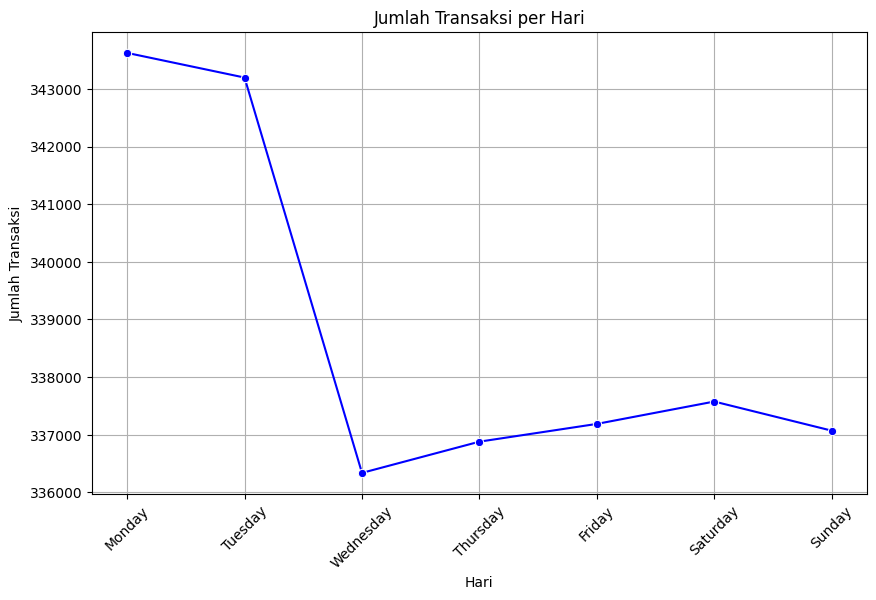

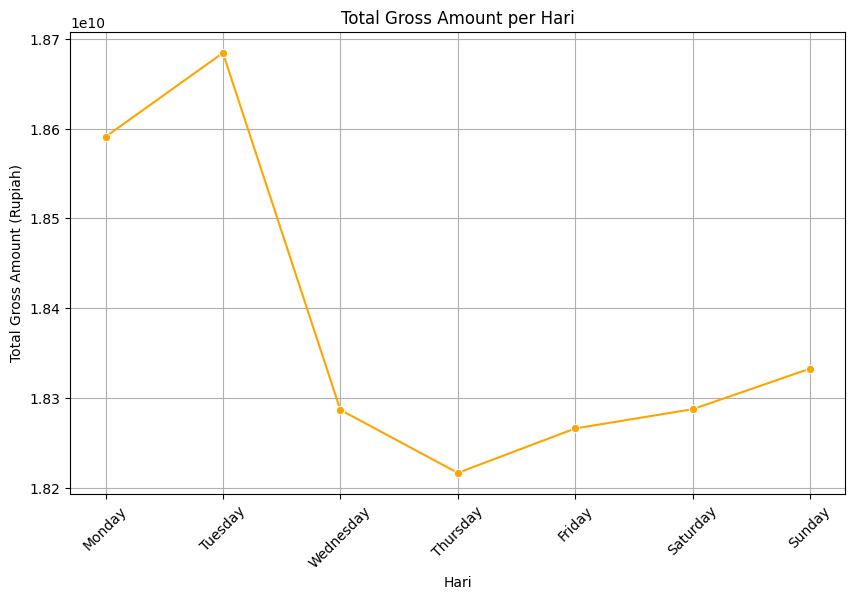

In [314]:
# Mengelompokkan data berdasarkan hari dalam seminggu dan menghitung jumlah transaksi
transactions_per_day = df.groupby('day_name').size().reset_index(name='transaction_count')

# Mengelompokkan data berdasarkan hari dalam seminggu dan menghitung total gross amount
gross_amount_per_day = df.groupby('day_name')['gross_amount'].sum().reset_index()

# Urutkan hari berdasarkan urutan dalam seminggu
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transactions_per_day['day_name'] = pd.Categorical(transactions_per_day['day_name'], categories=days_order, ordered=True)
transactions_per_day = transactions_per_day.sort_values('day_name')
gross_amount_per_day['day_name'] = pd.Categorical(gross_amount_per_day['day_name'], categories=days_order, ordered=True)
gross_amount_per_day = gross_amount_per_day.sort_values('day_name')

# Membuat plot jumlah transaksi per hari
plt.figure(figsize=(10, 6))
sns.lineplot(data=transactions_per_day, x='day_name', y='transaction_count', marker='o', color='blue')
plt.title('Jumlah Transaksi per Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Membuat plot total gross amount per hari
plt.figure(figsize=(10, 6))
sns.lineplot(data=gross_amount_per_day, x='day_name', y='gross_amount', marker='o', color='orange')
plt.title('Total Gross Amount per Hari')
plt.xlabel('Hari')
plt.ylabel('Total Gross Amount (Rupiah)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## **Bagaimana Sebaran Transaksi Pengguna pada Bulan Tertentu di Setiap Provinsinya?**

### **Provinsi Jawa Barat**

In [315]:
# Filter data untuk provinsi dengan kode 32
trans_dist_by_month = df[df['kode_provinsi'] == 32]

# Hitung jumlah transaksi yang terjadi pada setiap bulan
monthly_transaction_count = trans_dist_by_month['month_name'].value_counts().reset_index()
monthly_transaction_count.columns = ['Month', 'Transaction Count']

# Hitung total gross amount yang terjadi pada setiap bulan
monthly_gross_amount = trans_dist_by_month.groupby('month_name')['gross_amount'].sum().reset_index()
monthly_gross_amount.columns = ['Month', 'Total Gross Amount']

# Gabungkan data jumlah transaksi dan total gross amount per bulan menjadi satu dataframe
monthly_data = pd.merge(monthly_transaction_count, monthly_gross_amount, on='Month')

# Ubah format gross amount menjadi Rupiah
monthly_data['Total Gross Amount'] = monthly_data['Total Gross Amount'].apply(format_rupiah)

# Urutkan berdasarkan bulan
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_data['Month'] = pd.Categorical(monthly_data['Month'], categories=months_order, ordered=True)
monthly_data = monthly_data.sort_values('Month')

monthly_data

,Month,Transaction Count,Total Gross Amount
7,January,157136,"Rp8,586,917,700.00"
10,February,156900,"Rp8,564,299,400.00"
0,March,157894,"Rp8,615,190,400.00"
11,April,156344,"Rp8,459,199,400.00"
1,May,157789,"Rp8,567,150,400.00"
3,June,157691,"Rp8,591,775,300.00"
5,July,157380,"Rp8,554,564,400.00"
6,August,157274,"Rp8,597,099,400.00"
9,September,157063,"Rp8,590,011,500.00"
2,October,157745,"Rp8,597,893,200.00"


### **Provinsi Bali**

In [316]:
# Filter data untuk provinsi dengan kode 51
trans_dist_by_month = df[df['kode_provinsi'] == 51]

# Hitung jumlah transaksi yang terjadi pada setiap bulan
monthly_transaction_count = trans_dist_by_month['month_name'].value_counts().reset_index()
monthly_transaction_count.columns = ['Month', 'Transaction Count']

# Hitung total gross amount yang terjadi pada setiap bulan
monthly_gross_amount = trans_dist_by_month.groupby('month_name')['gross_amount'].sum().reset_index()
monthly_gross_amount.columns = ['Month', 'Total Gross Amount']

# Gabungkan data jumlah transaksi dan total gross amount per bulan menjadi satu dataframe
monthly_data = pd.merge(monthly_transaction_count, monthly_gross_amount, on='Month')

# Ubah format gross amount menjadi Rupiah
monthly_data['Total Gross Amount'] = monthly_data['Total Gross Amount'].apply(format_rupiah)

# Urutkan berdasarkan bulan
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_data['Month'] = pd.Categorical(monthly_data['Month'], categories=months_order, ordered=True)
monthly_data = monthly_data.sort_values('Month')

monthly_data

,Month,Transaction Count,Total Gross Amount
0,January,6827,"Rp593,658,200.00"
9,February,6531,"Rp552,955,700.00"
6,March,6569,"Rp551,594,000.00"
1,April,6748,"Rp567,719,100.00"
2,May,6724,"Rp532,362,900.00"
7,June,6550,"Rp540,809,800.00"
4,July,6660,"Rp542,374,300.00"
8,August,6548,"Rp581,895,900.00"
11,September,6476,"Rp577,142,300.00"
3,October,6689,"Rp583,780,700.00"


### **Provinsi Nusa Tenggara Barat**

In [317]:
# Filter data untuk provinsi dengan kode 52
trans_dist_by_month = df[df['kode_provinsi'] == 52]

# Hitung jumlah transaksi yang terjadi pada setiap bulan
monthly_transaction_count = trans_dist_by_month['month_name'].value_counts().reset_index()
monthly_transaction_count.columns = ['Month', 'Transaction Count']

# Hitung total gross amount yang terjadi pada setiap bulan
monthly_gross_amount = trans_dist_by_month.groupby('month_name')['gross_amount'].sum().reset_index()
monthly_gross_amount.columns = ['Month', 'Total Gross Amount']

# Gabungkan data jumlah transaksi dan total gross amount per bulan menjadi satu dataframe
monthly_data = pd.merge(monthly_transaction_count, monthly_gross_amount, on='Month')

# Ubah format gross amount menjadi Rupiah
monthly_data['Total Gross Amount'] = monthly_data['Total Gross Amount'].apply(format_rupiah)

# Urutkan berdasarkan bulan
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_data['Month'] = pd.Categorical(monthly_data['Month'], categories=months_order, ordered=True)
monthly_data = monthly_data.sort_values('Month')

monthly_data

,Month,Transaction Count,Total Gross Amount
3,January,29285,"Rp1,344,962,600.00"
2,February,29340,"Rp1,346,632,200.00"
1,March,29453,"Rp1,378,260,100.00"
5,April,29221,"Rp1,357,669,100.00"
7,May,29182,"Rp1,352,671,800.00"
4,June,29270,"Rp1,383,000,500.00"
10,July,28995,"Rp1,359,747,300.00"
0,August,29500,"Rp1,369,386,600.00"
6,September,29211,"Rp1,360,787,900.00"
8,October,29162,"Rp1,372,574,200.00"


### **Provinsi Maluku Utara**

In [318]:
# Filter data untuk provinsi dengan kode 82
trans_dist_by_month = df[df['kode_provinsi'] == 82]

# Hitung jumlah transaksi yang terjadi pada setiap bulan
monthly_transaction_count = trans_dist_by_month['month_name'].value_counts().reset_index()
monthly_transaction_count.columns = ['Month', 'Transaction Count']

# Hitung total gross amount yang terjadi pada setiap bulan
monthly_gross_amount = trans_dist_by_month.groupby('month_name')['gross_amount'].sum().reset_index()
monthly_gross_amount.columns = ['Month', 'Total Gross Amount']

# Gabungkan data jumlah transaksi dan total gross amount per bulan menjadi satu dataframe
monthly_data = pd.merge(monthly_transaction_count, monthly_gross_amount, on='Month')

# Ubah format gross amount menjadi Rupiah
monthly_data['Total Gross Amount'] = monthly_data['Total Gross Amount'].apply(format_rupiah)

# Urutkan berdasarkan bulan
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_data['Month'] = pd.Categorical(monthly_data['Month'], categories=months_order, ordered=True)
monthly_data = monthly_data.sort_values('Month')

monthly_data

,Month,Transaction Count,Total Gross Amount
9,January,4423,"Rp227,310,300.00"
10,February,4415,"Rp228,634,800.00"
2,March,4544,"Rp234,653,700.00"
0,April,4603,"Rp236,131,800.00"
8,May,4425,"Rp234,546,400.00"
5,June,4512,"Rp221,540,100.00"
4,July,4512,"Rp230,576,500.00"
3,August,4514,"Rp220,883,800.00"
6,September,4482,"Rp229,758,200.00"
7,October,4441,"Rp226,663,500.00"


### **Keseluruhan Provinsi**

In [319]:
# Hitung jumlah transaksi yang terjadi pada setiap bulan
monthly_transaction_count = df['month_name'].value_counts().reset_index()
monthly_transaction_count.columns = ['Month', 'Transaction Count']

# Hitung total gross amount yang terjadi pada setiap bulan
monthly_gross_amount = df.groupby('month_name')['gross_amount'].sum().reset_index()
monthly_gross_amount.columns = ['Month', 'Total Gross Amount']

# Gabungkan data jumlah transaksi dan total gross amount per bulan menjadi satu dataframe
monthly_data = pd.merge(monthly_transaction_count, monthly_gross_amount, on='Month')

# Ubah format gross amount menjadi Rupiah
monthly_data['Total Gross Amount'] = monthly_data['Total Gross Amount'].apply(format_rupiah)

# Urutkan berdasarkan bulan
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_data['Month'] = pd.Categorical(monthly_data['Month'], categories=months_order, ordered=True)
monthly_data = monthly_data.sort_values('Month')

monthly_data

,Month,Transaction Count,Total Gross Amount
6,January,197671,"Rp10,752,848,800.00"
9,February,197186,"Rp10,692,522,100.00"
0,March,198460,"Rp10,779,698,200.00"
11,April,196916,"Rp10,620,719,400.00"
1,May,198120,"Rp10,686,731,500.00"
3,June,198023,"Rp10,737,125,700.00"
7,July,197547,"Rp10,687,262,500.00"
4,August,197836,"Rp10,769,265,700.00"
8,September,197232,"Rp10,757,699,900.00"
2,October,198037,"Rp10,780,911,600.00"


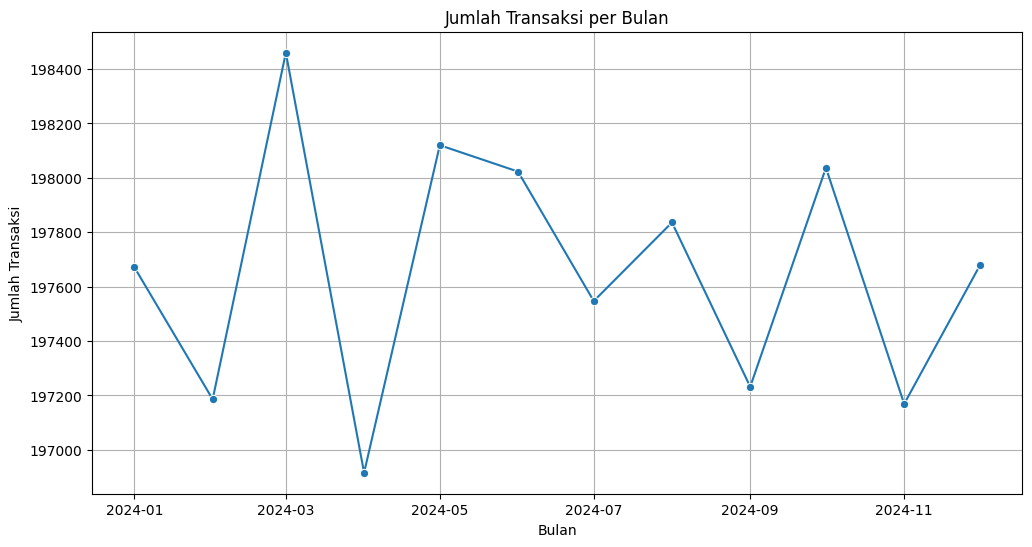

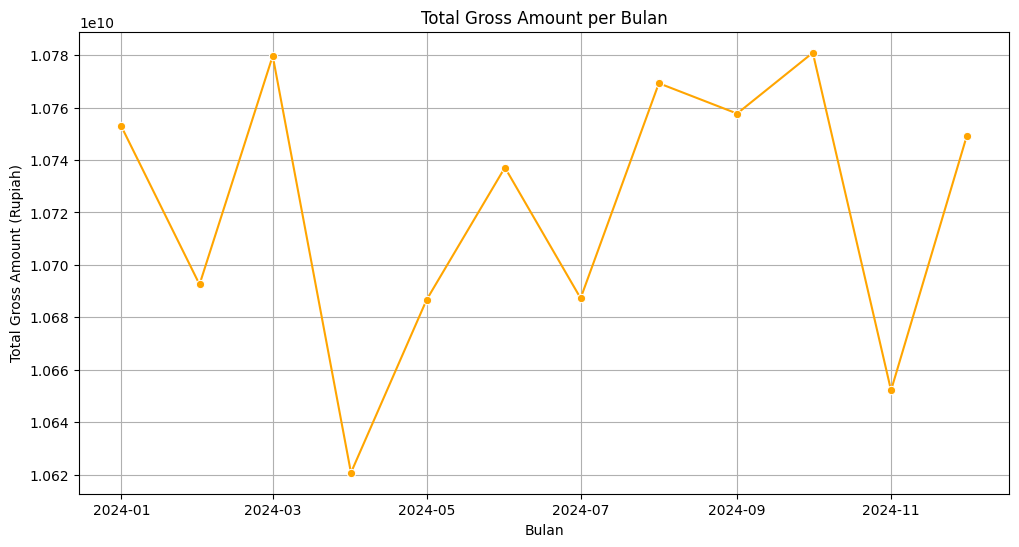

In [320]:
# Mengelompokkan data berdasarkan bulan dan tahun, dan menghitung jumlah transaksi
transactions_per_month = df.groupby(df['transaction_date'].dt.to_period('M')).size().reset_index(name='transaction_count')

# Mengelompokkan data berdasarkan bulan dan tahun, dan menghitung total gross amount
gross_amount_per_month = df.groupby(df['transaction_date'].dt.to_period('M'))['gross_amount'].sum().reset_index()

# Mengubah 'transaction_date' menjadi datetime lagi setelah menggunakan to_period
transactions_per_month['transaction_date'] = transactions_per_month['transaction_date'].dt.to_timestamp()
gross_amount_per_month['transaction_date'] = gross_amount_per_month['transaction_date'].dt.to_timestamp()

# Membuat plot jumlah transaksi per bulan
plt.figure(figsize=(12, 6))
sns.lineplot(data=transactions_per_month, x='transaction_date', y='transaction_count', marker='o')
plt.title('Jumlah Transaksi per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.grid(True)
plt.show()

# Membuat plot total gross amount per bulan
plt.figure(figsize=(12, 6))
sns.lineplot(data=gross_amount_per_month, x='transaction_date', y='gross_amount', marker='o', color='orange')
plt.title('Total Gross Amount per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Gross Amount (Rupiah)')
plt.grid(True)
plt.show()

## **Bagaimana Perbandingan User yang Pernah dan Belum Pernah Bertransaksi?**

In [321]:
# Hitung jumlah seluruh pengguna unik
total_users = df_2['id'].nunique()

# Hitung jumlah pengguna yang tidak pernah transaksi (id_transaksi bernilai NaN)
non_transaction_users = df_2['id_transaksi'].isna().sum()

# Hitung jumlah pengguna yang pernah transaksi
transaction_users = total_users - non_transaction_users

# Hitung persentase masing-masing kategori
non_transaction_percentage = (non_transaction_users / total_users) * 100
transaction_percentage = (transaction_users / total_users) * 100

# Tampilkan hasil
print(f"Total pengguna: {total_users}")
print(f"Pengguna yang tidak pernah transaksi: {non_transaction_users} ({non_transaction_percentage:.2f}%)")
print(f"Pengguna yang pernah transaksi: {transaction_users} ({transaction_percentage:.2f}%)")

Total pengguna: 76885
Pengguna yang tidak pernah transaksi: 7733 (10.06%)
Pengguna yang pernah transaksi: 69152 (89.94%)


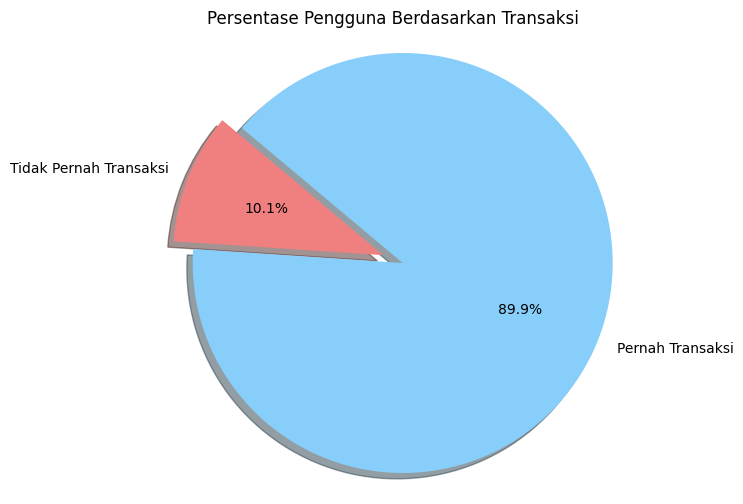

In [322]:
# Buat pie chart
labels = ['Tidak Pernah Transaksi', 'Pernah Transaksi']
sizes = [non_transaction_percentage, transaction_percentage]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Memperbesar irisan untuk kategori 'Tidak Pernah Transaksi'

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.title('Persentase Pengguna Berdasarkan Transaksi')
plt.show()

In [323]:
# Filter pengguna yang belum pernah melakukan transaksi
no_transaction_users = df_2[df_2['id_transaksi'].isna()]

# Pilih kolom yang diinginkan
selected_columns = no_transaction_users[['birth', 'age', 'money_spent', 'refund', 'wallet_balance']]

selected_columns

,birth,age,money_spent,refund,wallet_balance
2397846,1959-06-12,65.0,2080000.0,110000.0,220000.0
2397847,1992-06-05,32.0,2060000.0,110000.0,180000.0
2397848,1999-12-21,25.0,2310000.0,110000.0,210000.0
2397849,1994-04-23,30.0,0.0,0.0,0.0
2397850,2000-01-13,24.0,2410000.0,240000.0,380000.0
...,...,...,...,...,...
2405574,2007-07-11,17.0,1550000.0,390000.0,1090000.0
2405575,1983-03-10,41.0,2060000.0,90000.0,780000.0
2405576,1998-01-17,26.0,2090000.0,220000.0,790000.0
2405577,1988-08-16,36.0,2510000.0,130000.0,490000.0


In [324]:
selected_columns.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
birth,7733,1989-03-03 21:33:38.104228608,1959-01-05 00:00:00,1981-09-22 00:00:00,1989-06-14 00:00:00,1997-01-18 00:00:00,2007-12-26 00:00:00,NaN
age,7733.0,35.320445,17.0,27.0,35.0,43.0,65.0,10.612197
money_spent,7733.0,1575920.082762,0.0,1450000.0,1840000.0,2080000.0,5000000.0,771766.570435
refund,7733.0,163873.011768,0.0,30000.0,140000.0,220000.0,6740000.0,261052.107256
wallet_balance,7733.0,582543.644123,0.0,350000.0,560000.0,740000.0,8890000.0,553300.222649


# **Modeling**

## **Sampling Data Transaksi per Provinsi**

### **Provinsi Jawa Barat**

In [325]:
sampled_prov_32_df = df[df['kode_provinsi'] == 32]

In [326]:
# Menghitung proporsi sampel yang diinginkan
fraction = 55866 / len(prov_32_df)
sampled_prov_32_df = sampled_prov_32_df.sample(frac=fraction, random_state=1)

sampled_prov_32_df

,id_transaksi,user_id,product_id,product_name,gross_amount,discounts,transaction_date,full_name,gender,money_spent,...,day,day_name,date,month,month_name,year,flag_discount,flag_discount_status,burn_rate_percentage,z_score_burn_rate
722830,TRX1273534,SC3209322004004,3,Food & Drink,273900.0,0.0,2024-11-09,Hj. ALHADAR,Perempuan,2520000.0,...,5,Saturday,9,11,November,2024,0,No Discount,0.000000,-0.599219
1447208,TRX2011226,SC3210172005002,8,Elektronik,58800.0,30000.0,2024-12-28,"Hi KEMAL S.E., M.Si.",Laki-laki,1750000.0,...,5,Saturday,28,12,December,2024,1,Has Discount,51.020408,0.787674
1392384,TRX1955435,SC3210032006016,17,Hotel,59900.0,0.0,2024-01-26,ANDI SANTOSO,Laki-laki,2090000.0,...,4,Friday,26,1,January,2024,0,No Discount,0.000000,-0.599219
76174,TRX616759,SC3204292008030,1,Man Fashion,41000.0,10700.0,2024-03-30,ALFA KUSUMA,Perempuan,2120000.0,...,5,Saturday,30,3,March,2024,1,Has Discount,26.097561,0.110194
116421,TRX657534,SC3204332003032,3,Food & Drink,2700.0,0.0,2024-10-28,A. KASMAWATI Z.,Perempuan,1870000.0,...,0,Monday,28,10,October,2024,0,No Discount,0.000000,-0.599219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571459,TRX2137449,SC3213252001017,8,Elektronik,7600.0,0.0,2024-10-08,LAN,Perempuan,1590000.0,...,1,Tuesday,8,10,October,2024,0,No Discount,0.000000,-0.599219
275651,TRX817923,SC3217062009037,14,Kesehatan,108700.0,0.0,2024-10-25,CHEROLINE AZZAHRA RAHIMAH PUTRI,Perempuan,2370000.0,...,4,Friday,25,10,October,2024,0,No Discount,0.000000,-0.599219
237225,TRX779196,SC3217042006015,1,Man Fashion,34100.0,0.0,2024-06-12,MUZAENAH,Perempuan,1760000.0,...,2,Wednesday,12,6,June,2024,0,No Discount,0.000000,-0.599219
1386456,TRX1949436,SC3210052004005,7,Keperluan Anak,3900.0,0.0,2024-06-19,DARI,Perempuan,2130000.0,...,2,Wednesday,19,6,June,2024,0,No Discount,0.000000,-0.599219


### **Provinsi Bali**

In [327]:
sampled_prov_51_df = df[df['kode_provinsi'] == 51]

In [328]:
# Menghitung proporsi sampel yang diinginkan
fraction = 55866 / len(prov_51_df)
sampled_prov_51_df = sampled_prov_51_df.sample(frac=fraction, random_state=1)

sampled_prov_51_df

,id_transaksi,user_id,product_id,product_name,gross_amount,discounts,transaction_date,full_name,gender,money_spent,...,day,day_name,date,month,month_name,year,flag_discount,flag_discount_status,burn_rate_percentage,z_score_burn_rate
1908758,TRX590149,SC5108032011014,3,Food & Drink,634300.0,48700.0,2024-04-21,NASUTION,Laki-laki,1790000.0,...,6,Sunday,21,4,April,2024,1,Has Discount,7.677755,-0.390514
1925374,TRX606966,SC5104012006003,4,Ride Hailing,30800.0,0.0,2024-09-03,SITUMORANG,Perempuan,2260000.0,...,1,Tuesday,3,9,September,2024,0,No Discount,0.000000,-0.599219
1910004,TRX591399,SC5108012010012,8,Elektronik,35000.0,0.0,2024-07-12,IKA BOUTIE NOVITA,Perempuan,2020000.0,...,4,Friday,12,7,July,2024,0,No Discount,0.000000,-0.599219
1936698,TRX618422,SC5107062006018,15,Investasi,60100.0,0.0,2024-11-05,DIDI,Laki-laki,1940000.0,...,1,Tuesday,5,11,November,2024,0,No Discount,0.000000,-0.599219
1920812,TRX602342,SC5104032001004,3,Food & Drink,714000.0,0.0,2024-07-04,RATNAWATI S.H.,Perempuan,2490000.0,...,3,Thursday,4,7,July,2024,0,No Discount,0.000000,-0.599219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897554,TRX578855,SC5103022011001,3,Food & Drink,676700.0,0.0,2024-06-08,ISAIAS SYAFRUDDIN,Laki-laki,2300000.0,...,5,Saturday,8,6,June,2024,0,No Discount,0.000000,-0.599219
1966463,TRX648998,SC5102052006014,4,Ride Hailing,481400.0,0.0,2024-08-02,KHULQI,Laki-laki,1860000.0,...,4,Friday,2,8,August,2024,0,No Discount,0.000000,-0.599219
1909138,TRX590530,SC5108032015007,15,Investasi,14200.0,10000.0,2024-07-01,ANDRE UTOMO S.ST.,Laki-laki,1860000.0,...,0,Monday,1,7,July,2024,1,Has Discount,70.422535,1.315084
1895845,TRX577087,SC5103022010011,2,Woman Fashion,10500.0,0.0,2024-08-22,SUGIAT FAIZAL S.Sy.,Laki-laki,1590000.0,...,3,Thursday,22,8,August,2024,0,No Discount,0.000000,-0.599219


### **Provinsi Nusa Tenggara Barat**

In [329]:
sampled_prov_52_df = df[df['kode_provinsi'] == 52]

In [330]:
# Menghitung proporsi sampel yang diinginkan
fraction = 55866 / len(prov_52_df)
sampled_prov_52_df = sampled_prov_52_df.sample(frac=fraction, random_state=1)

sampled_prov_52_df

,id_transaksi,user_id,product_id,product_name,gross_amount,discounts,transaction_date,full_name,gender,money_spent,...,day,day_name,date,month,month_name,year,flag_discount,flag_discount_status,burn_rate_percentage,z_score_burn_rate
2211128,TRX873835,SC5203042005032,3,Food & Drink,117400.0,30000.0,2024-10-21,TRI,Perempuan,1790000.0,...,0,Monday,21,10,October,2024,1,Has Discount,25.553663,0.095409
2083888,TRX744351,SC5202072006019,14,Kesehatan,2200.0,2200.0,2024-10-03,B. TASAK,Laki-laki,1860000.0,...,3,Thursday,3,10,October,2024,1,Has Discount,100.000000,2.119092
2221360,TRX884198,SC5203062007016,13,Pulsa,5800.0,0.0,2024-12-29,KURNIANTI YOGINA,Perempuan,2060000.0,...,6,Sunday,29,12,December,2024,0,No Discount,0.000000,-0.599219
2236005,TRX898908,SC5203032004019,4,Ride Hailing,8100.0,0.0,2024-04-14,DEWI PATRIA,Perempuan,1760000.0,...,6,Sunday,14,4,April,2024,0,No Discount,0.000000,-0.599219
2119391,TRX780654,SC5202112005009,17,Hotel,97400.0,0.0,2024-04-03,Dr. ANTO AHMAD,Laki-laki,1270000.0,...,2,Wednesday,3,4,April,2024,0,No Discount,0.000000,-0.599219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991518,TRX650062,SC5206052014002,4,Ride Hailing,236200.0,0.0,2024-04-18,MANALU ANTONIUS M.Si.,Laki-laki,1560000.0,...,3,Thursday,18,4,April,2024,0,No Discount,0.000000,-0.599219
2031002,TRX690281,SC5271051007003,1,Man Fashion,17400.0,0.0,2024-03-22,DIAH,Perempuan,1730000.0,...,4,Friday,22,3,March,2024,0,No Discount,0.000000,-0.599219
2047349,TRX706797,SC5201092009021,17,Hotel,1500.0,0.0,2024-02-12,SAFARUDDIN KRISTIAWANTO KHOLIQ,Laki-laki,1180000.0,...,0,Monday,12,2,February,2024,0,No Discount,0.000000,-0.599219
2090590,TRX751198,SC5202022003010,3,Food & Drink,56100.0,38000.0,2024-05-11,SITI AFTAMARI,Perempuan,1750000.0,...,5,Saturday,11,5,May,2024,1,Has Discount,67.736185,1.242061


### **Provinsi Maluku Utara**

In [331]:
sampled_prov_82_df = df[df['kode_provinsi'] == 82]
sampled_prov_82_df

,id_transaksi,user_id,product_id,product_name,gross_amount,discounts,transaction_date,full_name,gender,money_spent,...,day,day_name,date,month,month_name,year,flag_discount,flag_discount_status,burn_rate_percentage,z_score_burn_rate
2318020,TRX821217,SC8201032020001,1,Man Fashion,46600.0,0.0,2024-10-13,SEFIRA PUTRI KHAIRANI Sugiyanti,Perempuan,1840000.0,...,6,Sunday,13,10,October,2024,0,No Discount,0.000000,-0.599219
2318021,TRX821218,SC8201032020001,1,Man Fashion,16400.0,0.0,2024-04-12,SEFIRA PUTRI KHAIRANI Sugiyanti,Perempuan,1840000.0,...,4,Friday,12,4,April,2024,0,No Discount,0.000000,-0.599219
2318022,TRX821219,SC8201032020001,1,Man Fashion,23900.0,3400.0,2024-10-14,SEFIRA PUTRI KHAIRANI Sugiyanti,Perempuan,1840000.0,...,0,Monday,14,10,October,2024,1,Has Discount,14.225941,-0.212514
2318023,TRX821220,SC8201032020001,1,Man Fashion,33100.0,16600.0,2024-10-17,SEFIRA PUTRI KHAIRANI Sugiyanti,Perempuan,1840000.0,...,3,Thursday,17,10,October,2024,1,Has Discount,50.151057,0.764043
2318024,TRX821221,SC8201032020001,2,Woman Fashion,7800.0,0.0,2024-05-22,SEFIRA PUTRI KHAIRANI Sugiyanti,Perempuan,1840000.0,...,2,Wednesday,22,5,May,2024,0,No Discount,0.000000,-0.599219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371870,TRX877078,SC8208042019001,14,Kesehatan,16100.0,10000.0,2024-11-19,WAHYU HATTA,Laki-laki,1860000.0,...,1,Tuesday,19,11,November,2024,1,Has Discount,62.111801,1.089173
2371871,TRX877079,SC8208042019001,17,Hotel,500.0,0.0,2024-09-11,WAHYU HATTA,Laki-laki,1860000.0,...,2,Wednesday,11,9,September,2024,0,No Discount,0.000000,-0.599219
2371872,TRX877080,SC8208042019001,17,Hotel,900.0,0.0,2024-04-05,WAHYU HATTA,Laki-laki,1860000.0,...,4,Friday,5,4,April,2024,0,No Discount,0.000000,-0.599219
2371873,TRX877081,SC8208042019001,17,Hotel,4200.0,0.0,2024-08-23,WAHYU HATTA,Laki-laki,1860000.0,...,4,Friday,23,8,August,2024,0,No Discount,0.000000,-0.599219


## **Dataframe Merging for Modeling**

In [332]:
# Gabungkan DataFrame secara baris
modeling_df = pd.concat([sampled_prov_32_df, sampled_prov_51_df, sampled_prov_52_df, sampled_prov_82_df])

modeling_df

,id_transaksi,user_id,product_id,product_name,gross_amount,discounts,transaction_date,full_name,gender,money_spent,...,day,day_name,date,month,month_name,year,flag_discount,flag_discount_status,burn_rate_percentage,z_score_burn_rate
722830,TRX1273534,SC3209322004004,3,Food & Drink,273900.0,0.0,2024-11-09,Hj. ALHADAR,Perempuan,2520000.0,...,5,Saturday,9,11,November,2024,0,No Discount,0.000000,-0.599219
1447208,TRX2011226,SC3210172005002,8,Elektronik,58800.0,30000.0,2024-12-28,"Hi KEMAL S.E., M.Si.",Laki-laki,1750000.0,...,5,Saturday,28,12,December,2024,1,Has Discount,51.020408,0.787674
1392384,TRX1955435,SC3210032006016,17,Hotel,59900.0,0.0,2024-01-26,ANDI SANTOSO,Laki-laki,2090000.0,...,4,Friday,26,1,January,2024,0,No Discount,0.000000,-0.599219
76174,TRX616759,SC3204292008030,1,Man Fashion,41000.0,10700.0,2024-03-30,ALFA KUSUMA,Perempuan,2120000.0,...,5,Saturday,30,3,March,2024,1,Has Discount,26.097561,0.110194
116421,TRX657534,SC3204332003032,3,Food & Drink,2700.0,0.0,2024-10-28,A. KASMAWATI Z.,Perempuan,1870000.0,...,0,Monday,28,10,October,2024,0,No Discount,0.000000,-0.599219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371870,TRX877078,SC8208042019001,14,Kesehatan,16100.0,10000.0,2024-11-19,WAHYU HATTA,Laki-laki,1860000.0,...,1,Tuesday,19,11,November,2024,1,Has Discount,62.111801,1.089173
2371871,TRX877079,SC8208042019001,17,Hotel,500.0,0.0,2024-09-11,WAHYU HATTA,Laki-laki,1860000.0,...,2,Wednesday,11,9,September,2024,0,No Discount,0.000000,-0.599219
2371872,TRX877080,SC8208042019001,17,Hotel,900.0,0.0,2024-04-05,WAHYU HATTA,Laki-laki,1860000.0,...,4,Friday,5,4,April,2024,0,No Discount,0.000000,-0.599219
2371873,TRX877081,SC8208042019001,17,Hotel,4200.0,0.0,2024-08-23,WAHYU HATTA,Laki-laki,1860000.0,...,4,Friday,23,8,August,2024,0,No Discount,0.000000,-0.599219


Sampling data transaksi per provinsi dan kemudian menggabungkannya kembali diperlukan untuk beberapa alasan penting. Pertama, ini membantu mengelola ukuran dataset, membuat analisis lebih efisien dan cepat, serta mengurangi kebutuhan sumber daya komputasi. Kedua, sampling memastikan bahwa setiap provinsi terwakili dengan baik, menghindari bias dan memungkinkan hasil analisis yang valid dan dapat digeneralisasikan. Ketiga, analisis data per provinsi memungkinkan identifikasi pola dan tren spesifik lokal, yang berguna untuk strategi regional. Setelah disampling, menggabungkan data memungkinkan analisis secara menyeluruh.

## **Feature Normalization**

In [333]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Kolom yang akan dinormalisasi
columns_to_normalize = ['burn_rate_percentage', 'z_score_burn_rate']

# Lakukan normalisasi z-score
modeling_df[columns_to_normalize] = scaler.fit_transform(modeling_df[columns_to_normalize])

# Tampilkan lima baris pertama DataFrame setelah normalisasi
modeling_df[['burn_rate_percentage', 'z_score_burn_rate']]

,burn_rate_percentage,z_score_burn_rate
722830,-0.518283,-0.518283
1447208,1.013029,1.013029
1392384,-0.518283,-0.518283
76174,0.265002,0.265002
116421,-0.518283,-0.518283
...,...,...
2371870,1.345923,1.345923
2371871,-0.518283,-0.518283
2371872,-0.518283,-0.518283
2371873,-0.518283,-0.518283


In [334]:
modeling_df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
product_id,219677.0,8.175025,1.0,3.0,7.0,13.0,18.0,5.25624
gross_amount,219677.0,58896.779362,0.0,5800.0,18300.0,59100.0,2237700.0,118275.816711
discounts,219677.0,8173.697292,0.0,0.0,0.0,4000.0,885800.0,25518.443253
transaction_date,219677,2024-06-30 21:37:07.137114880,2024-01-01 00:00:00,2024-03-31 00:00:00,2024-06-30 00:00:00,2024-09-30 00:00:00,2024-12-31 00:00:00,NaN
money_spent,219677.0,1881143.542565,0.0,1660000.0,1910000.0,2130000.0,2980000.0,375220.704614
refund,219677.0,157943.480656,0.0,40000.0,130000.0,220000.0,23610000.0,185342.972989
wallet_balance,219677.0,583671.845482,0.0,380000.0,560000.0,740000.0,23250000.0,338310.225102
join_date,219677,2023-11-17 20:50:13.828484096,2023-10-01 00:00:00,2023-10-25 00:00:00,2023-11-18 00:00:00,2023-12-11 00:00:00,2024-12-28 00:00:00,NaN
birth,219677,1989-04-08 22:57:27.479708928,1959-01-01 00:00:00,1982-01-18 00:00:00,1989-07-14 00:00:00,1997-02-03 00:00:00,2007-12-28 00:00:00,NaN
age,219677.0,35.226505,17.0,27.0,35.0,42.0,65.0,10.6046


## **Feature Selection**

### **Heatmap Correlation**

In [335]:
# Memilih hanya kolom numerik
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X_numerical = df[numerical_cols]

# Menghitung korelasi antara fitur numerik dan target
correlation_matrix = X_numerical.corr()
correlation_with_target = correlation_matrix['z_score_burn_rate'].drop('z_score_burn_rate').sort_values()

correlation_with_target

product_id             -0.093990
kode_provinsi          -0.079619
gross_amount           -0.045882
age                    -0.001129
month                  -0.000279
date                   -0.000022
day                     0.000388
money_spent             0.002803
refund                  0.015865
wallet_balance          0.022075
discounts               0.493554
flag_discount           0.857910
burn_rate_percentage    1.000000
year                         NaN
Name: z_score_burn_rate, dtype: float64

### **Variance Inflation Factor (VIF)**

In [336]:
# Variabel yang ingin diperiksa VIF-nya
features = ['discounts', 'gross_amount', 'burn_rate_percentage']

features_cluster = df[features]

# Hitung VIF dan Toleransi
vif_data = pd.DataFrame()
vif_data["Features"] = features_cluster.columns
vif_data["VIF"] = [variance_inflation_factor(features_cluster.values, i) for i in range(len(features_cluster.columns))]
vif_data["Tolerance"] = 1 / vif_data["VIF"]

print(vif_data)

               Features       VIF  Tolerance
0             discounts  1.936605   0.516368
1          gross_amount  1.355136   0.737933
2  burn_rate_percentage  1.523315   0.656463


## **Menentukan Jumlah Cluster Paling Optimal**

### **Elbow Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

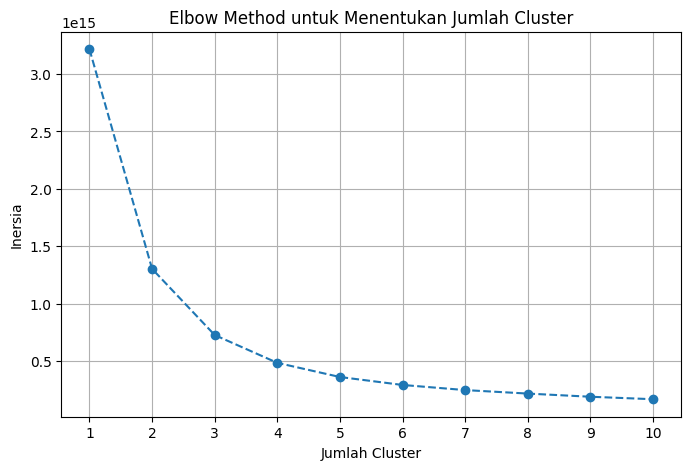

In [337]:
# Menggunakan fitur discounts, gross_amount, dan burn_rate_percentage
features = modeling_df[['discounts', 'gross_amount', 'burn_rate_percentage']]

# Menyimpan inersia untuk setiap jumlah klaster
inertia = []
range_n_clusters = range(1, 11)  # Coba jumlah klaster dari 1 hingga 10

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plotting Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inersia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster')
plt.xticks(range_n_clusters)
plt.grid(True)

### **Silhoutte Score dan Davies-Bouldin Index (DBI)**

In [339]:
# Coba berbagai jumlah kluster
range_n_clusters = [2, 3, 4, 5, 6, 7]

best_n_clusters = 0
best_silhouette_score = -1
best_dbi_score = float('inf')
best_clusters = None

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(features)

    silhouette_avg = silhouette_score(features, clusters)
    dbi_score = davies_bouldin_score(features, clusters)
    print(f'For n_clusters = {n_clusters}, Silhouette Score = {silhouette_avg}, DBI = {dbi_score}')

    if silhouette_avg > best_silhouette_score:
        best_n_clusters = n_clusters
        best_silhouette_score = silhouette_avg
        best_dbi_score = dbi_score
        best_clusters = clusters

# Gunakan jumlah kluster terbaik
modeling_df['cluster'] = best_clusters

# Menampilkan hasil clustering
print(f'\nBest number of clusters: {best_n_clusters}')
print(f'Best Silhouette Score: {best_silhouette_score}')
print(f'Best DBI: {best_dbi_score}')
print(modeling_df)

# Interpretasi: Menganalisis setiap cluster untuk menentukan strategi diskon yang tepat
# Menampilkan statistik deskriptif untuk setiap cluster
for cluster in modeling_df['cluster'].unique():
    print(f"\nCluster {cluster}")
    print(modeling_df[modeling_df['cluster'] == cluster].describe())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, Silhouette Score = 0.8481181462974069, DBI = 0.5330153652610891


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, Silhouette Score = 0.7680550055231996, DBI = 0.5869960135914873


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, Silhouette Score = 0.7207114002666616, DBI = 0.6147498895177068


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, Silhouette Score = 0.6787963372230316, DBI = 0.6567156052789705


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, Silhouette Score = 0.6460808362357086, DBI = 0.7003637107093055


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, Silhouette Score = 0.6327807351141952, DBI = 0.72084521818678

Best number of clusters: 2
Best Silhouette Score: 0.8481181462974069
Best DBI: 0.5330153652610891
        id_transaksi          user_id  product_id  product_name  gross_amount  \
722830    TRX1273534  SC3209322004004           3  Food & Drink      273900.0   
1447208   TRX2011226  SC3210172005002           8    Elektronik       58800.0   
1392384   TRX1955435  SC3210032006016          17         Hotel       59900.0   
76174      TRX616759  SC3204292008030           1   Man Fashion       41000.0   
116421     TRX657534  SC3204332003032           3  Food & Drink        2700.0   
...              ...              ...         ...           ...           ...   
2371870    TRX877078  SC8208042019001          14     Kesehatan       16100.0   
2371871    TRX877079  SC8208042019001          17         Hotel         500.0   
2371872    TRX877080  SC8208042019001          17         Hotel         900.0   
2371873  

### **Visualisasi Model Cluster**

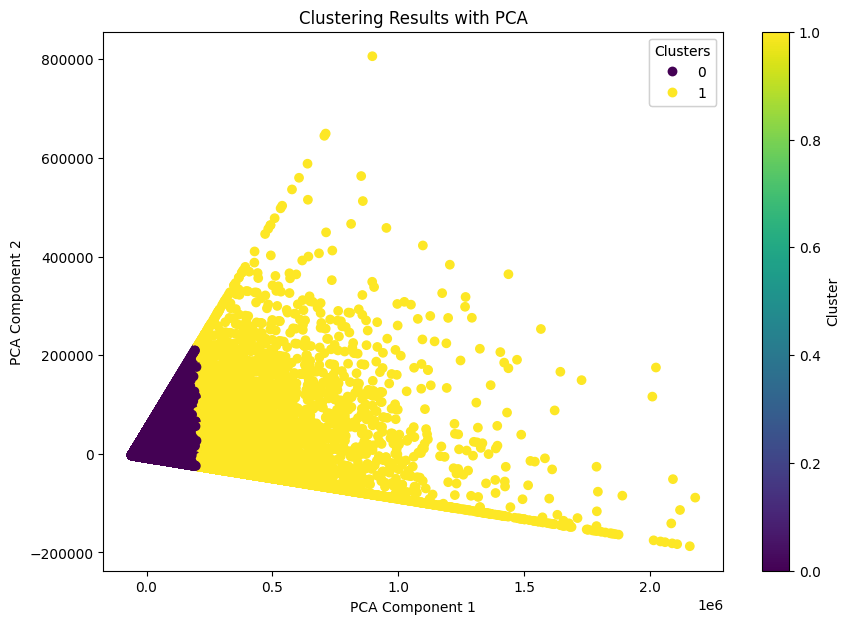

In [340]:
# Visualisasi clustering menggunakan PCA untuk reduksi dimensi
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=best_clusters, cmap='viridis', marker='o')
plt.title('Clustering Results with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')

# Menambahkan keterangan pada plot
legend1 = plt.legend(*scatter.legend_elements(),
                    title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

### **Clustering Dataframe dengan K-Means**

In [341]:
features = df[['discounts', 'gross_amount', 'burn_rate_percentage']]

# Inisialisasi model K-Means dengan jumlah klaster sebanyak 2
kmeans = KMeans(n_clusters=2, random_state=42)

# Melakukan clustering
kmeans.fit(features)

# Menambahkan label klaster ke dalam data
df['cluster'] = kmeans.labels_

df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,id_transaksi,user_id,product_id,product_name,gross_amount,discounts,transaction_date,full_name,gender,money_spent,...,day_name,date,month,month_name,year,flag_discount,flag_discount_status,burn_rate_percentage,z_score_burn_rate,cluster
0,TRX539730,SC3204162004003,2,Woman Fashion,55400.0,0.0,2024-08-11,Febrianti MITA,Perempuan,1220000.0,...,Sunday,11,8,August,2024,0,No Discount,0.000000,-0.599219,0
1,TRX539731,SC3204162004003,2,Woman Fashion,1600.0,0.0,2024-01-19,Febrianti MITA,Perempuan,1220000.0,...,Friday,19,1,January,2024,0,No Discount,0.000000,-0.599219,0
2,TRX539732,SC3204162004003,2,Woman Fashion,4100.0,4100.0,2024-08-24,Febrianti MITA,Perempuan,1220000.0,...,Saturday,24,8,August,2024,1,Has Discount,100.000000,2.119092,0
3,TRX539733,SC3204162004003,2,Woman Fashion,8900.0,5900.0,2024-03-12,Febrianti MITA,Perempuan,1220000.0,...,Tuesday,12,3,March,2024,1,Has Discount,66.292135,1.202807,0
4,TRX539734,SC3204162004003,3,Food & Drink,2300.0,0.0,2024-04-21,Febrianti MITA,Perempuan,1220000.0,...,Sunday,21,4,April,2024,0,No Discount,0.000000,-0.599219,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371870,TRX877078,SC8208042019001,14,Kesehatan,16100.0,10000.0,2024-11-19,WAHYU HATTA,Laki-laki,1860000.0,...,Tuesday,19,11,November,2024,1,Has Discount,62.111801,1.089173,0
2371871,TRX877079,SC8208042019001,17,Hotel,500.0,0.0,2024-09-11,WAHYU HATTA,Laki-laki,1860000.0,...,Wednesday,11,9,September,2024,0,No Discount,0.000000,-0.599219,0
2371872,TRX877080,SC8208042019001,17,Hotel,900.0,0.0,2024-04-05,WAHYU HATTA,Laki-laki,1860000.0,...,Friday,5,4,April,2024,0,No Discount,0.000000,-0.599219,0
2371873,TRX877081,SC8208042019001,17,Hotel,4200.0,0.0,2024-08-23,WAHYU HATTA,Laki-laki,1860000.0,...,Friday,23,8,August,2024,0,No Discount,0.000000,-0.599219,0


# **Exploratory Data Analysis After Clustered**

## **Overview**

### **Total Jumlah User yang Melakukan Transaksi / Cluster**

In [384]:
# Menghitung jumlah user unik yang pernah melakukan transaksi per cluster
jumlah_user_per_cluster = df.groupby('cluster')['user_id'].nunique().reset_index()
jumlah_user_per_cluster.rename(columns={'cluster': 'Cluster', 'user_id': 'Jumlah User'}, inplace=True)

# Menampilkan hasil
print("Jumlah user yang pernah melakukan transaksi per cluster:")
jumlah_user_per_cluster

Jumlah user yang pernah melakukan transaksi per cluster:


,Cluster,Jumlah User
0,0,69078
1,1,66562


In [385]:
# Menghitung jumlah user unik yang pernah melakukan transaksi per cluster dan provinsi
jumlah_user_per_cluster_provinsi = df.groupby(['cluster', 'nama_provinsi'])['user_id'].nunique().reset_index()
jumlah_user_per_cluster_provinsi.rename(columns={'cluster': 'Cluster', 'nama_provinsi': 'Province', 'user_id': 'Jumlah User'}, inplace=True)

# Menampilkan hasil
print("Jumlah user yang pernah melakukan transaksi per cluster dan provinsi:")
jumlah_user_per_cluster_provinsi

Jumlah user yang pernah melakukan transaksi per cluster dan provinsi:


,Cluster,Province,Jumlah User
0,0,BALI,3459
1,0,JAWA BARAT,55134
2,0,MALUKU UTARA,1475
3,0,NUSA TENGGARA BARAT,9010
4,1,BALI,3481
5,1,JAWA BARAT,53267
6,1,MALUKU UTARA,1400
7,1,NUSA TENGGARA BARAT,8414


### **Total Jumlah Transaksi / Cluster**

In [386]:
# Menghitung jumlah transaksi yang terjadi per cluster
jumlah_transaksi_per_cluster = df.groupby('cluster')['id_transaksi'].count().reset_index()
jumlah_transaksi_per_cluster.rename(columns={'cluster': 'Cluster', 'id_transaksi': 'Jumlah Transaksi'}, inplace=True)

# Menampilkan hasil dalam bentuk dataframe
print("Jumlah transaksi yang terjadi per cluster:")
jumlah_transaksi_per_cluster

Jumlah transaksi yang terjadi per cluster:


,Cluster,Jumlah Transaksi
0,0,2171455
1,1,200420


In [387]:
# Menghitung jumlah transaksi yang terjadi per cluster dan nama_provinsi
jumlah_transaksi_per_cluster_provinsi = df.groupby(['cluster', 'nama_provinsi'])['id_transaksi'].count().reset_index()
jumlah_transaksi_per_cluster_provinsi.columns = ['Cluster', 'Province', 'Jumlah Transaksi']

# Menampilkan hasil dalam bentuk dataframe
print("Jumlah transaksi yang terjadi per cluster dan provinsi:")
jumlah_transaksi_per_cluster_provinsi

Jumlah transaksi yang terjadi per cluster dan provinsi:


,Cluster,Province,Jumlah Transaksi
0,0,BALI,68054
1,0,JAWA BARAT,1726410
2,0,MALUKU UTARA,49419
3,0,NUSA TENGGARA BARAT,327572
4,1,BALI,11367
5,1,JAWA BARAT,161503
6,1,MALUKU UTARA,4436
7,1,NUSA TENGGARA BARAT,23114


### **Total Gross Amount / Cluster**

In [388]:
# Menghitung total gross amount per cluster
total_gross_amount_per_cluster = df.groupby('cluster')['gross_amount'].sum().reset_index()

# Format total gross amount dalam Rupiah
total_gross_amount_per_cluster['gross_amount'] = total_gross_amount_per_cluster['gross_amount'].apply(lambda x: "Rp{:,.2f}".format(x))

# Ubah nama kolom
total_gross_amount_per_cluster.columns = ['Cluster', 'Total Gross Amount']

# Menampilkan hasil
print("Total gross amount per cluster:")
total_gross_amount_per_cluster

Total gross amount per cluster:


,Cluster,Total Gross Amount
0,0,"Rp72,480,378,000.00"
1,1,"Rp56,185,674,200.00"


In [389]:
# Menghitung total gross amount per cluster dan provinsi
total_gross_amount_per_cluster = df.groupby(['cluster', 'nama_provinsi'])['gross_amount'].sum().reset_index()

# Format total gross amount dalam Rupiah
total_gross_amount_per_cluster['gross_amount'] = total_gross_amount_per_cluster['gross_amount'].apply(lambda x: "Rp{:,.2f}".format(x))

# Ubah nama kolom
total_gross_amount_per_cluster.columns = ['Cluster', 'Province', 'Total Gross Amount']

# Menampilkan hasil
print("Total gross amount per cluster dan provinsi:")
total_gross_amount_per_cluster

Total gross amount per cluster dan provinsi:


,Cluster,Province,Total Gross Amount
0,0,BALI,"Rp1,846,616,100.00"
1,0,JAWA BARAT,"Rp59,503,985,600.00"
2,0,MALUKU UTARA,"Rp1,399,252,800.00"
3,0,NUSA TENGGARA BARAT,"Rp9,730,523,500.00"
4,1,BALI,"Rp4,883,354,000.00"
5,1,JAWA BARAT,"Rp43,406,446,100.00"
6,1,MALUKU UTARA,"Rp1,336,277,200.00"
7,1,NUSA TENGGARA BARAT,"Rp6,559,596,900.00"


### **Total Discount / Cluster**

In [390]:
# Menghitung total discounts per cluster
total_discounts_per_cluster = df.groupby('cluster')['discounts'].sum().reset_index()

# Format total discounts dalam Rupiah
total_discounts_per_cluster['discounts'] = total_discounts_per_cluster['discounts'].apply(lambda x: "Rp{:,.2f}".format(x))

# Ubah nama kolom
total_discounts_per_cluster.columns = ['Cluster', 'Total Discounts']

# Menampilkan hasil
print("Total discounts per cluster:")
total_discounts_per_cluster

Total discounts per cluster:


,Cluster,Total Discounts
0,0,"Rp16,444,945,800.00"
1,1,"Rp8,357,811,300.00"


In [391]:
# Menghitung total discounts per cluster dan provinsi
total_discounts_per_cluster_provinsi = df.groupby(['cluster', 'nama_provinsi'])['discounts'].sum().reset_index()

# Format total discounts dalam Rupiah
total_discounts_per_cluster_provinsi['discounts'] = total_discounts_per_cluster_provinsi['discounts'].apply(lambda x: "Rp{:,.2f}".format(x))

# Ubah nama kolom
total_discounts_per_cluster_provinsi.columns = ['Cluster', 'Province', 'Total Discounts']

# Menampilkan hasil
print("Total discounts per cluster dan provinsi:")
total_discounts_per_cluster_provinsi

Total discounts per cluster dan provinsi:


,Cluster,Province,Total Discounts
0,0,BALI,"Rp357,896,100.00"
1,0,JAWA BARAT,"Rp14,349,058,100.00"
2,0,MALUKU UTARA,"Rp154,089,900.00"
3,0,NUSA TENGGARA BARAT,"Rp1,583,901,700.00"
4,1,BALI,"Rp550,107,000.00"
5,1,JAWA BARAT,"Rp7,251,191,800.00"
6,1,MALUKU UTARA,"Rp61,725,900.00"
7,1,NUSA TENGGARA BARAT,"Rp494,786,600.00"


## **Key Performance Indicator (KPI)**

### **Average Order Value (AOV) / Cluster**

In [392]:
# Menghitung total gross amount per cluster
total_gross_amount_per_cluster = df.groupby('cluster')['gross_amount'].sum()

# Menghitung jumlah pesanan (setiap baris di df adalah satu pesanan) per cluster
number_of_orders_per_cluster = df.groupby('cluster').size()

# Menghitung Average Order Value (AOV) per cluster
average_order_value_per_cluster = (total_gross_amount_per_cluster / number_of_orders_per_cluster).reset_index()

# Ubah nama kolom
average_order_value_per_cluster.columns = ['Cluster', 'Average Order Value']

# Mengubah format ke dalam Rupiah
average_order_value_per_cluster['Average Order Value'] = average_order_value_per_cluster['Average Order Value'].apply(lambda x: f"Rp{x:,.2f}")

# Menampilkan hasil
print("Average Order Value (AOV) per cluster:")
average_order_value_per_cluster

Average Order Value (AOV) per cluster:


,Cluster,Average Order Value
0,0,"Rp33,378.72"
1,1,"Rp280,339.66"


In [393]:
# Menghitung total gross amount per cluster
total_gross_amount_per_cluster = df.groupby(['cluster', 'nama_provinsi'])['gross_amount'].sum()

# Menghitung jumlah pesanan (setiap baris di df adalah satu pesanan) per cluster dan nama_provinsi
number_of_orders_per_cluster = df.groupby(['cluster', 'nama_provinsi']).size()

# Menghitung Average Order Value (AOV) per cluster dan nama_provinsi
average_order_value_per_cluster_provinsi = (total_gross_amount_per_cluster / number_of_orders_per_cluster).reset_index()

# Ubah nama kolom
average_order_value_per_cluster_provinsi.columns = ['Cluster', 'Province', 'Average Order Value']

# Mengubah format ke dalam Rupiah
average_order_value_per_cluster_provinsi['Average Order Value'] = average_order_value_per_cluster_provinsi['Average Order Value'].apply(lambda x: f"Rp{x:,.2f}")

# Menampilkan hasil
print("Average Order Value (AOV) per cluster dan nama provinsi:")
average_order_value_per_cluster_provinsi

Average Order Value (AOV) per cluster dan nama provinsi:


,Cluster,Province,Average Order Value
0,0,BALI,"Rp27,134.57"
1,0,JAWA BARAT,"Rp34,466.89"
2,0,MALUKU UTARA,"Rp28,314.07"
3,0,NUSA TENGGARA BARAT,"Rp29,704.99"
4,1,BALI,"Rp429,607.99"
5,1,JAWA BARAT,"Rp268,765.57"
6,1,MALUKU UTARA,"Rp301,234.72"
7,1,NUSA TENGGARA BARAT,"Rp283,793.24"


### **Order Frequency (OF) / Cluster**

In [394]:
# Menghitung jumlah pesanan unik per cluster
number_of_orders_per_cluster = df.groupby('cluster').size()

# Menghitung jumlah pelanggan unik per cluster
number_of_customers_per_cluster = df.groupby('cluster')['user_id'].nunique()

# Menghitung Order Frequency (OF) per cluster
order_frequency_per_cluster = (number_of_orders_per_cluster / number_of_customers_per_cluster).reset_index()

# Ubah nama kolom
order_frequency_per_cluster.columns = ['Cluster', 'Order Frequency']

# Menampilkan hasil
print("Order Frequency (OF) per cluster:")
order_frequency_per_cluster

Order Frequency (OF) per cluster:


,Cluster,Order Frequency
0,0,31.434827
1,1,3.011027


In [395]:
# Menghitung jumlah pesanan unik per cluster dan provinsi
number_of_orders_per_cluster_provinsi = df.groupby(['cluster', 'nama_provinsi']).size()

# Menghitung jumlah pelanggan unik per cluster dan provinsi
number_of_customers_per_cluster_provinsi = df.groupby(['cluster', 'nama_provinsi'])['user_id'].nunique()

# Menghitung Order Frequency (OF) per cluster dan provinsi
order_frequency_per_cluster_provinsi = (number_of_orders_per_cluster_provinsi / number_of_customers_per_cluster_provinsi).reset_index()

# Ubah nama kolom
order_frequency_per_cluster_provinsi.columns = ['Cluster', 'Province', 'Order Frequency']

# Menampilkan hasil
print("Order Frequency (OF) per cluster dan provinsi:")
order_frequency_per_cluster_provinsi

Order Frequency (OF) per cluster dan provinsi:


,Cluster,Province,Order Frequency
0,0,BALI,19.674472
1,0,JAWA BARAT,31.312983
2,0,MALUKU UTARA,33.504407
3,0,NUSA TENGGARA BARAT,36.356493
4,1,BALI,3.265441
5,1,JAWA BARAT,3.031952
6,1,MALUKU UTARA,3.168571
7,1,NUSA TENGGARA BARAT,2.747088


### **Customer Lifetime Value (CLV) / Cluster**

In [396]:
# Menghitung AOV per cluster
total_gross_amount_per_cluster = df.groupby('cluster')['gross_amount'].sum()
total_orders_per_cluster = df.groupby('cluster')['id_transaksi'].nunique()
average_order_value_per_cluster = total_gross_amount_per_cluster / total_orders_per_cluster

# Menghitung Order Frequency per cluster
total_customers_per_cluster = df.groupby('cluster')['user_id'].nunique()
order_frequency_per_cluster = total_orders_per_cluster / total_customers_per_cluster

# Asumsikan customer_lifespan adalah 1 tahun
customer_lifespan = 1

# Menghitung CLV per cluster
clv_per_cluster = average_order_value_per_cluster * order_frequency_per_cluster * customer_lifespan

# Mengubah format ke dalam rupiah
clv_per_cluster_rupiah = clv_per_cluster.apply(lambda x: f"Rp{x:,.2f}")

# Menggabungkan hasil ke dalam DataFrame
clv_per_cluster_rupiah = clv_per_cluster_rupiah.reset_index()
clv_per_cluster_rupiah.columns = ['Cluster', 'Customer Lifetime Value']

clv_per_cluster_rupiah

,Cluster,Customer Lifetime Value
0,0,"Rp1,049,254.15"
1,1,"Rp844,110.37"


In [397]:
# Menghitung AOV per cluster dan nama_provinsi
total_gross_amount_per_cluster_provinsi = df.groupby(['cluster', 'nama_provinsi'])['gross_amount'].sum()
total_orders_per_cluster_provinsi = df.groupby(['cluster', 'nama_provinsi'])['id_transaksi'].nunique()
average_order_value_per_cluster_provinsi = total_gross_amount_per_cluster_provinsi / total_orders_per_cluster_provinsi

# Menghitung Order Frequency per cluster dan nama_provinsi
total_customers_per_cluster_provinsi = df.groupby(['cluster', 'nama_provinsi'])['user_id'].nunique()
order_frequency_per_cluster_provinsi = total_orders_per_cluster_provinsi / total_customers_per_cluster_provinsi

# Asumsikan customer_lifespan adalah 1 tahun
customer_lifespan = 1

# Menghitung CLV per cluster dan nama_provinsi
clv_per_cluster_provinsi = average_order_value_per_cluster_provinsi * order_frequency_per_cluster_provinsi * customer_lifespan

# Mengubah format ke dalam rupiah dan memperbaiki nama kolom
clv_per_cluster_provinsi_rupiah = clv_per_cluster_provinsi.reset_index().rename(columns={'cluster': 'Cluster', 'nama_provinsi': 'Province', 0: 'Customer Lifetime Value'})
clv_per_cluster_provinsi_rupiah['Customer Lifetime Value'] = clv_per_cluster_provinsi_rupiah['Customer Lifetime Value'].apply(lambda x: f"Rp{x:,.2f}")

clv_per_cluster_provinsi_rupiah

,Cluster,Province,Customer Lifetime Value
0,0,BALI,"Rp533,858.37"
1,0,JAWA BARAT,"Rp1,079,261.17"
2,0,MALUKU UTARA,"Rp948,645.97"
3,0,NUSA TENGGARA BARAT,"Rp1,079,969.31"
4,1,BALI,"Rp1,402,859.52"
5,1,JAWA BARAT,"Rp814,884.38"
6,1,MALUKU UTARA,"Rp954,483.71"
7,1,NUSA TENGGARA BARAT,"Rp779,605.05"


### **Rata-rata Discounts / Cluster**

In [398]:
# Menghitung total discounts per cluster
total_discounts_per_cluster = df.groupby('cluster')['discounts'].mean().reset_index()

# Format total discounts dalam Rupiah
total_discounts_per_cluster['discounts'] = total_discounts_per_cluster['discounts'].apply(lambda x: "Rp{:,.2f}".format(x))

# Ubah nama kolom yang akan ditampilkan
total_discounts_per_cluster.rename(columns={'cluster': 'Cluster', 'discounts': 'Average Discounts'}, inplace=True)

# Menampilkan hasil
print("Total discounts per cluster:")
total_discounts_per_cluster

Total discounts per cluster:


,Cluster,Average Discounts
0,0,"Rp7,573.24"
1,1,"Rp41,701.48"


In [399]:
# Menghitung total discounts per cluster dan provinsi
total_discounts_per_cluster_provinsi = df.groupby(['cluster', 'nama_provinsi'])['discounts'].mean().reset_index()

# Format total discounts dalam Rupiah
total_discounts_per_cluster_provinsi['discounts'] = total_discounts_per_cluster_provinsi['discounts'].apply(lambda x: "Rp{:,.2f}".format(x))

# Ubah nama kolom yang akan ditampilkan
total_discounts_per_cluster_provinsi.rename(columns={'cluster': 'Cluster', 'nama_provinsi': 'Province', 'discounts': 'Average Discounts'}, inplace=True)

# Menampilkan hasil
print("Total discounts per cluster and province:")
total_discounts_per_cluster_provinsi

Total discounts per cluster and province:


,Cluster,Province,Average Discounts
0,0,BALI,"Rp5,259.00"
1,0,JAWA BARAT,"Rp8,311.50"
2,0,MALUKU UTARA,"Rp3,118.03"
3,0,NUSA TENGGARA BARAT,"Rp4,835.28"
4,1,BALI,"Rp48,395.09"
5,1,JAWA BARAT,"Rp44,898.19"
6,1,MALUKU UTARA,"Rp13,914.77"
7,1,NUSA TENGGARA BARAT,"Rp21,406.36"


In [421]:
# Memfilter dataframe untuk hanya mempertahankan baris dengan flag_discount bernilai 1
df_flag_discount_1 = df[df['flag_discount'] == 1]

# Menghitung rata-rata discounts per cluster untuk transaksi dengan flag_discount = 1
rata_rata_discounts_per_cluster_flag_1 = df_flag_discount_1.groupby('cluster')['discounts'].mean().reset_index()

# Mengonversi rata-rata discounts ke dalam format mata uang Rupiah
rata_rata_discounts_per_cluster_flag_1['discounts'] = rata_rata_discounts_per_cluster_flag_1['discounts'].apply(lambda x: f"Rp{x:,.2f}")

# Ubah nama kolom yang akan ditampilkan
rata_rata_discounts_per_cluster_flag_1.rename(columns={'cluster': 'Cluster', 'discounts': 'Average Discounts'}, inplace=True)

rata_rata_discounts_per_cluster_flag_1

,Cluster,Average Discounts
0,0,"Rp23,943.01"
1,1,"Rp91,968.39"


### **Burn Rate Percentage / Cluster**

In [424]:
# Menghitung rata-rata Burn Rate Percentage (BRP) untuk setiap cluster
average_brp_per_cluster = df.groupby('cluster')['burn_rate_percentage'].mean().reset_index()

# Mengubah nama kolom agar lebih deskriptif
average_brp_per_cluster.rename(columns={'cluster': 'Cluster', 'burn_rate_percentage': 'Burn Rate Percentage'}, inplace=True)

# Menampilkan hasil rata-rata BRP untuk setiap cluster
print("Rata-rata Burn Rate Percentage (BRP) per Cluster:")
average_brp_per_cluster

Rata-rata Burn Rate Percentage (BRP) per Cluster:


,Cluster,Burn Rate Percentage
0,0,22.495356
1,1,17.151351


In [426]:
# Menghitung rata-rata Burn Rate Percentage (BRP) untuk setiap cluster dan provinsi
average_brp_per_cluster_provinsi = df.groupby(['cluster', 'nama_provinsi'])['burn_rate_percentage'].mean().reset_index()

average_brp_per_cluster_provinsi.rename(columns={'cluster': 'Cluster', 'nama_provinsi': 'Province' ,'burn_rate_percentage': 'Burn Rate Percentage'}, inplace=True)

# Menampilkan hasil rata-rata BRP untuk setiap cluster dan provinsi
print("Rata-rata Burn Rate Percentage (BRP) per Cluster dan Provinsi:")
average_brp_per_cluster_provinsi

Rata-rata Burn Rate Percentage (BRP) per Cluster dan Provinsi:


,Cluster,Province,Burn Rate Percentage
0,0,BALI,17.713292
1,0,JAWA BARAT,23.919384
2,0,MALUKU UTARA,11.872526
3,0,NUSA TENGGARA BARAT,17.586367
4,1,BALI,14.320567
5,1,JAWA BARAT,18.858526
6,1,MALUKU UTARA,5.267651
7,1,NUSA TENGGARA BARAT,8.895735


### **Z-Score Burn Rate Percentage / Cluster**

In [403]:
# Menghitung rata-rata Z-Score Burn Rate Percentage untuk setiap cluster
average_zsbrp_per_cluster = df.groupby('cluster')['z_score_burn_rate'].mean()

# Menampilkan hasil rata-rata untuk setiap cluster
print("Rata-rata Z-Score Burn Rate Percentage per Cluster:")
average_zsbrp_per_cluster.reset_index().rename(columns={'cluster': 'Cluster', 'z_score_burn_rate': 'Z-Score Burn Rate'})

Rata-rata Z-Score Burn Rate Percentage per Cluster:


,Cluster,Z-Score Burn Rate
0,0,0.012275
1,1,-0.132992


In [404]:
# Menghitung rata-rata Z-Score Burn Rate Percentage untuk setiap cluster dan provinsi
average_zsbrp_per_cluster_provinsi = df.groupby(['cluster', 'nama_provinsi'])['z_score_burn_rate'].mean().reset_index()

# Menampilkan hasil rata-rata Z-Score Burn Rate Percentage untuk setiap cluster dan provinsi
print("Rata-rata Z-Score Burn Rate Percentage per Cluster dan Provinsi:")
average_zsbrp_per_cluster_provinsi.rename(columns={'cluster': 'Cluster', 'nama_provinsi': 'Province', 'z_score_burn_rate': 'Z-Score Burn Rate'})

Rata-rata Z-Score Burn Rate Percentage per Cluster dan Provinsi:


,Cluster,Province,Z-Score Burn Rate
0,0,BALI,-0.117717
1,0,JAWA BARAT,0.050984
2,0,MALUKU UTARA,-0.276487
3,0,NUSA TENGGARA BARAT,-0.121167
4,1,BALI,-0.209941
5,1,JAWA BARAT,-0.086586
6,1,MALUKU UTARA,-0.456028
7,1,NUSA TENGGARA BARAT,-0.357405


## **Discount Insight / Cluster**

### **Total Jumlah User yang Melakukan Transaksi / Cluster (With/out Discount)**

In [405]:
# Menghitung jumlah user unik yang pernah melakukan transaksi berdasarkan cluster dan flag_discount_status
jumlah_user_per_cluster_flag_discount = df.groupby(['cluster', 'flag_discount_status'])['user_id'].nunique().reset_index()

# Mengubah nama kolom
jumlah_user_per_cluster_flag_discount = jumlah_user_per_cluster_flag_discount.rename(columns={
    'cluster': 'Cluster',
    'flag_discount_status': 'Discount Status',
    'user_id': 'Jumlah User'
})

# Menampilkan hasil
jumlah_user_per_cluster_flag_discount

,Cluster,Discount Status,Jumlah User
0,0,Has Discount,68710
1,0,No Discount,69073
2,1,Has Discount,56367
3,1,No Discount,59602


In [406]:
# Menghitung jumlah user unik yang pernah melakukan transaksi berdasarkan provinsi, cluster, dan flag_discount_status
jumlah_user_per_provinsi_cluster_flag_discount = df.groupby(['nama_provinsi', 'cluster', 'flag_discount_status'])['user_id'].nunique().reset_index()

# Mengubah nama kolom
jumlah_user_per_provinsi_cluster_flag_discount = jumlah_user_per_provinsi_cluster_flag_discount.rename(columns={
    'nama_provinsi': 'Provinsi',
    'cluster': 'Cluster',
    'flag_discount_status': 'Discount Status',
    'user_id': 'Jumlah User'
})

# Menampilkan hasil
jumlah_user_per_provinsi_cluster_flag_discount

,Provinsi,Cluster,Discount Status,Jumlah User
0,BALI,0,Has Discount,3310
1,BALI,0,No Discount,3456
2,BALI,1,Has Discount,3109
3,BALI,1,No Discount,3354
4,JAWA BARAT,0,Has Discount,55070
5,JAWA BARAT,0,No Discount,55133
6,JAWA BARAT,1,Has Discount,45738
7,JAWA BARAT,1,No Discount,47560
8,MALUKU UTARA,0,Has Discount,1443
9,MALUKU UTARA,0,No Discount,1475


### **Total Jumlah Transaksi / Cluster (With/out Discount)**

In [407]:
# Menghitung jumlah transaksi yang terjadi berdasarkan cluster dan flag_discount_status
jumlah_transaksi_per_cluster_flag_discount_status = df.groupby(['cluster', 'flag_discount_status'])['id_transaksi'].count().reset_index()

# Mengubah nama kolom
jumlah_transaksi_per_cluster_flag_discount_status = jumlah_transaksi_per_cluster_flag_discount_status.rename(columns={
    'cluster': 'Cluster',
    'flag_discount_status': 'Discount Status',
    'id_transaksi': 'Jumlah Transaksi'
})

# Menampilkan hasil
jumlah_transaksi_per_cluster_flag_discount_status

,Cluster,Discount Status,Jumlah Transaksi
0,0,Has Discount,686837
1,0,No Discount,1484618
2,1,Has Discount,90877
3,1,No Discount,109543


In [408]:
# Menghitung jumlah transaksi yang terjadi berdasarkan provinsi, cluster, dan flag_discount_status
jumlah_transaksi_per_provinsi_cluster_flag_discount_status = df.groupby(['nama_provinsi', 'cluster', 'flag_discount_status'])['id_transaksi'].count().reset_index()

# Mengubah nama kolom
jumlah_transaksi_per_provinsi_cluster_flag_discount_status = jumlah_transaksi_per_provinsi_cluster_flag_discount_status.rename(columns={
    'nama_provinsi': 'Provinsi',
    'cluster': 'Cluster',
    'flag_discount_status': 'Discount Status',
    'id_transaksi': 'Jumlah Transaksi'
})

# Menampilkan hasil
jumlah_transaksi_per_provinsi_cluster_flag_discount_status

,Provinsi,Cluster,Discount Status,Jumlah Transaksi
0,BALI,0,Has Discount,17235
1,BALI,0,No Discount,50819
2,BALI,1,Has Discount,4949
3,BALI,1,No Discount,6418
4,JAWA BARAT,0,Has Discount,569916
5,JAWA BARAT,0,No Discount,1156494
6,JAWA BARAT,1,Has Discount,74933
7,JAWA BARAT,1,No Discount,86570
8,MALUKU UTARA,0,Has Discount,10288
9,MALUKU UTARA,0,No Discount,39131


### **Total Gross Amount / Cluster (With/out Discount)**

In [409]:
# Menghitung total gross amount berdasarkan provinsi, cluster, dan flag_discount_status
total_gross_amount_per_cluster_flag_discount_status = df.groupby(['cluster', 'flag_discount_status'])['gross_amount'].sum().reset_index()

# Mengonversi total gross amount ke dalam format mata uang Rupiah
total_gross_amount_per_cluster_flag_discount_status['gross_amount'] = total_gross_amount_per_cluster_flag_discount_status['gross_amount'].apply(lambda x: f"Rp{x:,.2f}")

# Mengubah nama kolom
total_gross_amount_per_cluster_flag_discount_status = total_gross_amount_per_cluster_flag_discount_status.rename(columns={
    'cluster': 'Cluster',
    'flag_discount_status': 'Discount Status',
    'gross_amount': 'Total Gross Amount'
})

# Menampilkan hasil
total_gross_amount_per_cluster_flag_discount_status

,Cluster,Discount Status,Total Gross Amount
0,0,Has Discount,"Rp28,337,841,800.00"
1,0,No Discount,"Rp44,142,536,200.00"
2,1,Has Discount,"Rp24,847,532,100.00"
3,1,No Discount,"Rp31,338,142,100.00"


In [410]:
# Menghitung total gross amount berdasarkan provinsi, cluster, dan flag_discount_status
total_gross_amount_per_provinsi_cluster_flag_discount_status = df.groupby(['nama_provinsi', 'cluster', 'flag_discount_status'])['gross_amount'].sum().reset_index()

# Mengonversi total gross amount ke dalam format mata uang Rupiah
total_gross_amount_per_provinsi_cluster_flag_discount_status['gross_amount'] = total_gross_amount_per_provinsi_cluster_flag_discount_status['gross_amount'].apply(lambda x: f"Rp{x:,.2f}")

# Mengubah nama kolom
total_gross_amount_per_provinsi_cluster_flag_discount_status = total_gross_amount_per_provinsi_cluster_flag_discount_status.rename(columns={
    'nama_provinsi': 'Provinsi',
    'cluster': 'Cluster',
    'flag_discount_status': 'Discount Status',
    'gross_amount': 'Total Gross Amount'
})

# Menampilkan hasil
total_gross_amount_per_provinsi_cluster_flag_discount_status

,Provinsi,Cluster,Discount Status,Total Gross Amount
0,BALI,0,Has Discount,"Rp661,097,500.00"
1,BALI,0,No Discount,"Rp1,185,518,600.00"
2,BALI,1,Has Discount,"Rp2,054,851,500.00"
3,BALI,1,No Discount,"Rp2,828,502,500.00"
4,JAWA BARAT,0,Has Discount,"Rp23,851,513,000.00"
5,JAWA BARAT,0,No Discount,"Rp35,652,472,600.00"
6,JAWA BARAT,1,Has Discount,"Rp19,692,805,300.00"
7,JAWA BARAT,1,No Discount,"Rp23,713,640,800.00"
8,MALUKU UTARA,0,Has Discount,"Rp420,920,300.00"
9,MALUKU UTARA,0,No Discount,"Rp978,332,500.00"


### **Rata-rata Gross Amount / Cluster (With/out Discount)**

In [411]:
# Menghitung rata-rata gross amount berdasarkan provinsi, cluster, dan flag_discount_status
avg_gross_amount_per_cluster_flag_discount_status = df.groupby(['cluster', 'flag_discount_status'])['gross_amount'].mean().reset_index()

# Mengonversi rata-rata gross amount ke dalam format mata uang Rupiah
avg_gross_amount_per_cluster_flag_discount_status['gross_amount'] = avg_gross_amount_per_cluster_flag_discount_status['gross_amount'].apply(lambda x: f"Rp{x:,.2f}")

# Mengubah nama kolom
avg_gross_amount_per_cluster_flag_discount_status = avg_gross_amount_per_cluster_flag_discount_status.rename(columns={
    'cluster': 'Cluster',
    'flag_discount_status': 'Discount Status',
    'gross_amount': 'Average Gross Amount'
})

# Menampilkan hasil
avg_gross_amount_per_cluster_flag_discount_status

,Cluster,Discount Status,Average Gross Amount
0,0,Has Discount,"Rp41,258.47"
1,0,No Discount,"Rp29,733.26"
2,1,Has Discount,"Rp273,419.37"
3,1,No Discount,"Rp286,080.74"


In [412]:
# Menghitung rata-rata gross amount berdasarkan provinsi, cluster, dan flag_discount_status
avg_gross_amount_per_cluster_flag_discount_status = df.groupby(['nama_provinsi', 'cluster', 'flag_discount_status'])['gross_amount'].mean().reset_index()

# Mengonversi rata-rata gross amount ke dalam format mata uang Rupiah
avg_gross_amount_per_cluster_flag_discount_status['gross_amount'] = avg_gross_amount_per_cluster_flag_discount_status['gross_amount'].apply(lambda x: f"Rp{x:,.2f}")

# Mengubah nama kolom
avg_gross_amount_per_cluster_flag_discount_status = avg_gross_amount_per_cluster_flag_discount_status.rename(columns={
    'nama_provinsi': 'Provinsi',
    'cluster': 'Cluster',
    'flag_discount_status': 'Discount Status',
    'gross_amount': 'Avg Gross Amount'
})

# Menampilkan hasil
avg_gross_amount_per_cluster_flag_discount_status

,Provinsi,Cluster,Discount Status,Avg Gross Amount
0,BALI,0,Has Discount,"Rp38,357.85"
1,BALI,0,No Discount,"Rp23,328.26"
2,BALI,1,Has Discount,"Rp415,205.40"
3,BALI,1,No Discount,"Rp440,714.01"
4,JAWA BARAT,0,Has Discount,"Rp41,850.93"
5,JAWA BARAT,0,No Discount,"Rp30,828.07"
6,JAWA BARAT,1,Has Discount,"Rp262,805.51"
7,JAWA BARAT,1,No Discount,"Rp273,924.46"
8,MALUKU UTARA,0,Has Discount,"Rp40,913.72"
9,MALUKU UTARA,0,No Discount,"Rp25,001.47"


### **Total Discounts / Cluster (With/out Discount)**

In [413]:
# Menghitung total discounts berdasarkan cluster dan flag_discount_status
total_discounts_per_cluster_flag_discount_status = df.groupby(['cluster', 'flag_discount_status'])['discounts'].sum().reset_index()

# Mengonversi total discounts ke dalam format mata uang Rupiah
total_discounts_per_cluster_flag_discount_status['discounts'] = total_discounts_per_cluster_flag_discount_status['discounts'].apply(lambda x: f"Rp{x:,.2f}")

# Mengubah nama kolom
total_discounts_per_cluster_flag_discount_status = total_discounts_per_cluster_flag_discount_status.rename(columns={
    'cluster': 'Cluster',
    'flag_discount_status': 'Discount Status',
    'discounts': 'Total Discounts'
})

# Menampilkan hasil
total_discounts_per_cluster_flag_discount_status

,Cluster,Discount Status,Total Discounts
0,0,Has Discount,"Rp16,444,945,800.00"
1,0,No Discount,Rp0.00
2,1,Has Discount,"Rp8,357,811,300.00"
3,1,No Discount,Rp0.00


In [414]:
# Menghitung total discounts berdasarkan provinsi, cluster, dan flag_discount_status
total_discounts_per_cluster_flag_discount_status_provinsi = df.groupby(['nama_provinsi', 'cluster', 'flag_discount_status'])['discounts'].sum().reset_index()

# Mengonversi total discounts ke dalam format mata uang Rupiah
total_discounts_per_cluster_flag_discount_status_provinsi['discounts'] = total_discounts_per_cluster_flag_discount_status_provinsi['discounts'].apply(lambda x: f"Rp{x:,.2f}")

# Mengubah nama kolom
total_discounts_per_cluster_flag_discount_status_provinsi = total_discounts_per_cluster_flag_discount_status_provinsi.rename(columns={
    'nama_provinsi': 'Provinsi',
    'cluster': 'Cluster',
    'flag_discount_status': 'Discount Status',
    'discounts': 'Total Discounts'
})

# Menampilkan hasil
total_discounts_per_cluster_flag_discount_status_provinsi

,Provinsi,Cluster,Discount Status,Total Discounts
0,BALI,0,Has Discount,"Rp357,896,100.00"
1,BALI,0,No Discount,Rp0.00
2,BALI,1,Has Discount,"Rp550,107,000.00"
3,BALI,1,No Discount,Rp0.00
4,JAWA BARAT,0,Has Discount,"Rp14,349,058,100.00"
5,JAWA BARAT,0,No Discount,Rp0.00
6,JAWA BARAT,1,Has Discount,"Rp7,251,191,800.00"
7,JAWA BARAT,1,No Discount,Rp0.00
8,MALUKU UTARA,0,Has Discount,"Rp154,089,900.00"
9,MALUKU UTARA,0,No Discount,Rp0.00


### **Rata-rata Discounts / Cluster (With/out Discount)**

In [415]:
# Menghitung rata-rata discounts berdasarkan cluster dan flag_discount_status
avg_discounts_per_cluster_flag_discount_status = df.groupby(['cluster', 'flag_discount_status'])['discounts'].mean().reset_index()

# Mengonversi rata-rata discounts ke dalam format mata uang Rupiah
avg_discounts_per_cluster_flag_discount_status['discounts'] = avg_discounts_per_cluster_flag_discount_status['discounts'].apply(lambda x: f"Rp{x:,.2f}")

# Mengubah nama kolom
avg_discounts_per_cluster_flag_discount_status = avg_discounts_per_cluster_flag_discount_status.rename(columns={
    'cluster': 'Cluster',
    'flag_discount_status': 'Discount Status',
    'discounts': 'Average Discounts'
})

# Menampilkan hasil
avg_discounts_per_cluster_flag_discount_status

,Cluster,Discount Status,Average Discounts
0,0,Has Discount,"Rp23,943.01"
1,0,No Discount,Rp0.00
2,1,Has Discount,"Rp91,968.39"
3,1,No Discount,Rp0.00


In [416]:
# Menghitung rata-rata discounts berdasarkan provinsi, cluster, dan flag_discount_status
avg_discounts_per_cluster_flag_discount_status_provinsi = df.groupby(['nama_provinsi', 'cluster', 'flag_discount_status'])['discounts'].mean().reset_index()

# Mengonversi rata-rata discounts ke dalam format mata uang Rupiah
avg_discounts_per_cluster_flag_discount_status_provinsi['discounts'] = avg_discounts_per_cluster_flag_discount_status_provinsi['discounts'].apply(lambda x: f"Rp{x:,.2f}")

# Mengubah nama kolom
avg_discounts_per_cluster_flag_discount_status_provinsi = avg_discounts_per_cluster_flag_discount_status_provinsi.rename(columns={
    'nama_provinsi': 'Provinsi',
    'cluster': 'Cluster',
    'flag_discount_status': 'Discount Status',
    'discounts': 'Avg Discounts'
})

# Menampilkan hasil
avg_discounts_per_cluster_flag_discount_status_provinsi

,Provinsi,Cluster,Discount Status,Avg Discounts
0,BALI,0,Has Discount,"Rp20,765.66"
1,BALI,0,No Discount,Rp0.00
2,BALI,1,Has Discount,"Rp111,155.18"
3,BALI,1,No Discount,Rp0.00
4,JAWA BARAT,0,Has Discount,"Rp25,177.50"
5,JAWA BARAT,0,No Discount,Rp0.00
6,JAWA BARAT,1,Has Discount,"Rp96,769.00"
7,JAWA BARAT,1,No Discount,Rp0.00
8,MALUKU UTARA,0,Has Discount,"Rp14,977.63"
9,MALUKU UTARA,0,No Discount,Rp0.00


## **Cluster Status**

In [417]:
# Menambahkan nama cluster ke dataframe
df['cluster_status'] = df['cluster'].map({0: 'High Burn Rate', 1: 'Low Burn Rate'})

# Menampilkan hasil dengan nama cluster
df[['nama_provinsi', 'cluster', 'cluster_status']]

,nama_provinsi,cluster,cluster_status
0,JAWA BARAT,0,High Burn Rate
1,JAWA BARAT,0,High Burn Rate
2,JAWA BARAT,0,High Burn Rate
3,JAWA BARAT,0,High Burn Rate
4,JAWA BARAT,0,High Burn Rate
...,...,...,...
2371870,MALUKU UTARA,0,High Burn Rate
2371871,MALUKU UTARA,0,High Burn Rate
2371872,MALUKU UTARA,0,High Burn Rate
2371873,MALUKU UTARA,0,High Burn Rate


In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371875 entries, 0 to 2371874
Data columns (total 33 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id_transaksi           object        
 1   user_id                object        
 2   product_id             int64         
 3   product_name           object        
 4   gross_amount           float64       
 5   discounts              float64       
 6   transaction_date       datetime64[ns]
 7   full_name              object        
 8   gender                 object        
 9   money_spent            float64       
 10  refund                 float64       
 11  wallet_balance         float64       
 12  join_date              datetime64[ns]
 13  birth                  datetime64[ns]
 14  age                    int32         
 15  age_status             category      
 16  money_spent_status     category      
 17  refund_status          category      
 18  wallet_balance_status 

# **Menyimpan Clustered Dataset ke Dalam Google Drive**

In [419]:
# Path ke folder Google Drive
file_path = '/content/drive/My Drive/Tim 26A Final Project Drive/Tim 26A - Clustered Dataset.csv'

# Simpan DataFrame ke dalam file CSV di Google Drive
df.to_csv(file_path, index=False)

print(f'DataFrame telah disimpan ke {file_path}')

DataFrame telah disimpan ke /content/drive/My Drive/Tim 26A Final Project Drive/Tim 26A - Clustered Dataset.csv
